The repo can be requested on https://bam-dataset.org. It contains links to the files, so we will need to download them.

In [7]:
import sqlite3
from tqdm import tqdm
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BAM_FILE = "./bam-file.sqlite"
conn = sqlite3.connect(BAM_FILE)
curs = conn.cursor()

In [3]:
attributes = ['media_3d_graphics', 'media_comic', 'media_graphite', 'media_oilpaint', 'media_pen_ink', 'media_vectorart', 'media_watercolor']
out_folder = '/disk2/paint/'

In [6]:
import urllib.request
from urllib.error import HTTPError
def saveData(data, name):
    index = 0
    failed = 0
    length = len(data)
    for i in data:
        print('{} from {}, failed {}               '.format(index, length, failed), end='\r')
        link = str(i)[2:-3]
        extension = link.split('.')[-1]
        try:
            urllib.request.urlretrieve(link, out_folder + name + '.' + str(index) + '.' + extension)
        except HTTPError:
            failed+=1
            print(index, 'Image not found. Skipping...', end='\r')
        finally:
            index+=1

In [7]:
for attribute in attributes[1:]:
    cc = conn.execute('select src from modules, crowd_labels where modules.mid = crowd_labels.mid and attribute = "'
                      + str(attribute) + '" and label="positive"')
    data = cc.fetchall()
    print('Fetched', attribute)
    saveData(data, attribute)

Fetched media_comic
Fetched media_graphiteed 725               
Fetched media_oilpaint 467               
Fetched media_pen_inkd 168               
Fetched media_vectorart503               
Fetched media_watercolor77               


Let's see how many images of each class do we have

In [13]:
attr_count =  {k:0 for k in attributes}
for img in tqdm(os.listdir(out_folder)):
    name = img.split('.')[0]
    attr_count[name] += 1
print(attr_count)

100%|██████████| 51019/51019 [00:00<00:00, 1028873.35it/s]

{'media_3d_graphics': 10069, 'media_oilpaint': 3530, 'media_pen_ink': 8389, 'media_vectorart': 4197, 'media_comic': 12472, 'media_watercolor': 5150, 'media_graphite': 7212}


So, let's take 5000 images of each class (media_oilpaint will stay 3530, media_vectorart - 4197, I think it's okay)

In [15]:
# But let's see image sizes firstly
# how big should be our image?
import get_image_size
for img in tqdm(os.listdir(out_folder)):
    name = img.split('.')[0]
    path = os.path.join(out_folder, img)
    try:
        width, height = get_image_size.get_image_size(path)
        print(img, ' [', width, height, ']')
    except get_image_size.UnknownImageFormat:
        print(img, 'unknown format')

  0%|          | 216/51019 [00:00<00:47, 1077.71it/s]

media_watercolor.971.jpg  [ 600 850 ]
media_comic.9765.jpg  [ 504 756 ]
media_oilpaint.2025.jpg  [ 600 450 ]
media_pen_ink.8599.jpg  [ 600 440 ]
media_oilpaint.3256.jpg  [ 600 695 ]
media_graphite.2848.jpg  [ 600 884 ]
media_watercolor.3158.jpg  [ 600 465 ]
media_graphite.2954.jpg  [ 600 813 ]
media_watercolor.4069.jpg  [ 600 688 ]
media_comic.1013.jpg  [ 600 526 ]
media_comic.11177.jpg  [ 600 849 ]
media_vectorart.751.jpg  [ 440 240 ]
media_pen_ink.3795.jpg  [ 600 450 ]
media_graphite.7291.jpg  [ 600 901 ]
media_comic.9746.jpg  [ 382 559 ]
media_vectorart.4402.jpg  [ 600 600 ]
media_3d_graphics.3388.jpg  [ 600 430 ]
media_3d_graphics.3303.jpg  [ 600 450 ]
media_3d_graphics.4666.jpg  [ 600 338 ]
media_3d_graphics.3700.jpg  [ 600 330 ]
media_graphite.3216.JPG  [ 600 450 ]
media_3d_graphics.3670.png  [ 600 338 ]
media_watercolor.1388.jpg  [ 600 450 ]
media_pen_ink.5623.jpg  [ 600 468 ]
media_pen_ink.1875.jpg  [ 600 400 ]
media_3d_graphics.3512.jpg  [ 600 400 ]
media_comic.2316.jpg  [ 600

  1%|          | 434/51019 [00:00<00:46, 1080.09it/s]

media_3d_graphics.6523.jpg  [ 600 424 ]
media_comic.8082.jpg  [ 600 772 ]
media_3d_graphics.1480.jpg  [ 600 347 ]
media_graphite.6990.jpg  [ 600 524 ]
media_comic.738.jpg  [ 600 548 ]
media_3d_graphics.9679.jpg  [ 456 618 ]
media_comic.324.jpg  [ 465 419 ]
media_watercolor.3528.jpg  [ 600 913 ]
media_comic.11768.jpg  [ 600 426 ]
media_3d_graphics.6619.jpg  [ 600 399 ]
media_pen_ink.7670.jpg  [ 600 600 ]
media_comic.3780.jpg  [ 600 849 ]
media_watercolor.5377.jpg  [ 249 136 ]
media_3d_graphics.8305.png  [ 600 464 ]
media_pen_ink.5416.jpg  [ 600 764 ]
media_3d_graphics.2895.jpg  [ 600 429 ]
media_comic.5942.jpg  [ 600 817 ]
media_comic.1547.jpg  [ 458 640 ]
media_3d_graphics.9923.jpg  [ 600 385 ]
media_comic.3016.jpg  [ 600 849 ]
media_comic.8571.jpg  [ 600 336 ]
media_pen_ink.116.jpg  [ 600 801 ]
media_comic.4289.jpg  [ 240 320 ]
media_oilpaint.3025.jpg  [ 600 446 ]
media_vectorart.2680.png  [ 600 464 ]
media_pen_ink.556.jpg  [ 600 848 ]
media_graphite.1411.jpg  [ 600 804 ]
media_comic.

  1%|▏         | 665/51019 [00:00<00:45, 1102.57it/s]

 ]
media_comic.10700.jpg  [ 600 887 ]
media_oilpaint.518.jpg  [ 600 812 ]
media_pen_ink.5287.jpg  [ 600 375 ]
media_vectorart.3920.jpg  [ 600 600 ]
media_oilpaint.1035.jpg  [ 600 465 ]
media_pen_ink.5691.jpg  [ 600 400 ]
media_3d_graphics.267.png  [ 600 600 ]
media_graphite.1699.jpg  [ 600 463 ]
media_comic.6864.jpg  [ 600 600 ]
media_watercolor.4255.jpg  [ 600 933 ]
media_3d_graphics.248.jpg  [ 600 546 ]
media_3d_graphics.9615.png  [ 600 439 ]
media_graphite.2533.jpg  [ 600 428 ]
media_watercolor.5007.jpg  [ 600 431 ]
media_watercolor.3650.JPG  [ 600 450 ]
media_comic.851.jpg  [ 386 500 ]
media_comic.5313.jpg  [ 600 899 ]
media_oilpaint.3487.jpg  [ 567 570 ]
media_pen_ink.5665.jpg  [ 600 845 ]
media_3d_graphics.8097.jpg  [ 600 337 ]
media_3d_graphics.4996.jpg  [ 600 450 ]
media_comic.9688.jpg  [ 600 599 ]
media_pen_ink.1603.jpg  [ 600 866 ]
media_3d_graphics.2594.png  [ 600 450 ]
media_watercolor.1038.jpg  [ 600 439 ]
media_comic.4330.jpg  [ 600 784 ]
media_graphite.5201.JPG  [ 600 80

  2%|▏         | 911/51019 [00:00<00:44, 1133.71it/s]

media_comic.13052.jpg  [ 600 800 ]
media_comic.7609.jpg  [ 600 424 ]
media_comic.557.jpg  [ 500 584 ]
media_comic.692.jpg  [ 500 430 ]
media_pen_ink.6519.jpg  [ 600 827 ]
media_vectorart.266.png  [ 600 391 ]
media_3d_graphics.6341.jpg  [ 600 338 ]
media_comic.4480.png  [ 600 600 ]
media_3d_graphics.8713.jpg  [ 600 338 ]
media_graphite.2381.jpg  [ 600 402 ]
media_comic.1394.jpg  [ 600 776 ]
media_watercolor.2188.jpg  [ 600 450 ]
media_comic.6299.jpg  [ 600 738 ]
media_3d_graphics.10208.jpg  [ 600 467 ]
media_watercolor.4829.jpg  [ 600 849 ]
media_pen_ink.693.jpg  [ 600 500 ]
media_oilpaint.3161.jpg  [ 600 888 ]
media_pen_ink.330.jpg  [ 600 660 ]
media_3d_graphics.5175.jpg  [ 600 401 ]
media_vectorart.977.jpg  [ 600 450 ]
media_comic.11872.jpg  [ 600 998 ]
media_vectorart.3507.jpg  [ 600 328 ]
media_3d_graphics.7411.jpg  [ 600 464 ]
media_watercolor.2996.jpg  [ 600 800 ]
media_graphite.4647.jpg  [ 600 441 ]
media_comic.11598.jpg  [ 600 337 ]
media_pen_ink.5086.jpg  [ 600 841 ]
media_3d_g

  2%|▏         | 1146/51019 [00:01<00:43, 1141.93it/s]

media_graphite.4017.jpg  [ 600 401 ]
media_vectorart.2974.JPG  [ 600 391 ]
media_comic.4751.jpg  [ 540 819 ]
media_3d_graphics.5506.jpg  [ 600 516 ]
media_3d_graphics.9392.jpg  [ 534 401 ]
media_watercolor.5466.jpg  [ 600 897 ]
media_graphite.3721.jpg  [ 576 800 ]
media_watercolor.2616.jpg  [ 600 1073 ]
media_3d_graphics.3511.jpg  [ 324 369 ]
media_comic.8812.jpg  [ 600 864 ]
media_vectorart.4023.png  [ 600 421 ]
media_3d_graphics.307.jpg  [ 600 450 ]
media_3d_graphics.951.jpg  [ 600 359 ]
media_pen_ink.7400.jpg  [ 600 750 ]
media_oilpaint.1292.jpg  [ 600 400 ]
media_vectorart.3641.jpg  [ 600 424 ]
media_graphite.6376.jpg  [ 600 798 ]
media_comic.2997.png  [ 600 377 ]
media_3d_graphics.4561.jpg  [ 600 482 ]
media_pen_ink.2356.jpg  [ 600 881 ]
media_comic.9493.jpg  [ 600 776 ]
media_watercolor.1722.jpg  [ 600 736 ]
media_comic.4854.jpg  [ 414 591 ]
media_3d_graphics.4576.jpg  [ 600 338 ]
media_comic.9968.jpg  [ 575 652 ]
media_watercolor.388.jpg  [ 600 704 ]
media_comic.2385.png  [ 600 

  3%|▎         | 1381/51019 [00:01<00:43, 1146.77it/s]

media_watercolor.2407.jpg  [ 600 438 ]
media_vectorart.2582.jpg  [ 600 404 ]
media_comic.2102.jpg  [ 600 360 ]
media_vectorart.226.jpg  [ 600 399 ]
media_3d_graphics.2752.jpg  [ 600 338 ]
media_3d_graphics.6766.jpg  [ 600 428 ]
media_oilpaint.3611.JPG  [ 600 476 ]
media_3d_graphics.6947.jpg  [ 600 353 ]
media_comic.7369.jpg  [ 600 446 ]
media_watercolor.4968.jpg  [ 600 449 ]
media_oilpaint.3036.JPG  [ 600 472 ]
media_graphite.4799.jpg  [ 397 600 ]
media_3d_graphics.4034.jpg  [ 600 900 ]
media_watercolor.120.jpg  [ 600 385 ]
media_oilpaint.5.jpg  [ 600 324 ]
media_3d_graphics.4370.jpg  [ 600 388 ]
media_graphite.4503.jpg  [ 600 450 ]
media_graphite.675.jpg  [ 600 800 ]
media_comic.3919.png  [ 564 800 ]
media_pen_ink.3360.JPG  [ 600 800 ]
media_graphite.6651.jpg  [ 600 348 ]
media_3d_graphics.7873.jpg  [ 535 300 ]
media_oilpaint.1739.jpg  [ 600 371 ]
media_comic.1240.jpg  [ 600 967 ]
media_comic.9127.jpg  [ 600 422 ]
media_comic.1355.jpg  [ 269 400 ]
media_3d_graphics.8397.jpg  [ 600 450

  3%|▎         | 1502/51019 [00:01<00:43, 1150.89it/s]

  [ 382 500 ]
media_graphite.7373.png  [ 600 400 ]
media_graphite.2453.jpg  [ 600 828 ]
media_comic.11219.png  [ 600 849 ]
media_vectorart.2647.jpg  [ 600 450 ]
media_3d_graphics.8083.jpg  [ 600 338 ]
media_pen_ink.3389.jpg  [ 600 776 ]
media_vectorart.2033.jpg  [ 600 450 ]
media_pen_ink.8534.jpg  [ 600 600 ]
media_comic.2204.jpg  [ 393 568 ]
media_graphite.5126.jpg  [ 517 720 ]
media_pen_ink.2123.jpg  [ 600 600 ]
media_comic.10127.jpg  [ 600 841 ]
media_watercolor.3552.jpg  [ 600 825 ]
media_pen_ink.383.jpg  [ 600 800 ]
media_3d_graphics.10125.jpg  [ 600 338 ]
media_3d_graphics.7885.jpg  [ 600 424 ]
media_comic.10879.jpg  [ 500 500 ]
media_vectorart.2234.jpg  [ 600 450 ]
media_pen_ink.2204.JPG  [ 600 374 ]
media_oilpaint.1565.jpg  [ 600 600 ]
media_vectorart.1356.jpg  [ 595 842 ]
media_comic.6900.jpg  [ 600 817 ]
media_graphite.7564.png  [ 600 765 ]
media_comic.84.jpg  [ 600 436 ]
media_3d_graphics.4655.jpg  [ 600 442 ]
media_graphite.739.png  [ 600 338 ]
media_graphite.939.jpg  [ 600

  3%|▎         | 1741/51019 [00:01<00:42, 1149.92it/s]

media_comic.1423.jpg  [ 600 364 ]
media_watercolor.1533.png  [ 600 442 ]
media_graphite.7257.jpg  [ 600 819 ]
media_comic.11824.jpg  [ 600 607 ]
media_graphite.3317.jpg  [ 600 800 ]
media_3d_graphics.4531.jpg  [ 600 302 ]
media_pen_ink.7092.jpg  [ 495 700 ]
media_pen_ink.545.jpg  [ 600 398 ]
media_3d_graphics.1694.jpg  [ 600 451 ]
media_3d_graphics.4296.jpg  [ 600 322 ]
media_comic.12988.png  [ 600 718 ]
media_pen_ink.3901.jpg  [ 600 464 ]
media_comic.1279.jpg  [ 600 743 ]
media_comic.3523.png  [ 600 729 ]
media_comic.4960.jpg  [ 600 439 ]
media_graphite.5620.jpg  [ 600 849 ]
media_oilpaint.919.jpg  [ 600 750 ]
media_3d_graphics.486.jpg  [ 600 480 ]
media_comic.4346.jpg  [ 600 895 ]
media_3d_graphics.9459.jpg  [ 600 319 ]
media_oilpaint.3431.jpg  [ 600 472 ]
media_3d_graphics.3446.jpg  [ 600 464 ]
media_comic.12338.jpg  [ 599 378 ]
media_oilpaint.811.png  [ 286 394 ]
media_pen_ink.2589.jpg  [ 600 1002 ]
media_3d_graphics.1287.jpg  [ 600 424 ]
media_pen_ink.126.jpg  [ 600 849 ]
media_pe

  4%|▍         | 1987/51019 [00:01<00:42, 1158.74it/s]

media_vectorart.1846.jpg  [ 600 930 ]
media_vectorart.1421.png  [ 600 846 ]
media_pen_ink.1920.JPG  [ 361 581 ]
media_pen_ink.5120.jpg  [ 600 447 ]
media_vectorart.3101.jpg  [ 600 692 ]
media_pen_ink.2117.jpg  [ 600 400 ]
media_3d_graphics.3492.jpg  [ 600 423 ]
media_comic.3948.jpg  [ 600 464 ]
media_comic.4528.png  [ 600 323 ]
media_graphite.2767.JPG  [ 500 713 ]
media_3d_graphics.6787.png  [ 600 603 ]
media_vectorart.2524.jpg  [ 600 424 ]
media_3d_graphics.802.jpg  [ 600 338 ]
media_3d_graphics.10188.jpg  [ 600 365 ]
media_graphite.4953.JPG  [ 600 789 ]
media_comic.5148.jpg  [ 540 300 ]
media_graphite.3786.jpg  [ 600 800 ]
media_comic.12808.jpg  [ 600 628 ]
media_pen_ink.5645.jpg  [ 600 397 ]
media_comic.11188.jpg  [ 500 385 ]
media_3d_graphics.3023.jpg  [ 600 450 ]
media_graphite.4105.jpg  [ 600 600 ]
media_comic.4755.jpg  [ 600 464 ]
media_comic.2171.png  [ 600 900 ]
media_comic.11367.jpg  [ 511 720 ]
media_graphite.1959.jpg  [ 600 450 ]
media_comic.8970.jpg  [ 600 729 ]
media_grap

  4%|▍         | 2227/51019 [00:01<00:42, 1158.17it/s]

media_graphite.1595.jpg  [ 600 481 ]
media_watercolor.4514.JPG  [ 600 623 ]
media_graphite.3409.jpg  [ 600 481 ]
media_3d_graphics.9572.jpg  [ 600 480 ]
media_graphite.3663.JPG  [ 600 450 ]
media_comic.3139.jpg  [ 600 338 ]
media_comic.2541.jpg  [ 370 500 ]
media_oilpaint.407.jpg  [ 600 441 ]
media_3d_graphics.246.jpg  [ 600 424 ]
media_oilpaint.2720.jpg  [ 600 428 ]
media_pen_ink.7758.png  [ 600 799 ]
media_pen_ink.154.jpg  [ 600 749 ]
media_3d_graphics.10477.JPG  [ 600 594 ]
media_watercolor.3068.JPG  [ 600 444 ]
media_graphite.846.JPG  [ 600 450 ]
media_comic.663.jpg  [ 600 600 ]
media_pen_ink.4677.jpg  [ 600 826 ]
media_watercolor.200.jpg  [ 600 822 ]
media_graphite.6994.jpg  [ 600 424 ]
media_3d_graphics.136.jpg  [ 600 375 ]
media_pen_ink.1016.jpg  [ 600 764 ]
media_pen_ink.2514.jpg  [ 389 587 ]
media_comic.2564.jpg  [ 600 591 ]
media_vectorart.209.png  [ 600 810 ]
media_3d_graphics.5743.JPG  [ 600 338 ]
media_3d_graphics.7742.JPG  [ 600 432 ]
media_graphite.3876.jpg  [ 600 858 ]


  5%|▍         | 2460/51019 [00:02<00:42, 1148.73it/s]

 600 370 ]
media_3d_graphics.5371.jpg  [ 600 335 ]
media_graphite.1837.jpg  [ 600 800 ]
media_3d_graphics.7608.jpg  [ 600 394 ]
media_pen_ink.4512.jpg  [ 600 686 ]
media_graphite.6914.JPG  [ 600 833 ]
media_graphite.2751.jpg  [ 600 449 ]
media_pen_ink.3707.JPG  [ 600 440 ]
media_comic.12028.jpg  [ 600 906 ]
media_comic.13088.jpg  [ 600 813 ]
media_3d_graphics.7843.jpg  [ 600 937 ]
media_pen_ink.8393.JPG  [ 600 800 ]
media_3d_graphics.10293.JPG  [ 600 338 ]
media_graphite.7625.jpg  [ 600 1139 ]
media_graphite.4828.jpg  [ 595 842 ]
media_graphite.4648.jpg  [ 600 800 ]
media_oilpaint.3531.jpg  [ 600 730 ]
media_3d_graphics.3030.jpg  [ 600 338 ]
media_graphite.6605.jpg  [ 600 450 ]
media_oilpaint.53.jpg  [ 600 593 ]
media_graphite.3616.jpg  [ 600 600 ]
media_comic.7708.jpg  [ 600 415 ]
media_comic.11998.jpg  [ 432 540 ]
media_graphite.3995.png  [ 600 476 ]
media_pen_ink.3295.jpg  [ 600 600 ]
media_pen_ink.6596.jpg  [ 600 769 ]
media_pen_ink.4093.png  [ 600 777 ]
media_comic.11298.jpg  [ 54

  5%|▌         | 2694/51019 [00:02<00:42, 1150.42it/s]

media_comic.1387.jpg  [ 600 823 ]
media_pen_ink.239.jpg  [ 600 450 ]
media_oilpaint.2859.JPG  [ 600 800 ]
media_oilpaint.135.jpg  [ 590 800 ]
media_watercolor.3167.jpg  [ 600 508 ]
media_graphite.5094.JPG  [ 600 600 ]
media_pen_ink.4929.jpg  [ 600 825 ]
media_graphite.7214.jpg  [ 600 771 ]
media_3d_graphics.6157.jpg  [ 600 400 ]
media_3d_graphics.7652.png  [ 600 400 ]
media_comic.10455.jpg  [ 600 338 ]
media_comic.11733.jpg  [ 318 489 ]
media_watercolor.2731.jpg  [ 600 825 ]
media_comic.11579.jpg  [ 510 680 ]
media_graphite.2118.JPG  [ 600 422 ]
media_graphite.7158.jpg  [ 600 518 ]
media_3d_graphics.7735.jpg  [ 600 600 ]
media_3d_graphics.2146.jpg  [ 600 338 ]
media_3d_graphics.5583.jpg  [ 600 484 ]
media_graphite.4708.jpg  [ 600 368 ]
media_comic.10257.jpg  [ 600 406 ]
media_oilpaint.1591.jpg  [ 600 436 ]
media_watercolor.4858.jpg  [ 529 544 ]
media_comic.7814.jpg  [ 600 800 ]
media_watercolor.5298.jpg  [ 600 592 ]
media_3d_graphics.2747.jpg  [ 600 387 ]
media_comic.12753.jpg  [ 600 4

  6%|▌         | 2945/51019 [00:02<00:41, 1158.00it/s]

media_watercolor.2510.jpg  [ 600 849 ]
media_3d_graphics.5994.jpg  [ 600 375 ]
media_vectorart.4096.jpg  [ 600 338 ]
media_3d_graphics.3880.jpg  [ 600 338 ]
media_oilpaint.505.jpg  [ 600 735 ]
media_vectorart.1054.jpg  [ 600 390 ]
media_vectorart.3797.jpg  [ 600 1020 ]
media_3d_graphics.10026.jpg  [ 600 423 ]
media_pen_ink.4420.jpg  [ 600 463 ]
media_comic.13179.jpg  [ 600 779 ]
media_3d_graphics.1959.jpg  [ 600 400 ]
media_3d_graphics.5179.png  [ 588 407 ]
media_comic.2355.jpg  [ 489 700 ]
media_comic.11987.jpg  [ 600 600 ]
media_comic.7471.png  [ 600 405 ]
media_oilpaint.3488.jpg  [ 600 481 ]
media_pen_ink.2587.jpg  [ 600 806 ]
media_3d_graphics.5350.jpg  [ 600 649 ]
media_comic.5634.jpg  [ 600 882 ]
media_oilpaint.740.jpg  [ 600 848 ]
media_pen_ink.3239.jpg  [ 600 463 ]
media_comic.6593.jpg  [ 500 400 ]
media_pen_ink.8664.jpg  [ 600 387 ]
media_vectorart.1251.jpg  [ 600 493 ]
media_graphite.239.jpg  [ 399 520 ]
media_comic.5104.jpg  [ 600 556 ]
media_vectorart.1543.jpg  [ 600 399 ]


  6%|▋         | 3206/51019 [00:02<00:40, 1168.24it/s]

media_oilpaint.3575.jpg  [ 600 423 ]
media_vectorart.3140.jpg  [ 600 849 ]
media_pen_ink.8631.jpg  [ 600 337 ]
media_watercolor.549.JPG  [ 600 450 ]
media_pen_ink.2518.jpg  [ 600 328 ]
media_3d_graphics.2706.jpg  [ 600 480 ]
media_vectorart.3626.jpg  [ 600 338 ]
media_3d_graphics.4622.jpg  [ 600 600 ]
media_3d_graphics.1626.jpg  [ 600 400 ]
media_pen_ink.8793.jpg  [ 600 475 ]
media_comic.9171.jpg  [ 600 850 ]
media_watercolor.1663.jpg  [ 600 762 ]
media_watercolor.2819.jpg  [ 600 398 ]
media_comic.9981.jpg  [ 400 400 ]
media_graphite.5835.jpg  [ 600 934 ]
media_vectorart.4008.jpg  [ 600 604 ]
media_watercolor.84.jpg  [ 600 800 ]
media_3d_graphics.7307.jpg  [ 600 338 ]
media_comic.7974.jpg  [ 600 428 ]
media_3d_graphics.3207.jpg  [ 600 481 ]
media_3d_graphics.7448.jpg  [ 600 600 ]
media_graphite.647.jpg  [ 600 389 ]
media_comic.4963.jpg  [ 600 424 ]
media_3d_graphics.3169.jpg  [ 600 600 ]
media_graphite.24.jpg  [ 600 846 ]
media_oilpaint.250.JPG  [ 234 320 ]
media_pen_ink.7567.jpg  [ 60

  7%|▋         | 3473/51019 [00:02<00:40, 1179.20it/s]

media_watercolor.1852.jpg  [ 600 397 ]
media_comic.11702.jpg  [ 600 776 ]
media_comic.351.jpg  [ 600 424 ]
media_3d_graphics.7655.jpg  [ 600 388 ]
media_graphite.765.jpg  [ 600 900 ]
media_3d_graphics.10395.jpg  [ 600 897 ]
media_watercolor.5422.jpg  [ 600 704 ]
media_comic.7868.jpg  [ 600 437 ]
media_comic.794.jpg  [ 600 464 ]
media_vectorart.1536.jpg  [ 600 464 ]
media_vectorart.2894.png  [ 600 355 ]
media_graphite.4283.jpg  [ 600 338 ]
media_graphite.4015.jpg  [ 600 800 ]
media_3d_graphics.1341.jpg  [ 600 338 ]
media_3d_graphics.3459.jpg  [ 600 338 ]
media_pen_ink.3942.jpg  [ 600 399 ]
media_watercolor.4934.jpg  [ 600 900 ]
media_3d_graphics.9811.jpg  [ 600 450 ]
media_pen_ink.3592.png  [ 600 600 ]
media_graphite.6497.jpg  [ 600 430 ]
media_comic.10494.jpg  [ 600 795 ]
media_comic.10129.jpg  [ 600 849 ]
media_watercolor.1072.JPG  [ 600 485 ]
media_comic.8009.jpg  [ 600 424 ]
media_graphite.3714.jpg  [ 600 826 ]
media_graphite.1950.jpg  [ 600 424 ]
media_oilpaint.2215.jpg  [ 586 800 

  7%|▋         | 3732/51019 [00:03<00:39, 1185.42it/s]

media_comic.8060.png  [ 600 375 ]
media_pen_ink.3392.jpg  [ 600 790 ]
media_comic.6738.jpg  [ 500 500 ]
media_oilpaint.3633.jpg  [ 600 465 ]
media_graphite.5642.jpg  [ 600 902 ]
media_pen_ink.8225.jpg  [ 600 463 ]
media_pen_ink.7434.JPG  [ 600 719 ]
media_comic.7431.jpg  [ 600 679 ]
media_pen_ink.1650.jpg  [ 600 448 ]
media_watercolor.853.jpg  [ 600 849 ]
media_pen_ink.3453.jpg  [ 600 570 ]
media_pen_ink.6351.jpg  [ 600 900 ]
media_comic.4771.jpg  [ 600 700 ]
media_comic.6102.png  [ 600 600 ]
media_pen_ink.1558.jpg  [ 600 464 ]
media_vectorart.578.jpg  [ 600 389 ]
media_3d_graphics.7452.jpg  [ 600 464 ]
media_oilpaint.1191.JPG  [ 600 450 ]
media_vectorart.2174.png  [ 600 375 ]
media_comic.2093.jpg  [ 600 839 ]
media_graphite.6253.jpg  [ 600 706 ]
media_pen_ink.5906.jpg  [ 600 400 ]
media_comic.6409.jpg  [ 600 848 ]
media_graphite.1322.jpg  [ 360 509 ]
media_comic.3588.jpg  [ 518 648 ]
media_pen_ink.2363.jpg  [ 600 764 ]
media_3d_graphics.6118.jpg  [ 600 403 ]
media_pen_ink.4490.jpg  [ 

  8%|▊         | 3995/51019 [00:03<00:39, 1192.06it/s]

media_oilpaint.1857.jpg  [ 600 343 ]
media_pen_ink.2396.jpg  [ 600 411 ]
media_vectorart.2443.jpg  [ 450 450 ]
media_comic.8832.jpg  [ 600 423 ]
media_comic.21.jpg  [ 600 600 ]
media_pen_ink.1682.jpg  [ 268 402 ]
media_pen_ink.2791.jpg  [ 600 851 ]
media_pen_ink.7036.jpg  [ 600 437 ]
media_3d_graphics.625.jpg  [ 600 344 ]
media_watercolor.3812.JPG  [ 600 422 ]
media_3d_graphics.3138.jpg  [ 600 338 ]
media_graphite.2250.jpg  [ 540 720 ]
media_graphite.257.JPG  [ 600 837 ]
media_comic.4108.jpg  [ 600 600 ]
media_graphite.3563.JPG  [ 600 450 ]
media_oilpaint.1742.jpg  [ 600 706 ]
media_3d_graphics.9266.jpg  [ 600 360 ]
media_pen_ink.2926.jpg  [ 384 462 ]
media_3d_graphics.9076.jpg  [ 600 473 ]
media_comic.578.jpg  [ 595 842 ]
media_watercolor.2681.JPG  [ 600 400 ]
media_watercolor.2030.jpg  [ 600 405 ]
media_comic.3537.jpg  [ 600 600 ]
media_graphite.3041.jpg  [ 600 876 ]
media_comic.1425.jpg  [ 600 802 ]
media_pen_ink.4194.jpg  [ 552 800 ]
media_3d_graphics.2488.JPG  [ 600 600 ]
media_pe

  8%|▊         | 4258/51019 [00:03<00:39, 1198.60it/s]

media_watercolor.784.jpg  [ 538 525 ]
media_comic.1498.jpg  [ 600 795 ]
media_comic.11374.jpg  [ 600 379 ]
media_comic.12088.jpg  [ 537 704 ]
media_graphite.7515.jpg  [ 600 786 ]
media_comic.11799.jpg  [ 565 581 ]
media_vectorart.4219.jpg  [ 600 842 ]
media_3d_graphics.3724.jpg  [ 600 338 ]
media_oilpaint.1389.jpg  [ 600 450 ]
media_comic.3925.jpg  [ 600 849 ]
media_oilpaint.3550.jpg  [ 600 453 ]
media_graphite.5055.jpg  [ 600 605 ]
media_3d_graphics.9561.jpg  [ 600 403 ]
media_3d_graphics.208.JPG  [ 600 450 ]
media_comic.6370.jpg  [ 600 426 ]
media_3d_graphics.3065.jpg  [ 597 585 ]
media_graphite.948.JPG  [ 600 731 ]
media_comic.13044.jpg  [ 600 831 ]
media_comic.1879.jpg  [ 600 574 ]
media_pen_ink.472.png  [ 600 742 ]
media_graphite.5219.jpg  [ 600 800 ]
media_watercolor.2372.jpg  [ 600 869 ]
media_3d_graphics.7431.png  [ 600 464 ]
media_watercolor.3238.jpg  [ 600 820 ]
media_pen_ink.7249.jpg  [ 600 360 ]
media_vectorart.2181.jpg  [ 600 375 ]
media_comic.1923.jpg  [ 540 645 ]
media_w

  9%|▉         | 4518/51019 [00:03<00:38, 1201.83it/s]

media_3d_graphics.3007.jpg  [ 600 696 ]
media_comic.1085.jpg  [ 600 886 ]
media_comic.4575.JPG  [ 600 424 ]
media_graphite.1239.jpg  [ 600 776 ]
media_comic.10397.jpg  [ 600 581 ]
media_pen_ink.7980.jpg  [ 600 848 ]
media_oilpaint.2637.jpg  [ 600 400 ]
media_comic.9869.jpg  [ 600 776 ]
media_pen_ink.3720.JPG  [ 600 430 ]
media_pen_ink.7691.jpg  [ 600 795 ]
media_vectorart.1188.png  [ 600 524 ]
media_graphite.5085.jpg  [ 600 386 ]
media_comic.5238.jpg  [ 600 450 ]
media_watercolor.4097.jpg  [ 490 707 ]
media_comic.1083.jpg  [ 600 916 ]
media_watercolor.900.jpg  [ 600 513 ]
media_comic.4407.jpg  [ 600 450 ]
media_3d_graphics.5753.jpg  [ 600 600 ]
media_graphite.6597.jpg  [ 600 810 ]
media_graphite.186.jpg  [ 600 800 ]
media_pen_ink.6721.jpg  [ 600 416 ]
media_3d_graphics.7600.jpg  [ 600 338 ]
media_comic.3657.jpg  [ 600 434 ]
media_3d_graphics.10434.jpg  [ 600 450 ]
media_3d_graphics.2029.jpg  [ 600 399 ]
media_vectorart.2676.jpg  [ 600 460 ]
media_vectorart.1558.jpg  [ 600 600 ]
media_3

  9%|▉         | 4776/51019 [00:03<00:38, 1205.99it/s]

media_comic.6008.png  [ 600 600 ]
media_graphite.7561.jpg  [ 600 901 ]
media_3d_graphics.8096.jpg  [ 600 450 ]
media_3d_graphics.8370.jpg  [ 600 857 ]
media_comic.6313.jpg  [ 600 668 ]
media_pen_ink.5907.jpg  [ 600 600 ]
media_vectorart.3297.jpg  [ 600 494 ]
media_pen_ink.6152.jpg  [ 600 829 ]
media_graphite.6020.jpg  [ 600 848 ]
media_watercolor.2578.JPG  [ 600 450 ]
media_comic.12585.jpg  [ 600 761 ]
media_oilpaint.1409.jpg  [ 600 580 ]
media_graphite.7638.jpg  [ 600 450 ]
media_oilpaint.3268.JPG  [ 600 400 ]
media_3d_graphics.9798.jpg  [ 600 425 ]
media_comic.4036.jpg  [ 600 426 ]
media_comic.4910.jpg  [ 600 443 ]
media_graphite.2978.jpg  [ 600 357 ]
media_pen_ink.5083.jpg  [ 600 450 ]
media_3d_graphics.1430.jpg  [ 600 338 ]
media_watercolor.3240.jpg  [ 600 410 ]
media_pen_ink.3267.jpg  [ 335 500 ]
media_pen_ink.4791.jpg  [ 600 800 ]
media_comic.11802.jpg  [ 600 867 ]
media_oilpaint.3479.jpg  [ 553 700 ]
media_pen_ink.3309.jpg  [ 600 319 ]
media_vectorart.3081.jpg  [ 600 364 ]
media

 10%|▉         | 5043/51019 [00:04<00:37, 1212.08it/s]

media_comic.5742.jpg  [ 600 771 ]
media_graphite.672.jpg  [ 600 600 ]
media_comic.7631.jpg  [ 540 540 ]
media_vectorart.1236.jpg  [ 600 338 ]
media_oilpaint.3145.jpg  [ 500 627 ]
media_comic.10691.JPG  [ 600 450 ]
media_comic.9954.jpg  [ 585 546 ]
media_graphite.3987.png  [ 600 400 ]
media_vectorart.464.png  [ 600 420 ]
media_3d_graphics.10481.jpg  [ 600 338 ]
media_pen_ink.1670.jpg  [ 600 424 ]
media_pen_ink.254.jpg  [ 600 800 ]
media_graphite.4672.png  [ 493 586 ]
media_pen_ink.4983.jpg  [ 600 450 ]
media_graphite.1850.jpg  [ 600 423 ]
media_3d_graphics.4262.jpg  [ 600 343 ]
media_comic.9144.jpg  [ 600 927 ]
media_watercolor.116.jpg  [ 600 473 ]
media_pen_ink.8336.jpg  [ 600 323 ]
media_3d_graphics.219.png  [ 300 200 ]
media_comic.3404.png  [ 600 911 ]
media_comic.3481.jpg  [ 600 623 ]
media_3d_graphics.1121.png  [ 600 388 ]
media_watercolor.1432.jpg  [ 600 878 ]
media_comic.693.jpg  [ 600 424 ]
media_vectorart.3168.jpg  [ 600 681 ]
media_comic.4081.jpg  [ 600 326 ]
media_comic.8225.

 10%|█         | 5305/51019 [00:04<00:37, 1215.57it/s]

media_oilpaint.42.jpg  [ 600 698 ]
media_3d_graphics.1872.png  [ 600 338 ]
media_3d_graphics.1256.jpg  [ 600 338 ]
media_pen_ink.5947.jpg  [ 600 402 ]
media_3d_graphics.7831.jpg  [ 600 338 ]
media_oilpaint.3520.jpg  [ 599 332 ]
media_comic.12192.jpg  [ 600 392 ]
media_comic.12138.jpg  [ 600 839 ]
media_graphite.3112.jpg  [ 600 746 ]
media_pen_ink.8310.jpg  [ 600 800 ]
media_graphite.7651.jpg  [ 600 503 ]
media_graphite.127.JPG  [ 600 343 ]
media_vectorart.2481.jpg  [ 600 424 ]
media_pen_ink.160.jpg  [ 600 450 ]
media_comic.2814.jpg  [ 600 600 ]
media_vectorart.3607.png  [ 600 751 ]
media_watercolor.2603.jpg  [ 600 900 ]
media_comic.5323.jpg  [ 600 825 ]
media_comic.3782.jpg  [ 489 491 ]
media_comic.2065.jpg  [ 600 425 ]
media_oilpaint.1114.jpg  [ 600 412 ]
media_comic.9564.png  [ 600 575 ]
media_oilpaint.831.JPG  [ 600 708 ]
media_comic.3469.jpg  [ 600 776 ]
media_vectorart.690.png  [ 322 237 ]
media_graphite.6212.JPG  [ 358 298 ]
media_3d_graphics.7434.jpg  [ 600 373 ]
media_vectorart

 11%|█         | 5567/51019 [00:04<00:37, 1219.02it/s]

  [ 559 406 ]
media_oilpaint.1791.jpg  [ 600 302 ]
media_vectorart.3986.png  [ 600 360 ]
media_comic.4958.jpg  [ 600 422 ]
media_graphite.1339.jpg  [ 600 437 ]
media_comic.33.jpg  [ 600 917 ]
media_3d_graphics.7648.JPG  [ 600 529 ]
media_comic.6786.jpg  [ 600 464 ]
media_3d_graphics.4621.jpg  [ 600 375 ]
media_comic.3466.jpg  [ 600 600 ]
media_3d_graphics.781.jpg  [ 600 338 ]
media_comic.7264.jpg  [ 600 849 ]
media_pen_ink.3162.jpg  [ 600 479 ]
media_3d_graphics.7259.JPG  [ 600 508 ]
media_vectorart.3588.jpg  [ 600 480 ]
media_pen_ink.8103.png  [ 600 479 ]
media_graphite.5886.jpg  [ 600 362 ]
media_watercolor.4494.jpg  [ 600 631 ]
media_comic.5466.jpg  [ 599 502 ]
media_pen_ink.3284.jpg  [ 464 464 ]
media_3d_graphics.1846.jpg  [ 600 480 ]
media_oilpaint.3299.jpg  [ 600 400 ]
media_3d_graphics.8315.jpg  [ 600 338 ]
media_oilpaint.1001.jpg  [ 504 387 ]
media_graphite.1201.jpg  [ 600 727 ]
media_pen_ink.5424.jpg  [ 600 400 ]
media_pen_ink.5402.jpg  [ 600 420 ]
media_vectorart.1147.jpg  [ 

 11%|█▏        | 5826/51019 [00:04<00:37, 1221.38it/s]

media_comic.533.jpg  [ 389 500 ]
media_watercolor.5174.jpg  [ 600 800 ]
media_pen_ink.63.jpg  [ 600 1196 ]
media_vectorart.3807.jpg  [ 600 848 ]
media_graphite.4911.jpg  [ 600 1005 ]
media_vectorart.1969.jpg  [ 600 927 ]
media_3d_graphics.6140.jpg  [ 600 583 ]
media_watercolor.543.jpg  [ 600 453 ]
media_3d_graphics.5565.jpg  [ 600 1080 ]
media_comic.7622.jpg  [ 600 400 ]
media_3d_graphics.7740.png  [ 600 480 ]
media_comic.1719.jpg  [ 600 450 ]
media_comic.6732.jpg  [ 600 760 ]
media_graphite.7482.JPG  [ 600 450 ]
media_graphite.758.jpg  [ 600 628 ]
media_comic.4649.jpg  [ 600 603 ]
media_3d_graphics.10148.jpg  [ 600 338 ]
media_pen_ink.6135.jpg  [ 600 336 ]
media_comic.2344.jpg  [ 600 400 ]
media_3d_graphics.6296.jpg  [ 600 600 ]
media_watercolor.882.jpg  [ 600 600 ]
media_comic.3721.jpg  [ 422 652 ]
media_graphite.2902.jpg  [ 600 405 ]
media_comic.2838.jpg  [ 600 470 ]
media_3d_graphics.5276.jpg  [ 600 542 ]
media_3d_graphics.4209.jpg  [ 600 338 ]
media_pen_ink.211.jpg  [ 359 450 ]
me

 12%|█▏        | 6084/51019 [00:04<00:36, 1218.87it/s]

media_3d_graphics.378.jpg  [ 600 450 ]
media_graphite.4580.jpg  [ 600 464 ]
media_comic.1383.png  [ 500 647 ]
media_pen_ink.3760.JPG  [ 600 884 ]
media_vectorart.3392.jpg  [ 600 652 ]
media_oilpaint.3139.png  [ 600 424 ]
media_comic.11172.jpg  [ 600 848 ]
media_comic.38.jpg  [ 600 733 ]
media_graphite.2342.JPG  [ 600 400 ]
media_oilpaint.3444.jpg  [ 600 343 ]
media_watercolor.3705.JPG  [ 600 400 ]
media_comic.3054.jpg  [ 600 849 ]
media_oilpaint.123.jpg  [ 424 306 ]
media_vectorart.482.jpg  [ 600 905 ]
media_pen_ink.6155.png  [ 600 385 ]
media_pen_ink.8666.jpg  [ 362 362 ]
media_watercolor.3471.jpg  [ 600 386 ]
media_3d_graphics.980.png  [ 600 410 ]
media_comic.5156.jpg  [ 600 849 ]
media_vectorart.1932.jpg  [ 600 429 ]
media_pen_ink.8239.jpg  [ 500 465 ]
media_graphite.2813.jpg  [ 536 720 ]
media_3d_graphics.5004.jpg  [ 600 640 ]
media_vectorart.3307.png  [ 600 471 ]
media_oilpaint.1622.jpg  [ 600 451 ]
media_comic.592.jpg  [ 600 865 ]
media_3d_graphics.6148.jpg  [ 600 338 ]
media_com

 12%|█▏        | 6320/51019 [00:05<00:36, 1208.63it/s]

media_graphite.4936.jpg  [ 600 450 ]
media_pen_ink.1071.jpg  [ 600 810 ]
media_3d_graphics.8456.jpg  [ 600 404 ]
media_pen_ink.3310.jpg  [ 536 1005 ]
media_vectorart.665.jpg  [ 600 754 ]
media_comic.12802.jpg  [ 315 407 ]
media_pen_ink.7580.jpg  [ 600 819 ]
media_comic.2734.jpg  [ 530 850 ]
media_graphite.1329.jpg  [ 600 955 ]
media_3d_graphics.689.jpg  [ 600 441 ]
media_3d_graphics.9816.jpg  [ 600 450 ]
media_pen_ink.8688.jpg  [ 600 457 ]
media_comic.6311.jpg  [ 600 396 ]
media_comic.12717.jpg  [ 600 849 ]
media_pen_ink.7503.jpg  [ 600 450 ]
media_graphite.5131.JPG  [ 600 338 ]
media_comic.186.jpg  [ 600 571 ]
media_comic.722.jpg  [ 448 688 ]
media_pen_ink.1450.JPG  [ 600 471 ]
media_pen_ink.7598.jpg  [ 600 339 ]
media_pen_ink.5938.jpg  [ 600 406 ]
media_comic.3958.png  [ 600 492 ]
media_oilpaint.2635.jpg  [ 600 600 ]
media_vectorart.3784.png  [ 600 387 ]
media_3d_graphics.4976.jpg  [ 600 487 ]
media_pen_ink.3661.jpg  [ 600 600 ]
media_pen_ink.8699.jpg  [ 600 584 ]
media_graphite.5955

 13%|█▎        | 6432/51019 [00:05<00:37, 1204.91it/s]

media_pen_ink.3557.jpg  [ 600 815 ]
media_graphite.5252.jpg  [ 600 721 ]
media_pen_ink.8708.jpg  [ 600 1190 ]
media_pen_ink.2867.jpg  [ 600 849 ]
media_graphite.6575.jpg  [ 600 501 ]
media_3d_graphics.5830.jpg  [ 600 400 ]
media_watercolor.3434.jpg  [ 600 933 ]
media_pen_ink.397.jpg  [ 600 584 ]
media_3d_graphics.7371.jpg  [ 600 464 ]
media_vectorart.420.jpg  [ 600 559 ]
media_3d_graphics.4229.jpg  [ 600 450 ]
media_3d_graphics.8576.jpg  [ 600 338 ]
media_comic.385.jpg  [ 438 570 ]
media_3d_graphics.952.jpg  [ 600 326 ]
media_pen_ink.3951.jpg  [ 600 401 ]
media_3d_graphics.9173.jpg  [ 600 600 ]
media_3d_graphics.1016.jpg  [ 600 400 ]
media_vectorart.1473.jpg  [ 600 427 ]
media_pen_ink.1314.jpg  [ 600 424 ]
media_pen_ink.8263.jpg  [ 600 855 ]
media_comic.3690.jpg  [ 600 385 ]
media_vectorart.853.png  [ 566 313 ]
media_3d_graphics.5174.jpg  [ 600 337 ]
media_graphite.7587.jpg  [ 600 337 ]
media_pen_ink.5530.jpg  [ 600 656 ]
media_comic.11514.jpg  [ 600 833 ]
media_3d_graphics.7348.jpg  [

 13%|█▎        | 6648/51019 [00:05<00:37, 1198.76it/s]

media_vectorart.1444.JPG  [ 600 446 ]
media_watercolor.3254.JPG  [ 600 400 ]
media_oilpaint.282.jpg  [ 600 599 ]
media_watercolor.5065.jpg  [ 600 813 ]
media_vectorart.3816.jpg  [ 404 316 ]
media_3d_graphics.6430.png  [ 600 375 ]
media_watercolor.2460.jpg  [ 600 865 ]
media_watercolor.3276.jpg  [ 600 878 ]
media_watercolor.1696.jpg  [ 600 358 ]
media_vectorart.3107.jpg  [ 600 833 ]
media_watercolor.3589.jpg  [ 600 448 ]
media_comic.9950.jpg  [ 600 438 ]
media_watercolor.3242.jpg  [ 600 800 ]
media_pen_ink.4002.jpg  [ 600 817 ]
media_3d_graphics.9070.png  [ 600 460 ]
media_3d_graphics.7122.jpg  [ 600 444 ]
media_3d_graphics.7861.jpg  [ 600 567 ]
media_3d_graphics.5424.jpg  [ 600 338 ]
media_comic.1286.jpg  [ 317 448 ]
media_pen_ink.1245.jpg  [ 600 392 ]
media_watercolor.4201.jpg  [ 600 851 ]
media_graphite.6608.jpg  [ 600 822 ]
media_pen_ink.6280.jpg  [ 450 594 ]
media_graphite.6761.jpg  [ 600 450 ]
media_watercolor.3821.jpg  [ 377 555 ]
media_watercolor.4337.jpg  [ 600 825 ]
media_pen_

 13%|█▎        | 6863/51019 [00:05<00:36, 1193.41it/s]

media_comic.11126.jpg  [ 600 753 ]
media_comic.9910.jpg  [ 600 776 ]
media_comic.2849.jpg  [ 600 337 ]
media_3d_graphics.2969.jpg  [ 600 450 ]
media_comic.4248.jpg  [ 600 612 ]
media_pen_ink.3699.jpg  [ 600 825 ]
media_pen_ink.5980.jpg  [ 600 438 ]
media_comic.9387.jpg  [ 600 398 ]
media_3d_graphics.5572.jpg  [ 600 338 ]
media_pen_ink.827.jpg  [ 600 949 ]
media_pen_ink.4610.jpg  [ 600 805 ]
media_pen_ink.6876.png  [ 561 674 ]
media_watercolor.213.jpg  [ 600 974 ]
media_pen_ink.3984.jpg  [ 600 470 ]
media_pen_ink.1598.jpg  [ 600 923 ]
media_comic.11409.png  [ 600 786 ]
media_comic.6105.jpg  [ 600 846 ]
media_comic.4266.jpg  [ 600 800 ]
media_graphite.1506.jpg  [ 600 450 ]
media_graphite.4177.jpg  [ 600 457 ]
media_3d_graphics.4929.jpg  [ 600 450 ]
media_oilpaint.214.jpg  [ 600 755 ]
media_graphite.3942.jpg  [ 525 350 ]
media_3d_graphics.5609.png  [ 600 338 ]
media_pen_ink.1906.jpg  [ 600 569 ]
media_oilpaint.940.jpg  [ 600 351 ]
media_graphite.3895.jpg  [ 600 754 ]
media_vectorart.1261.

 14%|█▍        | 7075/51019 [00:05<00:37, 1187.59it/s]

media_vectorart.3917.jpg  [ 600 780 ]
media_oilpaint.585.jpg  [ 600 598 ]
media_graphite.4966.jpg  [ 600 600 ]
media_oilpaint.2465.jpg  [ 600 397 ]
media_pen_ink.8224.jpg  [ 600 383 ]
media_oilpaint.2087.JPG  [ 600 744 ]
media_comic.2390.jpg  [ 600 850 ]
media_comic.12557.jpg  [ 600 458 ]
media_watercolor.3742.jpg  [ 600 425 ]
media_pen_ink.5967.jpg  [ 600 825 ]
media_graphite.3758.jpg  [ 600 849 ]
media_vectorart.2592.png  [ 600 450 ]
media_vectorart.1325.png  [ 137 234 ]
media_comic.10595.jpg  [ 432 472 ]
media_pen_ink.456.JPG  [ 600 638 ]
media_graphite.1054.png  [ 592 751 ]
media_3d_graphics.8807.jpg  [ 600 400 ]
media_pen_ink.1967.jpg  [ 600 600 ]
media_comic.5693.jpg  [ 600 337 ]
media_pen_ink.611.jpg  [ 360 504 ]
media_pen_ink.7243.jpg  [ 600 600 ]
media_3d_graphics.10043.jpg  [ 600 450 ]
media_graphite.847.jpg  [ 505 611 ]
media_comic.11437.jpg  [ 600 405 ]
media_watercolor.1321.jpg  [ 591 618 ]
media_comic.8114.jpg  [ 552 600 ]
media_3d_graphics.1135.jpg  [ 600 450 ]
media_wat

 14%|█▍        | 7296/51019 [00:06<00:36, 1184.79it/s]

  [ 600 450 ]
media_3d_graphics.5398.jpg  [ 600 351 ]
media_pen_ink.2630.jpg  [ 600 874 ]
media_graphite.7043.jpg  [ 600 450 ]
media_graphite.6445.jpg  [ 600 757 ]
media_3d_graphics.9972.jpg  [ 600 600 ]
media_3d_graphics.3950.jpg  [ 600 450 ]
media_3d_graphics.8517.jpg  [ 600 480 ]
media_comic.4625.jpg  [ 580 832 ]
media_pen_ink.2835.jpg  [ 600 790 ]
media_pen_ink.5368.jpg  [ 600 502 ]
media_3d_graphics.2241.jpg  [ 600 450 ]
media_graphite.5586.jpg  [ 600 431 ]
media_graphite.2345.jpg  [ 600 475 ]
media_watercolor.4141.jpg  [ 600 312 ]
media_pen_ink.4515.jpg  [ 600 400 ]
media_vectorart.1171.png  [ 600 450 ]
media_graphite.2422.jpg  [ 600 824 ]
media_watercolor.3828.jpg  [ 600 421 ]
media_pen_ink.4019.jpg  [ 518 750 ]
media_oilpaint.2409.jpg  [ 498 466 ]
media_comic.11186.jpg  [ 600 422 ]
media_comic.7762.jpg  [ 600 371 ]
media_watercolor.150.jpg  [ 600 338 ]
media_pen_ink.5707.JPG  [ 600 884 ]
media_3d_graphics.3250.png  [ 600 450 ]
media_watercolor.5376.jpg  [ 600 1067 ]
media_3d_gr

 15%|█▍        | 7517/51019 [00:06<00:36, 1181.27it/s]

media_3d_graphics.5365.jpg  [ 600 329 ]
media_watercolor.4451.jpg  [ 600 568 ]
media_watercolor.1765.jpg  [ 600 422 ]
media_vectorart.2418.png  [ 600 776 ]
media_comic.4223.jpg  [ 600 410 ]
media_pen_ink.8703.jpg  [ 600 588 ]
media_3d_graphics.1191.jpg  [ 600 338 ]
media_3d_graphics.820.jpg  [ 600 411 ]
media_3d_graphics.3047.jpg  [ 600 338 ]
media_pen_ink.4102.jpg  [ 600 800 ]
media_graphite.6269.jpg  [ 600 849 ]
media_pen_ink.3511.jpg  [ 600 850 ]
media_watercolor.1814.jpg  [ 434 619 ]
media_watercolor.4009.jpg  [ 600 600 ]
media_graphite.6525.jpg  [ 600 656 ]
media_oilpaint.832.jpg  [ 478 475 ]
media_pen_ink.8459.JPG  [ 600 452 ]
media_3d_graphics.1263.jpg  [ 600 338 ]
media_3d_graphics.6953.jpg  [ 600 781 ]
media_watercolor.4629.jpg  [ 600 446 ]
media_graphite.5921.jpg  [ 600 793 ]
media_graphite.5970.jpg  [ 600 787 ]
media_comic.2340.jpg  [ 600 948 ]
media_oilpaint.3438.jpg  [ 600 472 ]
media_watercolor.4956.jpg  [ 600 821 ]
media_3d_graphics.8445.jpg  [ 600 338 ]
media_graphite.7

 15%|█▌        | 7733/51019 [00:06<00:36, 1177.23it/s]

media_pen_ink.901.jpg  [ 600 451 ]
media_vectorart.3472.jpg  [ 596 750 ]
media_comic.507.jpg  [ 600 731 ]
media_pen_ink.8518.jpg  [ 600 825 ]
media_graphite.403.jpg  [ 332 500 ]
media_comic.9735.jpg  [ 600 928 ]
media_watercolor.5410.jpg  [ 600 800 ]
media_oilpaint.2300.jpg  [ 600 400 ]
media_pen_ink.8309.jpg  [ 600 828 ]
media_graphite.5505.jpg  [ 600 845 ]
media_pen_ink.1337.jpg  [ 600 804 ]
media_vectorart.4433.png  [ 600 590 ]
media_comic.9133.jpg  [ 600 498 ]
media_comic.12148.jpg  [ 600 849 ]
media_watercolor.2133.jpg  [ 600 772 ]
media_3d_graphics.5112.jpg  [ 600 330 ]
media_graphite.4909.jpg  [ 600 984 ]
media_comic.2230.jpg  [ 567 567 ]
media_pen_ink.6820.png  [ 600 650 ]
media_vectorart.2655.jpg  [ 600 764 ]
media_graphite.1005.jpg  [ 600 800 ]
media_comic.3891.jpg  [ 600 790 ]
media_watercolor.1206.jpg  [ 600 400 ]
media_comic.4051.jpg  [ 600 927 ]
media_3d_graphics.3401.jpg  [ 600 557 ]
media_3d_graphics.5877.jpg  [ 600 338 ]
media_graphite.6711.jpg  [ 600 852 ]
media_3d_gr

 16%|█▌        | 7976/51019 [00:06<00:36, 1178.17it/s]

media_graphite.4338.jpg  [ 600 650 ]
media_3d_graphics.598.jpg  [ 600 600 ]
media_oilpaint.770.jpg  [ 580 650 ]
media_comic.2596.jpg  [ 600 683 ]
media_pen_ink.4856.jpg  [ 600 466 ]
media_graphite.3896.JPG  [ 478 640 ]
media_3d_graphics.4914.jpg  [ 600 493 ]
media_graphite.3817.jpg  [ 600 1120 ]
media_comic.8445.jpg  [ 600 424 ]
media_pen_ink.3317.JPG  [ 600 800 ]
media_3d_graphics.421.jpg  [ 600 450 ]
media_comic.6781.jpg  [ 600 845 ]
media_watercolor.1468.JPG  [ 600 458 ]
media_oilpaint.266.jpg  [ 600 394 ]
media_graphite.5488.JPG  [ 600 406 ]
media_graphite.4050.jpg  [ 600 390 ]
media_comic.11508.jpg  [ 600 424 ]
media_3d_graphics.3487.jpg  [ 600 338 ]
media_pen_ink.8228.jpg  [ 600 602 ]
media_comic.4643.jpg  [ 600 723 ]
media_watercolor.1437.jpg  [ 394 552 ]
media_comic.6885.jpg  [ 594 738 ]
media_pen_ink.1708.png  [ 586 510 ]
media_vectorart.3265.jpg  [ 600 303 ]
media_graphite.6774.jpg  [ 600 600 ]
media_graphite.155.JPG  [ 600 472 ]
media_pen_ink.3390.jpg  [ 600 385 ]
media_comi

 16%|█▌        | 8223/51019 [00:06<00:36, 1179.66it/s]

media_graphite.2028.jpg  [ 600 424 ]
media_vectorart.3277.jpg  [ 600 599 ]
media_oilpaint.2939.jpg  [ 600 481 ]
media_graphite.4783.jpg  [ 600 471 ]
media_watercolor.4195.jpg  [ 600 665 ]
media_graphite.7389.jpg  [ 600 848 ]
media_pen_ink.8594.jpg  [ 600 1069 ]
media_comic.12294.jpg  [ 600 840 ]
media_oilpaint.3018.jpg  [ 400 600 ]
media_comic.10070.jpg  [ 600 414 ]
media_comic.11934.jpg  [ 600 817 ]
media_vectorart.2670.jpg  [ 600 569 ]
media_3d_graphics.2646.jpg  [ 600 450 ]
media_pen_ink.1861.jpg  [ 450 298 ]
media_comic.10854.jpg  [ 600 375 ]
media_watercolor.3059.JPG  [ 600 448 ]
media_3d_graphics.8111.jpg  [ 600 332 ]
media_comic.7468.png  [ 403 638 ]
media_graphite.5283.jpg  [ 600 906 ]
media_vectorart.2126.png  [ 600 852 ]
media_oilpaint.1743.jpg  [ 315 540 ]
media_pen_ink.6274.JPG  [ 600 438 ]
media_vectorart.2062.png  [ 480 741 ]
media_watercolor.196.jpg  [ 600 382 ]
media_comic.6698.png  [ 461 674 ]
media_3d_graphics.7249.jpg  [ 600 338 ]
media_graphite.492.jpg  [ 600 338 ]


 17%|█▋        | 8488/51019 [00:07<00:35, 1183.56it/s]

media_graphite.1704.jpg  [ 600 435 ]
media_pen_ink.7517.jpg  [ 600 537 ]
media_comic.13061.jpg  [ 600 437 ]
media_comic.3137.jpg  [ 600 764 ]
media_oilpaint.529.jpg  [ 600 373 ]
media_graphite.1360.jpg  [ 600 387 ]
media_graphite.3320.jpg  [ 600 632 ]
media_watercolor.2250.jpg  [ 600 782 ]
media_vectorart.1350.jpg  [ 490 691 ]
media_comic.12198.jpg  [ 540 540 ]
media_comic.5585.jpg  [ 600 849 ]
media_watercolor.136.jpg  [ 600 600 ]
media_comic.6529.jpg  [ 600 600 ]
media_comic.975.jpg  [ 600 436 ]
media_graphite.4040.jpg  [ 600 450 ]
media_3d_graphics.8640.jpg  [ 600 543 ]
media_watercolor.4058.jpg  [ 600 598 ]
media_3d_graphics.3829.jpg  [ 500 312 ]
media_vectorart.1632.jpg  [ 600 905 ]
media_graphite.5498.jpg  [ 600 817 ]
media_pen_ink.2877.jpg  [ 500 368 ]
media_comic.2805.jpg  [ 600 725 ]
media_watercolor.1950.jpg  [ 500 500 ]
media_comic.7515.jpg  [ 600 388 ]
media_3d_graphics.6626.jpg  [ 600 400 ]
media_comic.5471.jpg  [ 600 338 ]
media_3d_graphics.113.jpg  [ 600 338 ]
media_grap

 17%|█▋        | 8737/51019 [00:07<00:35, 1181.96it/s]

media_comic.11035.jpg  [ 320 384 ]
media_graphite.2135.jpg  [ 300 300 ]
media_3d_graphics.6789.jpg  [ 600 849 ]
media_graphite.7239.jpg  [ 600 337 ]
media_3d_graphics.839.jpg  [ 600 338 ]
media_watercolor.3846.png  [ 600 866 ]
media_comic.7754.jpg  [ 600 927 ]
media_comic.3846.jpg  [ 600 684 ]
media_comic.798.jpg  [ 500 500 ]
media_comic.171.jpg  [ 600 471 ]
media_pen_ink.1896.jpg  [ 425 340 ]
media_comic.4859.jpg  [ 600 401 ]
media_comic.4935.jpg  [ 600 600 ]
media_pen_ink.115.png  [ 600 465 ]
media_graphite.5304.jpg  [ 600 825 ]
media_3d_graphics.7332.jpg  [ 600 337 ]
media_oilpaint.1180.jpg  [ 600 443 ]
media_comic.9013.png  [ 600 849 ]
media_comic.12542.jpg  [ 600 401 ]
media_graphite.7064.png  [ 497 472 ]
media_comic.775.jpg  [ 480 720 ]
media_vectorart.2296.png  [ 600 600 ]
media_3d_graphics.7753.jpg  [ 600 480 ]
media_comic.9410.jpg  [ 600 836 ]
media_watercolor.2044.jpg  [ 600 444 ]
media_3d_graphics.1045.jpg  [ 600 848 ]
media_comic.3487.png  [ 600 836 ]
media_graphite.3155.jp

 18%|█▊        | 8978/51019 [00:07<00:35, 1180.53it/s]

media_comic.3636.png  [ 600 600 ]
media_3d_graphics.6360.jpg  [ 600 338 ]
media_3d_graphics.5206.jpg  [ 600 480 ]
media_pen_ink.3375.jpg  [ 600 825 ]
media_pen_ink.2210.jpg  [ 600 443 ]
media_3d_graphics.9290.jpg  [ 600 424 ]
media_comic.656.jpg  [ 366 322 ]
media_comic.4258.jpg  [ 563 817 ]
media_comic.6123.jpg  [ 600 342 ]
media_graphite.2293.jpg  [ 600 426 ]
media_comic.11567.jpg  [ 449 551 ]
media_graphite.763.png  [ 600 314 ]
media_watercolor.5053.jpg  [ 365 600 ]
media_3d_graphics.3857.png  [ 600 565 ]
media_graphite.5733.jpg  [ 600 434 ]
media_comic.5678.jpg  [ 590 843 ]
media_vectorart.78.jpg  [ 600 403 ]
media_3d_graphics.8323.jpg  [ 600 424 ]
media_oilpaint.12.jpg  [ 600 458 ]
media_3d_graphics.1204.jpg  [ 600 337 ]
media_graphite.6106.jpg  [ 600 450 ]
media_3d_graphics.7747.jpg  [ 600 464 ]
media_vectorart.3694.jpg  [ 600 600 ]
media_pen_ink.4487.jpg  [ 600 840 ]
media_3d_graphics.2497.JPG  [ 600 338 ]
media_pen_ink.8081.JPG  [ 600 800 ]
media_pen_ink.5918.jpg  [ 600 759 ]
m

 18%|█▊        | 9220/51019 [00:07<00:35, 1181.04it/s]

media_comic.1165.jpg  [ 600 602 ]
media_pen_ink.2690.jpg  [ 600 450 ]
media_watercolor.3249.jpg  [ 600 755 ]
media_graphite.3740.png  [ 600 400 ]
media_pen_ink.8729.jpg  [ 600 400 ]
media_comic.12467.JPG  [ 600 450 ]
media_pen_ink.867.jpg  [ 600 854 ]
media_pen_ink.5023.jpg  [ 600 361 ]
media_3d_graphics.1754.jpg  [ 600 464 ]
media_comic.10107.jpg  [ 599 463 ]
media_graphite.635.JPG  [ 600 450 ]
media_3d_graphics.5395.jpg  [ 600 450 ]
media_comic.2967.jpg  [ 600 776 ]
media_comic.6051.png  [ 600 600 ]
media_comic.203.jpg  [ 600 634 ]
media_watercolor.4282.jpg  [ 600 837 ]
media_graphite.303.JPG  [ 600 456 ]
media_comic.10983.jpg  [ 600 474 ]
media_pen_ink.1581.jpg  [ 600 1000 ]
media_oilpaint.1252.jpg  [ 400 400 ]
media_pen_ink.4822.jpg  [ 600 388 ]
media_oilpaint.1079.jpg  [ 600 450 ]
media_comic.122.jpg  [ 600 740 ]
media_graphite.3380.jpg  [ 600 600 ]
media_vectorart.2304.jpg  [ 600 313 ]
media_pen_ink.3794.jpg  [ 540 386 ]
media_comic.6876.jpg  [ 600 824 ]
media_comic.3798.jpg  [ 5

 19%|█▊        | 9471/51019 [00:08<00:35, 1182.79it/s]

media_comic.1234.jpg  [ 600 415 ]
media_vectorart.1105.jpg  [ 600 776 ]
media_comic.4767.jpg  [ 600 305 ]
media_graphite.5721.jpg  [ 563 784 ]
media_comic.3809.jpg  [ 600 900 ]
media_pen_ink.6776.jpg  [ 600 478 ]
media_vectorart.1767.jpg  [ 600 468 ]
media_comic.2772.jpg  [ 500 500 ]
media_pen_ink.3185.png  [ 600 834 ]
media_comic.1809.jpg  [ 600 747 ]
media_watercolor.1529.jpg  [ 600 414 ]
media_comic.6475.jpg  [ 600 399 ]
media_vectorart.3461.jpg  [ 600 450 ]
media_comic.6883.jpg  [ 600 350 ]
media_pen_ink.7031.png  [ 500 500 ]
media_graphite.3302.jpg  [ 600 326 ]
media_comic.10757.jpg  [ 600 338 ]
media_graphite.7017.jpg  [ 600 497 ]
media_3d_graphics.2222.jpg  [ 600 839 ]
media_watercolor.4790.jpg  [ 600 388 ]
media_graphite.479.jpg  [ 600 450 ]
media_pen_ink.2790.jpg  [ 600 600 ]
media_graphite.7312.jpg  [ 574 574 ]
media_pen_ink.8069.jpg  [ 600 720 ]
media_watercolor.2915.jpg  [ 600 382 ]
media_pen_ink.6378.jpg  [ 600 439 ]
media_graphite.6380.jpg  [ 600 447 ]
media_3d_graphics.3

 19%|█▉        | 9724/51019 [00:08<00:34, 1184.65it/s]

media_comic.12177.jpg  [ 600 913 ]
media_comic.4823.jpg  [ 600 387 ]
media_3d_graphics.9796.jpg  [ 600 400 ]
media_3d_graphics.5409.jpg  [ 600 338 ]
media_comic.3454.PNG  [ 200 200 ]
media_comic.5658.jpg  [ 600 369 ]
media_comic.4040.jpg  [ 600 464 ]
media_pen_ink.5721.jpg  [ 600 451 ]
media_graphite.3502.jpg  [ 600 752 ]
media_graphite.866.jpg  [ 600 706 ]
media_watercolor.2282.jpg  [ 600 800 ]
media_pen_ink.4337.JPG  [ 600 673 ]
media_pen_ink.8634.jpg  [ 600 450 ]
media_graphite.6763.jpg  [ 600 861 ]
media_watercolor.3716.jpg  [ 600 884 ]
media_pen_ink.122.png  [ 433 621 ]
media_pen_ink.7655.jpg  [ 600 634 ]
media_3d_graphics.3474.jpg  [ 600 446 ]
media_comic.7195.jpg  [ 600 392 ]
media_pen_ink.7013.jpg  [ 600 400 ]
media_watercolor.3481.jpg  [ 600 334 ]
media_oilpaint.1002.png  [ 600 338 ]
media_3d_graphics.1715.jpg  [ 600 421 ]
media_pen_ink.349.jpg  [ 600 412 ]
media_comic.8744.jpg  [ 600 600 ]
media_oilpaint.1794.jpg  [ 600 432 ]
media_vectorart.3414.jpg  [ 600 594 ]
media_pen_in

 20%|█▉        | 9978/51019 [00:08<00:34, 1185.79it/s]

media_vectorart.2832.jpg  [ 600 600 ]
media_comic.10473.png  [ 600 615 ]
media_graphite.3698.png  [ 600 450 ]
media_graphite.6232.jpg  [ 600 338 ]
media_comic.11747.png  [ 600 901 ]
media_graphite.39.jpg  [ 600 378 ]
media_comic.3801.jpg  [ 507 720 ]
media_vectorart.2668.jpg  [ 600 403 ]
media_vectorart.929.png  [ 600 597 ]
media_watercolor.4639.jpg  [ 600 458 ]
media_watercolor.2223.jpg  [ 600 792 ]
media_watercolor.761.jpg  [ 600 882 ]
media_pen_ink.3330.jpg  [ 600 481 ]
media_3d_graphics.6187.jpg  [ 600 420 ]
media_comic.1928.jpg  [ 600 931 ]
media_comic.3691.png  [ 600 338 ]
media_vectorart.3242.jpg  [ 600 414 ]
media_comic.11250.png  [ 600 450 ]
media_pen_ink.1615.jpg  [ 600 338 ]
media_3d_graphics.4987.jpg  [ 600 450 ]
media_comic.1130.jpg  [ 600 367 ]
media_oilpaint.2177.jpg  [ 600 450 ]
media_watercolor.567.jpg  [ 553 800 ]
media_pen_ink.3691.jpg  [ 600 976 ]
media_comic.5840.jpg  [ 600 899 ]
media_comic.11681.jpg  [ 600 459 ]
media_vectorart.3989.JPG  [ 600 849 ]
media_comic.4

 20%|██        | 10223/51019 [00:08<00:34, 1185.36it/s]

media_comic.7237.jpg  [ 600 849 ]
media_3d_graphics.2983.jpg  [ 600 847 ]
media_3d_graphics.964.jpg  [ 600 331 ]
media_3d_graphics.8262.jpg  [ 600 337 ]
media_oilpaint.1487.jpg  [ 600 480 ]
media_graphite.3520.jpg  [ 600 481 ]
media_pen_ink.664.JPG  [ 600 450 ]
media_vectorart.1555.jpg  [ 600 848 ]
media_oilpaint.3245.jpg  [ 600 450 ]
media_3d_graphics.2049.jpg  [ 600 375 ]
media_pen_ink.642.jpg  [ 572 792 ]
media_watercolor.3912.jpg  [ 600 824 ]
media_oilpaint.606.jpg  [ 600 800 ]
media_pen_ink.573.jpg  [ 600 706 ]
media_pen_ink.8331.jpg  [ 600 400 ]
media_3d_graphics.2807.jpg  [ 600 450 ]
media_3d_graphics.9376.jpg  [ 600 338 ]
media_3d_graphics.10448.jpg  [ 600 338 ]
media_graphite.3011.jpg  [ 600 450 ]
media_comic.1700.jpg  [ 600 771 ]
media_3d_graphics.983.jpg  [ 600 450 ]
media_oilpaint.2781.jpg  [ 552 414 ]
media_comic.11676.png  [ 600 338 ]
media_pen_ink.2296.jpg  [ 571 800 ]
media_pen_ink.1690.jpg  [ 500 323 ]
media_comic.2748.jpg  [ 600 911 ]
media_3d_graphics.10110.jpg  [ 60

 21%|██        | 10468/51019 [00:08<00:34, 1185.95it/s]

media_comic.921.jpg  [ 600 477 ]
media_vectorart.4197.jpg  [ 600 388 ]
media_comic.5690.png  [ 600 804 ]
media_comic.4274.png  [ 550 300 ]
media_3d_graphics.9937.jpg  [ 600 385 ]
media_3d_graphics.8741.jpg  [ 600 374 ]
media_oilpaint.1263.JPG  [ 600 402 ]
media_pen_ink.2871.jpg  [ 600 452 ]
media_graphite.4518.jpg  [ 600 1037 ]
media_3d_graphics.8709.jpg  [ 600 400 ]
media_watercolor.103.jpg  [ 600 920 ]
media_comic.11842.jpg  [ 600 382 ]
media_pen_ink.4692.jpg  [ 596 800 ]
media_comic.8782.jpg  [ 582 621 ]
media_graphite.6069.jpg  [ 600 318 ]
media_oilpaint.3032.jpg  [ 600 483 ]
media_comic.7635.jpg  [ 600 851 ]
media_graphite.3537.jpg  [ 503 504 ]
media_graphite.5259.jpg  [ 600 338 ]
media_pen_ink.4083.JPG  [ 600 400 ]
media_watercolor.4666.jpg  [ 600 519 ]
media_watercolor.100.jpg  [ 600 442 ]
media_pen_ink.3685.jpg  [ 365 255 ]
media_graphite.7082.jpg  [ 600 421 ]
media_watercolor.4021.jpg  [ 473 669 ]
media_pen_ink.6353.jpg  [ 600 400 ]
media_pen_ink.1195.jpg  [ 600 433 ]
media_wa

 21%|██        | 10710/51019 [00:09<00:33, 1185.82it/s]

 600 849 ]
media_3d_graphics.1604.jpg  [ 600 475 ]
media_pen_ink.1594.jpg  [ 600 600 ]
media_oilpaint.3668.jpg  [ 600 600 ]
media_graphite.1861.jpg  [ 600 400 ]
media_pen_ink.8098.jpg  [ 600 846 ]
media_graphite.3121.jpg  [ 600 483 ]
media_3d_graphics.226.jpg  [ 600 512 ]
media_3d_graphics.4413.jpg  [ 500 281 ]
media_vectorart.175.png  [ 600 417 ]
media_comic.5534.jpg  [ 600 846 ]
media_comic.9257.jpg  [ 600 849 ]
media_graphite.6047.jpg  [ 600 1067 ]
media_graphite.4751.jpg  [ 600 450 ]
media_vectorart.1145.png  [ 600 475 ]
media_watercolor.1832.jpg  [ 362 586 ]
media_graphite.3401.jpg  [ 600 398 ]
media_pen_ink.2792.JPG  [ 600 400 ]
media_comic.10214.jpg  [ 600 849 ]
media_graphite.711.jpg  [ 600 436 ]
media_comic.4116.jpg  [ 600 878 ]
media_comic.9404.jpg  [ 600 450 ]
media_comic.3586.jpg  [ 600 776 ]
media_oilpaint.2989.jpg  [ 600 600 ]
media_comic.7727.png  [ 600 776 ]
media_3d_graphics.4567.jpg  [ 600 617 ]
media_pen_ink.4360.JPG  [ 600 1112 ]
media_graphite.94.jpg  [ 600 600 ]
m

 21%|██▏       | 10946/51019 [00:09<00:33, 1183.58it/s]

media_comic.469.png  [ 600 333 ]
media_comic.8409.jpg  [ 600 338 ]
media_pen_ink.7251.jpg  [ 600 338 ]
media_watercolor.2962.JPG  [ 600 480 ]
media_pen_ink.55.jpg  [ 600 450 ]
media_3d_graphics.1663.jpg  [ 600 450 ]
media_3d_graphics.6618.jpg  [ 600 451 ]
media_comic.12507.jpg  [ 600 849 ]
media_pen_ink.3554.jpg  [ 600 702 ]
media_3d_graphics.10193.jpg  [ 600 305 ]
media_3d_graphics.7761.png  [ 600 800 ]
media_oilpaint.2117.jpg  [ 600 852 ]
media_oilpaint.1450.png  [ 600 480 ]
media_3d_graphics.5629.png  [ 579 471 ]
media_vectorart.4355.png  [ 600 424 ]
media_comic.9399.jpg  [ 600 409 ]
media_oilpaint.1823.jpg  [ 510 699 ]
media_comic.4032.jpg  [ 337 425 ]
media_comic.5421.jpg  [ 600 600 ]
media_3d_graphics.7033.jpg  [ 600 450 ]
media_comic.4862.jpg  [ 600 900 ]
media_graphite.2594.jpg  [ 600 464 ]
media_pen_ink.2965.JPG  [ 600 400 ]
media_vectorart.1203.jpg  [ 600 580 ]
media_3d_graphics.6819.jpg  [ 600 431 ]
media_vectorart.2809.jpg  [ 600 338 ]
media_comic.452.jpg  [ 580 750 ]
media

 22%|██▏       | 11176/51019 [00:09<00:33, 1182.43it/s]

media_comic.5190.JPG  [ 600 906 ]
media_pen_ink.5263.jpg  [ 600 852 ]
media_comic.1299.jpg  [ 400 300 ]
media_graphite.904.jpg  [ 600 844 ]
media_watercolor.2814.jpg  [ 600 418 ]
media_comic.8734.jpg  [ 600 911 ]
media_pen_ink.7875.jpg  [ 600 479 ]
media_comic.3064.jpg  [ 600 601 ]
media_graphite.6916.jpg  [ 600 325 ]
media_pen_ink.8211.jpg  [ 600 686 ]
media_comic.5318.jpg  [ 591 764 ]
media_pen_ink.7171.png  [ 600 885 ]
media_pen_ink.5057.jpg  [ 600 395 ]
media_watercolor.5117.jpg  [ 600 449 ]
media_vectorart.2976.png  [ 600 690 ]
media_graphite.419.jpg  [ 596 606 ]
media_vectorart.4258.png  [ 600 464 ]
media_watercolor.3736.jpg  [ 600 646 ]
media_comic.11533.jpg  [ 500 707 ]
media_comic.11892.png  [ 600 450 ]
media_pen_ink.5684.jpg  [ 600 400 ]
media_watercolor.4158.jpg  [ 442 590 ]
media_watercolor.347.jpg  [ 599 450 ]
media_oilpaint.1239.JPG  [ 600 800 ]
media_3d_graphics.677.jpg  [ 600 371 ]
media_comic.10722.jpg  [ 600 313 ]
media_comic.10491.jpg  [ 500 530 ]
media_pen_ink.620.j

 22%|██▏       | 11412/51019 [00:09<00:33, 1182.07it/s]

media_comic.13094.jpg  [ 600 927 ]
media_vectorart.925.jpg  [ 600 781 ]
media_graphite.7254.JPG  [ 600 1003 ]
media_3d_graphics.6309.jpg  [ 600 338 ]
media_vectorart.4459.jpg  [ 600 682 ]
media_pen_ink.7672.jpg  [ 600 323 ]
media_oilpaint.3501.JPG  [ 600 601 ]
media_3d_graphics.9275.jpg  [ 600 600 ]
media_pen_ink.2294.jpg  [ 600 846 ]
media_comic.2309.jpg  [ 551 779 ]
media_vectorart.1139.png  [ 600 425 ]
media_graphite.146.jpg  [ 500 500 ]
media_pen_ink.1863.jpg  [ 600 338 ]
media_comic.5891.jpg  [ 600 750 ]
media_oilpaint.3475.jpg  [ 360 293 ]
media_comic.1011.jpg  [ 600 648 ]
media_3d_graphics.7966.png  [ 600 375 ]
media_graphite.1497.jpg  [ 600 806 ]
media_comic.7349.png  [ 600 375 ]
media_3d_graphics.656.jpg  [ 600 328 ]
media_oilpaint.3683.jpg  [ 600 440 ]
media_watercolor.4630.jpg  [ 600 419 ]
media_graphite.7669.jpg  [ 600 849 ]
media_3d_graphics.1503.jpg  [ 600 586 ]
media_watercolor.3269.jpg  [ 600 1012 ]
media_oilpaint.2965.jpg  [ 600 828 ]
media_3d_graphics.6023.jpg  [ 500 

 23%|██▎       | 11654/51019 [00:09<00:33, 1182.53it/s]

media_graphite.7294.jpg  [ 500 847 ]
media_comic.4848.jpg  [ 600 424 ]
media_comic.4022.jpg  [ 600 400 ]
media_pen_ink.1617.jpg  [ 600 699 ]
media_watercolor.1030.jpg  [ 600 450 ]
media_pen_ink.1328.jpg  [ 600 861 ]
media_vectorart.4251.png  [ 485 664 ]
media_graphite.4870.jpg  [ 600 450 ]
media_3d_graphics.331.jpg  [ 600 450 ]
media_pen_ink.8144.jpg  [ 600 848 ]
media_3d_graphics.4690.jpg  [ 600 422 ]
media_pen_ink.4729.jpg  [ 600 693 ]
media_comic.7888.jpg  [ 600 846 ]
media_comic.4226.jpg  [ 302 265 ]
media_3d_graphics.7571.jpg  [ 600 400 ]
media_graphite.968.jpg  [ 600 900 ]
media_watercolor.3758.JPG  [ 600 800 ]
media_vectorart.3393.jpg  [ 600 400 ]
media_watercolor.496.JPG  [ 600 617 ]
media_comic.7275.jpg  [ 575 874 ]
media_comic.12277.jpg  [ 600 448 ]
media_3d_graphics.3148.jpg  [ 600 338 ]
media_3d_graphics.9855.png  [ 600 385 ]
media_oilpaint.3254.jpg  [ 567 850 ]
media_graphite.4377.jpg  [ 600 407 ]
media_graphite.4784.jpg  [ 600 424 ]
media_pen_ink.182.png  [ 600 585 ]
medi

 23%|██▎       | 11781/51019 [00:09<00:33, 1183.34it/s]

  [ 600 471 ]
media_vectorart.2064.jpg  [ 600 852 ]
media_comic.12599.jpg  [ 400 500 ]
media_comic.6959.jpg  [ 550 309 ]
media_oilpaint.2224.jpg  [ 550 850 ]
media_oilpaint.2067.jpg  [ 600 875 ]
media_3d_graphics.124.jpg  [ 596 843 ]
media_pen_ink.7048.jpg  [ 600 349 ]
media_watercolor.5351.jpg  [ 600 600 ]
media_watercolor.154.jpg  [ 600 450 ]
media_3d_graphics.5925.jpg  [ 600 450 ]
media_pen_ink.2746.jpg  [ 600 849 ]
media_3d_graphics.6394.jpg  [ 600 450 ]
media_comic.7295.jpg  [ 600 805 ]
media_oilpaint.2761.jpg  [ 500 613 ]
media_pen_ink.7727.jpg  [ 600 716 ]
media_graphite.3229.jpg  [ 600 462 ]
media_pen_ink.4788.jpg  [ 353 255 ]
media_3d_graphics.9985.JPG  [ 600 338 ]
media_3d_graphics.643.png  [ 600 600 ]
media_comic.3274.jpg  [ 600 450 ]
media_comic.12082.jpg  [ 480 480 ]
media_comic.6857.jpg  [ 600 776 ]
media_watercolor.2057.JPG  [ 600 456 ]
media_3d_graphics.6125.jpg  [ 600 397 ]
media_3d_graphics.7954.jpg  [ 600 450 ]
media_comic.4837.jpg  [ 600 480 ]
media_comic.10208.jpg 

 24%|██▎       | 12018/51019 [00:10<00:33, 1180.93it/s]

media_comic.2182.jpg  [ 600 771 ]
media_comic.1624.jpg  [ 600 900 ]
media_watercolor.1198.jpg  [ 600 424 ]
media_pen_ink.8751.JPG  [ 600 548 ]
media_watercolor.822.jpg  [ 600 600 ]
media_vectorart.2982.jpg  [ 500 500 ]
media_pen_ink.4120.JPG  [ 600 450 ]
media_pen_ink.237.jpg  [ 600 420 ]
media_3d_graphics.6591.jpg  [ 600 338 ]
media_graphite.3703.jpg  [ 400 541 ]
media_pen_ink.1790.jpg  [ 600 759 ]
media_comic.5992.jpg  [ 600 400 ]
media_comic.5047.jpg  [ 600 481 ]
media_3d_graphics.4640.jpg  [ 600 338 ]
media_3d_graphics.855.png  [ 600 338 ]
media_watercolor.3081.png  [ 600 545 ]
media_graphite.3736.jpg  [ 600 745 ]
media_oilpaint.1884.jpg  [ 539 809 ]
media_comic.5026.jpg  [ 600 927 ]
media_comic.6412.jpg  [ 600 776 ]
media_oilpaint.2745.jpg  [ 276 368 ]
media_watercolor.1596.jpg  [ 600 338 ]
media_vectorart.1721.jpg  [ 600 406 ]
media_graphite.5209.jpg  [ 600 431 ]
media_3d_graphics.2930.jpg  [ 600 424 ]
media_comic.6981.jpg  [ 377 500 ]
media_pen_ink.767.jpg  [ 600 338 ]
media_gra

 24%|██▍       | 12275/51019 [00:10<00:32, 1182.86it/s]

media_watercolor.4665.jpg  [ 600 884 ]
media_graphite.1547.jpg  [ 600 384 ]
media_comic.9220.jpg  [ 600 672 ]
media_pen_ink.5473.png  [ 600 424 ]
media_graphite.197.jpg  [ 600 350 ]
media_watercolor.3701.jpg  [ 600 844 ]
media_graphite.4596.jpg  [ 600 600 ]
media_pen_ink.6475.jpg  [ 600 900 ]
media_pen_ink.2440.jpg  [ 600 716 ]
media_watercolor.2221.jpg  [ 600 420 ]
media_oilpaint.998.jpg  [ 500 494 ]
media_graphite.2434.jpg  [ 600 776 ]
media_comic.12497.jpg  [ 600 338 ]
media_vectorart.541.jpg  [ 600 399 ]
media_comic.4412.png  [ 600 828 ]
media_watercolor.5153.jpg  [ 600 980 ]
media_oilpaint.95.JPG  [ 600 519 ]
media_comic.5219.jpg  [ 600 338 ]
media_3d_graphics.3834.jpg  [ 600 450 ]
media_3d_graphics.2989.jpg  [ 600 393 ]
media_3d_graphics.1636.jpg  [ 600 338 ]
media_3d_graphics.5148.jpg  [ 600 415 ]
media_3d_graphics.6906.jpg  [ 600 600 ]
media_pen_ink.3088.jpg  [ 600 460 ]
media_graphite.4409.jpg  [ 600 424 ]
media_pen_ink.3836.JPG  [ 600 769 ]
media_graphite.7353.jpg  [ 600 801 

 25%|██▍       | 12515/51019 [00:10<00:32, 1179.75it/s]

320 ]
media_3d_graphics.8859.jpg  [ 600 518 ]
media_pen_ink.1693.jpg  [ 600 410 ]
media_comic.344.jpg  [ 600 425 ]
media_3d_graphics.4853.jpg  [ 600 311 ]
media_graphite.3339.jpg  [ 600 450 ]
media_3d_graphics.6315.jpg  [ 600 338 ]
media_comic.825.jpg  [ 600 478 ]
media_graphite.3490.jpg  [ 600 391 ]
media_pen_ink.2721.jpg  [ 600 450 ]
media_comic.1690.jpg  [ 600 421 ]
media_3d_graphics.5676.png  [ 600 600 ]
media_3d_graphics.2014.jpg  [ 600 338 ]
media_graphite.1646.jpg  [ 600 815 ]
media_graphite.6893.jpg  [ 600 356 ]
media_pen_ink.1509.jpg  [ 455 343 ]
media_3d_graphics.2023.jpg  [ 600 404 ]
media_comic.10814.jpg  [ 600 600 ]
media_pen_ink.3455.jpg  [ 600 395 ]
media_comic.12843.jpg  [ 600 559 ]
media_comic.9602.jpg  [ 450 311 ]
media_comic.6401.jpg  [ 600 450 ]
media_comic.8518.jpg  [ 600 849 ]
media_3d_graphics.6361.png  [ 600 800 ]
media_pen_ink.5099.png  [ 500 300 ]
media_graphite.1021.JPG  [ 600 896 ]
media_comic.5809.jpg  [ 600 406 ]
media_comic.1523.jpg  [ 554 717 ]
media_oil

 25%|██▍       | 12748/51019 [00:10<00:32, 1179.11it/s]

media_3d_graphics.7072.jpg  [ 600 450 ]
media_watercolor.1710.JPG  [ 600 1075 ]
media_watercolor.1788.JPG  [ 600 600 ]
media_comic.8128.jpg  [ 600 916 ]
media_comic.11624.jpg  [ 600 508 ]
media_comic.12183.jpg  [ 550 800 ]
media_comic.9228.png  [ 600 750 ]
media_3d_graphics.1666.jpg  [ 600 338 ]
media_comic.249.jpg  [ 600 698 ]
media_vectorart.3125.jpg  [ 600 419 ]
media_vectorart.4224.png  [ 600 400 ]
media_comic.7579.jpg  [ 600 776 ]
media_graphite.5057.jpg  [ 600 341 ]
media_3d_graphics.42.jpg  [ 600 338 ]
media_comic.10669.jpg  [ 600 744 ]
media_pen_ink.1725.jpg  [ 600 973 ]
media_watercolor.2525.jpg  [ 600 850 ]
media_pen_ink.627.jpg  [ 600 329 ]
media_graphite.874.jpg  [ 600 367 ]
media_graphite.414.JPG  [ 600 600 ]
media_comic.3682.jpg  [ 600 600 ]
media_oilpaint.1288.jpg  [ 500 640 ]
media_comic.11091.jpg  [ 504 411 ]
media_3d_graphics.780.jpg  [ 600 338 ]
media_3d_graphics.7746.jpg  [ 600 375 ]
media_3d_graphics.5598.jpg  [ 600 400 ]
media_3d_graphics.263.jpg  [ 600 600 ]
medi

 25%|██▌       | 13008/51019 [00:11<00:32, 1181.22it/s]

media_comic.6349.jpg  [ 600 424 ]
media_comic.7127.jpg  [ 495 700 ]
media_graphite.931.jpg  [ 600 806 ]
media_oilpaint.1659.jpg  [ 600 800 ]
media_graphite.546.jpg  [ 600 866 ]
media_3d_graphics.7035.png  [ 600 375 ]
media_3d_graphics.4015.jpg  [ 600 900 ]
media_pen_ink.134.jpg  [ 600 801 ]
media_comic.10549.jpg  [ 600 849 ]
media_3d_graphics.6514.jpg  [ 600 424 ]
media_pen_ink.808.jpg  [ 600 436 ]
media_3d_graphics.2182.jpg  [ 600 450 ]
media_graphite.1428.jpg  [ 600 568 ]
media_watercolor.5486.jpg  [ 596 769 ]
media_vectorart.453.png  [ 389 422 ]
media_oilpaint.511.jpg  [ 600 480 ]
media_graphite.867.jpg  [ 600 450 ]
media_pen_ink.6250.JPG  [ 600 447 ]
media_comic.135.jpg  [ 600 849 ]
media_comic.4551.jpg  [ 600 464 ]
media_comic.1160.jpg  [ 600 349 ]
media_graphite.8.JPG  [ 600 450 ]
media_comic.6329.jpg  [ 600 787 ]
media_watercolor.1330.jpg  [ 469 702 ]
media_comic.12519.jpg  [ 600 651 ]
media_comic.8958.jpg  [ 600 403 ]
media_3d_graphics.3973.png  [ 600 486 ]
media_graphite.4205.

 26%|██▌       | 13274/51019 [00:11<00:31, 1183.81it/s]

media_vectorart.2979.jpg  [ 600 822 ]
media_watercolor.1797.jpg  [ 600 859 ]
media_vectorart.4249.png  [ 600 337 ]
media_comic.12900.jpg  [ 600 320 ]
media_comic.3929.jpg  [ 600 400 ]
media_vectorart.1830.jpg  [ 280 280 ]
media_pen_ink.6951.jpg  [ 600 338 ]
media_3d_graphics.4821.jpg  [ 366 400 ]
media_vectorart.261.jpg  [ 600 632 ]
media_watercolor.4907.jpg  [ 600 848 ]
media_graphite.7516.png  [ 600 454 ]
media_graphite.6627.png  [ 600 570 ]
media_comic.6618.jpg  [ 600 424 ]
media_comic.10338.jpg  [ 590 778 ]
media_pen_ink.846.jpg  [ 600 390 ]
media_vectorart.1579.jpg  [ 600 336 ]
media_comic.217.jpg  [ 600 749 ]
media_comic.8733.jpg  [ 600 617 ]
media_3d_graphics.3321.jpg  [ 600 398 ]
media_comic.3867.jpg  [ 600 850 ]
media_oilpaint.3691.jpg  [ 600 400 ]
media_watercolor.1108.JPG  [ 600 450 ]
media_comic.12883.jpg  [ 600 900 ]
media_vectorart.2393.jpg  [ 600 433 ]
media_pen_ink.4503.jpg  [ 600 776 ]
media_comic.8931.jpg  [ 600 848 ]
media_graphite.879.jpg  [ 600 800 ]
media_comic.10

 27%|██▋       | 13531/51019 [00:11<00:31, 1185.13it/s]

600 905 ]
media_3d_graphics.5419.jpg  [ 600 424 ]
media_pen_ink.4355.jpg  [ 600 448 ]
media_watercolor.4473.jpg  [ 600 380 ]
media_graphite.6641.jpg  [ 600 676 ]
media_vectorart.680.jpg  [ 600 464 ]
media_3d_graphics.223.jpg  [ 600 447 ]
media_comic.12350.jpg  [ 600 675 ]
media_3d_graphics.3367.jpg  [ 600 375 ]
media_comic.6020.jpg  [ 600 450 ]
media_graphite.7187.jpg  [ 531 800 ]
media_comic.6576.jpg  [ 600 337 ]
media_vectorart.4357.jpg  [ 600 381 ]
media_graphite.4379.jpg  [ 600 600 ]
media_watercolor.3142.jpg  [ 600 734 ]
media_3d_graphics.2193.jpg  [ 600 375 ]
media_3d_graphics.6515.jpg  [ 600 308 ]
media_comic.13123.jpg  [ 600 342 ]
media_graphite.908.jpg  [ 500 333 ]
media_graphite.5933.jpg  [ 600 450 ]
media_comic.12723.jpg  [ 600 812 ]
media_comic.3430.png  [ 600 600 ]
media_3d_graphics.2757.jpg  [ 600 336 ]
media_vectorart.3068.jpg  [ 600 313 ]
media_oilpaint.1955.jpg  [ 600 800 ]
media_comic.6014.jpg  [ 600 424 ]
media_vectorart.1111.jpg  [ 600 581 ]
media_3d_graphics.7436.j

 27%|██▋       | 13789/51019 [00:11<00:31, 1186.42it/s]

media_pen_ink.4288.jpg  [ 600 486 ]
media_pen_ink.5697.jpg  [ 600 844 ]
media_graphite.4985.jpg  [ 600 424 ]
media_3d_graphics.3385.jpg  [ 600 424 ]
media_pen_ink.8307.JPG  [ 261 470 ]
media_watercolor.2037.jpg  [ 600 564 ]
media_vectorart.4098.jpg  [ 600 386 ]
media_3d_graphics.9226.jpg  [ 600 338 ]
media_vectorart.1452.jpg  [ 600 429 ]
media_3d_graphics.1549.jpg  [ 600 457 ]
media_comic.5765.jpg  [ 600 600 ]
media_comic.3256.jpg  [ 600 605 ]
media_comic.5055.jpg  [ 551 866 ]
media_graphite.2979.png  [ 600 465 ]
media_3d_graphics.6891.jpg  [ 600 450 ]
media_comic.10042.jpg  [ 600 418 ]
media_comic.12923.jpg  [ 600 445 ]
media_comic.12879.jpg  [ 600 529 ]
media_watercolor.5481.jpg  [ 600 801 ]
media_comic.4098.jpg  [ 497 249 ]
media_graphite.2740.jpg  [ 600 421 ]
media_watercolor.3475.jpg  [ 600 600 ]
media_watercolor.1054.jpg  [ 600 351 ]
media_comic.4463.jpg  [ 600 406 ]
media_vectorart.2059.jpg  [ 442 500 ]
media_comic.1382.jpg  [ 553 800 ]
media_pen_ink.1544.jpg  [ 561 603 ]
media_

 27%|██▋       | 13915/51019 [00:11<00:31, 1180.60it/s]

media_comic.2284.jpg  [ 600 337 ]
media_comic.5188.jpg  [ 600 424 ]
media_oilpaint.90.jpg  [ 600 424 ]
media_3d_graphics.120.jpg  [ 600 368 ]
media_graphite.3603.jpg  [ 600 846 ]
media_3d_graphics.4557.JPG  [ 600 600 ]
media_watercolor.2479.jpg  [ 600 800 ]
media_pen_ink.4193.jpg  [ 600 801 ]
media_3d_graphics.4143.jpg  [ 600 338 ]
media_oilpaint.758.jpg  [ 600 469 ]
media_pen_ink.6063.jpg  [ 600 474 ]
media_comic.1961.jpg  [ 460 652 ]
media_graphite.2022.jpg  [ 600 385 ]
media_pen_ink.3372.jpg  [ 600 333 ]
media_3d_graphics.6281.jpg  [ 600 338 ]
media_comic.8432.jpg  [ 600 847 ]
media_graphite.3000.jpg  [ 600 373 ]
media_oilpaint.3429.jpg  [ 600 469 ]
media_comic.2862.jpg  [ 439 694 ]
media_pen_ink.1113.jpg  [ 600 850 ]
media_watercolor.3750.jpg  [ 600 800 ]
media_vectorart.2335.jpg  [ 600 425 ]
media_pen_ink.8522.jpg  [ 600 399 ]
media_graphite.2985.jpg  [ 533 400 ]
media_graphite.7245.jpg  [ 600 719 ]
media_comic.1646.jpg  [ 600 622 ]
media_comic.10253.jpg  [ 539 846 ]
media_graphit

 28%|██▊       | 14116/51019 [00:12<00:32, 1151.62it/s]

media_oilpaint.1798.jpg  [ 600 1004 ]
media_watercolor.1793.jpg  [ 600 435 ]
media_3d_graphics.54.jpg  [ 600 450 ]
media_watercolor.538.jpg  [ 600 598 ]
media_3d_graphics.2099.png  [ 400 400 ]
media_comic.9289.png  [ 600 918 ]
media_3d_graphics.7933.jpg  [ 600 450 ]
media_comic.473.jpg  [ 295 411 ]
media_watercolor.1876.jpg  [ 600 450 ]
media_graphite.26.jpg  [ 600 600 ]
media_oilpaint.961.jpg  [ 600 400 ]
media_comic.12920.png  [ 600 624 ]
media_3d_graphics.4795.jpg  [ 600 450 ]
media_vectorart.2012.jpg  [ 570 794 ]
media_graphite.7363.jpg  [ 600 450 ]
media_pen_ink.6402.jpg  [ 600 803 ]
media_3d_graphics.6048.jpg  [ 600 450 ]
media_vectorart.1368.jpg  [ 600 600 ]
media_comic.5431.jpg  [ 600 526 ]
media_watercolor.1395.jpg  [ 600 881 ]
media_3d_graphics.2817.png  [ 600 445 ]
media_comic.8139.jpg  [ 600 755 ]
media_3d_graphics.3493.jpg  [ 600 424 ]
media_comic.9181.jpg  [ 600 810 ]
media_pen_ink.2426.jpg  [ 600 880 ]
media_3d_graphics.282.jpg  [ 600 600 ]
media_comic.5201.jpg  [ 600 54

 28%|██▊       | 14196/51019 [00:12<00:32, 1146.07it/s]

media_graphite.5507.png  [ 600 825 ]
media_comic.9001.jpg  [ 600 606 ]
media_pen_ink.3985.JPG  [ 600 400 ]
media_watercolor.608.jpg  [ 600 949 ]
media_pen_ink.4960.jpg  [ 600 600 ]
media_pen_ink.4070.jpg  [ 600 862 ]
media_watercolor.2322.jpg  [ 600 879 ]
media_graphite.3778.jpg  [ 600 462 ]
media_graphite.2208.JPG  [ 600 800 ]
media_pen_ink.4200.jpg  [ 600 332 ]
media_pen_ink.3562.jpg  [ 600 431 ]
media_3d_graphics.8355.jpg  [ 600 600 ]
media_comic.4026.jpg  [ 600 310 ]
media_watercolor.62.jpg  [ 600 421 ]
media_pen_ink.417.JPG  [ 600 450 ]
media_3d_graphics.7584.jpg  [ 600 338 ]
media_oilpaint.2355.jpg  [ 600 513 ]
media_3d_graphics.8415.png  [ 600 338 ]
media_pen_ink.7342.JPG  [ 600 450 ]
media_graphite.2679.jpg  [ 600 424 ]
media_graphite.5467.jpg  [ 236 335 ]
media_3d_graphics.4867.jpg  [ 600 450 ]
media_comic.1835.jpg  [ 600 338 ]
media_3d_graphics.158.jpg  [ 600 338 ]
media_graphite.7552.JPG  [ 600 796 ]
media_oilpaint.3076.jpg  [ 600 784 ]
media_pen_ink.7270.jpg  [ 600 464 ]
me

 28%|██▊       | 14393/51019 [00:12<00:32, 1142.85it/s]

media_comic.8814.jpg  [ 354 389 ]
media_graphite.5652.jpg  [ 600 442 ]
media_comic.7069.jpg  [ 600 420 ]
media_comic.6194.jpg  [ 600 744 ]
media_watercolor.3544.jpg  [ 600 450 ]
media_oilpaint.2211.jpg  [ 600 957 ]
media_3d_graphics.8459.jpg  [ 600 900 ]
media_pen_ink.6763.jpg  [ 600 450 ]
media_comic.8023.jpg  [ 600 425 ]
media_3d_graphics.8800.jpg  [ 600 411 ]
media_oilpaint.2921.jpg  [ 450 600 ]
media_watercolor.3656.jpg  [ 600 571 ]
media_3d_graphics.1244.jpg  [ 600 450 ]
media_oilpaint.2174.jpg  [ 532 800 ]
media_comic.10087.jpg  [ 600 480 ]
media_3d_graphics.5591.jpg  [ 600 338 ]
media_watercolor.683.jpg  [ 550 820 ]
media_3d_graphics.3644.jpg  [ 600 338 ]
media_pen_ink.4468.jpg  [ 600 600 ]
media_oilpaint.1799.jpg  [ 550 744 ]
media_vectorart.1586.jpg  [ 570 806 ]
media_comic.2255.jpg  [ 600 865 ]
media_oilpaint.3622.jpg  [ 600 402 ]
media_pen_ink.6528.jpg  [ 600 842 ]
media_3d_graphics.7517.jpg  [ 600 408 ]
media_3d_graphics.7295.jpg  [ 600 375 ]
media_3d_graphics.5635.jpg  [ 6

 29%|██▊       | 14643/51019 [00:12<00:31, 1144.44it/s]

media_watercolor.1261.jpg  [ 600 473 ]
media_comic.8835.jpg  [ 600 329 ]
media_3d_graphics.7612.jpg  [ 600 450 ]
media_3d_graphics.7263.png  [ 450 286 ]
media_comic.9915.jpg  [ 600 600 ]
media_vectorart.4129.png  [ 550 668 ]
media_vectorart.3341.jpg  [ 600 600 ]
media_pen_ink.3318.JPG  [ 600 400 ]
media_comic.2094.jpg  [ 600 977 ]
media_3d_graphics.6581.jpg  [ 600 338 ]
media_pen_ink.5195.jpg  [ 600 600 ]
media_vectorart.760.jpg  [ 600 830 ]
media_comic.917.jpg  [ 600 853 ]
media_3d_graphics.7950.jpg  [ 600 400 ]
media_pen_ink.1342.jpg  [ 600 450 ]
media_3d_graphics.8301.jpg  [ 600 450 ]
media_3d_graphics.1534.jpg  [ 600 405 ]
media_pen_ink.448.jpg  [ 600 466 ]
media_pen_ink.6893.jpg  [ 600 435 ]
media_3d_graphics.6770.jpg  [ 600 337 ]
media_oilpaint.1684.jpg  [ 400 529 ]
media_comic.1179.jpg  [ 600 822 ]
media_graphite.889.png  [ 600 665 ]
media_comic.3220.jpg  [ 600 900 ]
media_comic.2295.jpg  [ 348 603 ]
media_comic.8451.jpg  [ 573 825 ]
media_3d_graphics.3672.jpg  [ 600 338 ]
media

 29%|██▉       | 14897/51019 [00:12<00:31, 1146.34it/s]

media_comic.3893.jpg  [ 600 338 ]
media_comic.11061.jpg  [ 600 668 ]
media_3d_graphics.6825.jpg  [ 600 849 ]
media_vectorart.183.png  [ 600 600 ]
media_vectorart.4113.jpg  [ 540 541 ]
media_graphite.6089.jpg  [ 600 927 ]
media_pen_ink.667.jpg  [ 600 412 ]
media_comic.846.jpg  [ 600 424 ]
media_pen_ink.7497.jpg  [ 600 480 ]
media_graphite.796.jpg  [ 533 800 ]
media_graphite.6913.jpg  [ 507 720 ]
media_3d_graphics.2063.png  [ 600 373 ]
media_graphite.7159.jpg  [ 600 788 ]
media_graphite.43.jpg  [ 549 511 ]
media_3d_graphics.6794.jpg  [ 600 338 ]
media_pen_ink.463.jpg  [ 600 1067 ]
media_comic.2097.jpg  [ 600 875 ]
media_oilpaint.1648.jpg  [ 600 450 ]
media_3d_graphics.2854.JPG  [ 600 900 ]
media_pen_ink.8860.jpg  [ 600 875 ]
media_pen_ink.3609.jpg  [ 600 827 ]
media_pen_ink.5296.jpg  [ 600 450 ]
media_comic.3157.jpg  [ 600 911 ]
media_comic.2127.jpg  [ 600 450 ]
media_vectorart.495.png  [ 200 204 ]
media_watercolor.998.jpg  [ 600 911 ]
media_3d_graphics.9166.jpg  [ 600 450 ]
media_3d_gra

 30%|██▉       | 15138/51019 [00:13<00:31, 1147.07it/s]

media_comic.6548.jpg  [ 394 600 ]
media_vectorart.2837.png  [ 600 778 ]
media_3d_graphics.3835.jpg  [ 600 338 ]
media_3d_graphics.7604.jpg  [ 600 900 ]
media_graphite.4056.jpg  [ 600 829 ]
media_watercolor.4160.png  [ 600 355 ]
media_comic.4165.jpg  [ 600 597 ]
media_graphite.5220.jpg  [ 585 814 ]
media_graphite.3444.jpg  [ 600 900 ]
media_watercolor.3172.jpg  [ 600 420 ]
media_pen_ink.7218.jpg  [ 600 1008 ]
media_pen_ink.1209.jpg  [ 600 446 ]
media_vectorart.2453.jpg  [ 600 848 ]
media_pen_ink.3157.JPG  [ 600 600 ]
media_pen_ink.4841.JPG  [ 520 735 ]
media_graphite.5144.jpg  [ 600 476 ]
media_watercolor.352.jpg  [ 508 900 ]
media_3d_graphics.2827.jpg  [ 600 558 ]
media_3d_graphics.3685.jpg  [ 600 424 ]
media_graphite.5239.jpg  [ 528 744 ]
media_graphite.435.jpg  [ 600 424 ]
media_vectorart.3729.jpg  [ 600 338 ]
media_comic.12787.jpg  [ 600 798 ]
media_comic.2991.png  [ 600 800 ]
media_oilpaint.2385.jpg  [ 600 406 ]
media_comic.8564.jpg  [ 600 849 ]
media_3d_graphics.5600.jpg  [ 600 40

 30%|███       | 15390/51019 [00:13<00:31, 1148.64it/s]

media_pen_ink.4970.jpg  [ 600 435 ]
media_comic.12007.jpg  [ 600 600 ]
media_3d_graphics.1977.jpg  [ 600 375 ]
media_3d_graphics.5712.jpg  [ 600 338 ]
media_comic.2110.jpg  [ 600 525 ]
media_3d_graphics.7189.png  [ 600 622 ]
media_pen_ink.2372.jpg  [ 600 709 ]
media_pen_ink.8082.jpg  [ 600 821 ]
media_comic.12828.jpg  [ 600 899 ]
media_comic.8767.jpg  [ 600 388 ]
media_comic.3025.jpg  [ 600 807 ]
media_comic.5876.jpg  [ 500 709 ]
media_comic.10299.jpg  [ 600 860 ]
media_oilpaint.2595.jpg  [ 600 420 ]
media_watercolor.1137.jpg  [ 600 600 ]
media_3d_graphics.2366.jpg  [ 600 400 ]
media_comic.5048.jpg  [ 600 825 ]
media_pen_ink.8288.jpg  [ 600 600 ]
media_graphite.2580.jpg  [ 600 900 ]
media_watercolor.1173.jpg  [ 600 808 ]
media_graphite.2259.jpg  [ 600 353 ]
media_comic.4655.jpg  [ 403 569 ]
media_comic.11560.jpg  [ 567 425 ]
media_3d_graphics.5075.jpg  [ 600 405 ]
media_graphite.1652.jpg  [ 600 776 ]
media_watercolor.2835.jpg  [ 580 558 ]
media_comic.2722.jpg  [ 600 483 ]
media_comic.3

 31%|███       | 15643/51019 [00:13<00:30, 1150.28it/s]

media_watercolor.5074.JPG  [ 250 357 ]
media_pen_ink.124.jpg  [ 600 409 ]
media_graphite.3647.jpg  [ 600 429 ]
media_3d_graphics.4188.jpg  [ 600 332 ]
media_graphite.1430.JPG  [ 600 841 ]
media_graphite.1874.jpg  [ 600 600 ]
media_comic.12447.jpg  [ 600 360 ]
media_watercolor.3786.jpg  [ 600 875 ]
media_watercolor.4670.jpg  [ 600 878 ]
media_pen_ink.5516.jpg  [ 600 424 ]
media_pen_ink.8030.png  [ 600 438 ]
media_pen_ink.3370.jpg  [ 174 295 ]
media_3d_graphics.5660.jpg  [ 600 354 ]
media_pen_ink.3411.jpg  [ 600 719 ]
media_3d_graphics.9881.jpg  [ 600 400 ]
media_pen_ink.3567.jpg  [ 540 396 ]
media_graphite.6134.jpg  [ 600 676 ]
media_comic.1280.jpg  [ 600 961 ]
media_pen_ink.6771.jpg  [ 600 849 ]
media_pen_ink.5766.jpg  [ 600 600 ]
media_watercolor.155.jpg  [ 600 805 ]
media_graphite.1827.jpg  [ 600 576 ]
media_comic.2739.jpg  [ 600 468 ]
media_comic.11178.jpg  [ 600 714 ]
media_comic.9595.jpg  [ 600 450 ]
media_graphite.223.jpg  [ 333 500 ]
media_comic.12252.jpg  [ 580 746 ]
media_wate

 31%|███       | 15893/51019 [00:13<00:30, 1151.30it/s]

media_comic.356.jpg  [ 480 640 ]
media_3d_graphics.5523.jpg  [ 600 749 ]
media_3d_graphics.3092.jpg  [ 600 600 ]
media_comic.8307.jpg  [ 600 449 ]
media_watercolor.3115.JPG  [ 600 400 ]
media_oilpaint.629.jpg  [ 600 450 ]
media_graphite.3756.JPG  [ 600 868 ]
media_3d_graphics.8639.jpg  [ 600 424 ]
media_watercolor.3379.jpg  [ 600 715 ]
media_graphite.1085.jpg  [ 600 445 ]
media_watercolor.1909.JPG  [ 533 662 ]
media_3d_graphics.2285.jpg  [ 600 600 ]
media_3d_graphics.8189.jpg  [ 600 355 ]
media_watercolor.4843.jpg  [ 598 337 ]
media_comic.10794.jpg  [ 600 927 ]
media_3d_graphics.1404.JPG  [ 600 338 ]
media_3d_graphics.1983.jpg  [ 600 338 ]
media_watercolor.2204.jpg  [ 600 795 ]
media_graphite.6826.jpg  [ 600 450 ]
media_pen_ink.77.jpg  [ 600 839 ]
media_vectorart.949.jpg  [ 600 848 ]
media_comic.2238.jpg  [ 600 849 ]
media_oilpaint.2598.jpg  [ 600 399 ]
media_pen_ink.1688.jpg  [ 600 803 ]
media_vectorart.3800.jpg  [ 600 362 ]
media_comic.7429.jpg  [ 563 344 ]
media_comic.10279.png  [ 6

 32%|███▏      | 16140/51019 [00:14<00:30, 1151.82it/s]

media_oilpaint.1346.jpg  [ 600 431 ]
media_watercolor.751.jpg  [ 600 450 ]
media_3d_graphics.9134.jpg  [ 600 425 ]
media_oilpaint.3186.jpg  [ 600 397 ]
media_3d_graphics.10177.png  [ 600 706 ]
media_3d_graphics.3330.png  [ 600 337 ]
media_pen_ink.5004.jpg  [ 600 446 ]
media_vectorart.617.jpg  [ 600 721 ]
media_comic.5597.png  [ 600 338 ]
media_graphite.1493.jpg  [ 600 600 ]
media_comic.5426.JPG  [ 600 849 ]
media_watercolor.4281.jpg  [ 600 453 ]
media_pen_ink.7912.jpg  [ 600 806 ]
media_pen_ink.6087.jpg  [ 600 949 ]
media_comic.10862.jpg  [ 600 448 ]
media_watercolor.3147.jpg  [ 600 424 ]
media_3d_graphics.8278.jpg  [ 600 721 ]
media_watercolor.3641.jpg  [ 600 458 ]
media_graphite.4299.jpg  [ 600 478 ]
media_vectorart.1539.jpg  [ 596 842 ]
media_pen_ink.5330.jpg  [ 600 662 ]
media_vectorart.3547.jpg  [ 600 600 ]
media_vectorart.658.jpg  [ 500 708 ]
media_watercolor.4632.jpg  [ 600 848 ]
media_comic.7636.jpg  [ 600 600 ]
media_vectorart.741.jpg  [ 600 450 ]
media_graphite.1455.jpg  [ 60

 32%|███▏      | 16380/51019 [00:14<00:30, 1151.54it/s]

media_comic.8739.jpg  [ 600 645 ]
media_comic.622.jpg  [ 599 378 ]
media_oilpaint.688.jpg  [ 600 849 ]
media_3d_graphics.2402.jpg  [ 600 448 ]
media_pen_ink.5677.jpg  [ 595 842 ]
media_pen_ink.3868.jpg  [ 600 825 ]
media_pen_ink.4961.jpg  [ 600 849 ]
media_pen_ink.4846.jpg  [ 600 358 ]
media_3d_graphics.1050.jpg  [ 600 400 ]
media_comic.8642.jpg  [ 600 840 ]
media_3d_graphics.4864.jpg  [ 600 450 ]
media_graphite.3442.png  [ 450 450 ]
media_comic.7729.jpg  [ 333 467 ]
media_comic.9714.jpg  [ 600 333 ]
media_pen_ink.5777.jpg  [ 500 667 ]
media_vectorart.1495.jpg  [ 600 800 ]
media_3d_graphics.5059.jpg  [ 600 388 ]
media_graphite.53.jpg  [ 600 652 ]
media_pen_ink.6246.jpg  [ 600 752 ]
media_graphite.4674.jpg  [ 600 916 ]
media_oilpaint.83.jpg  [ 600 793 ]
media_3d_graphics.5621.jpg  [ 500 645 ]
media_vectorart.337.png  [ 600 888 ]
media_oilpaint.2066.jpg  [ 284 409 ]
media_3d_graphics.4745.jpg  [ 600 375 ]
media_comic.12026.jpg  [ 592 765 ]
media_comic.8797.jpg  [ 450 600 ]
media_oilpaint

 33%|███▎      | 16614/51019 [00:14<00:29, 1151.19it/s]

media_pen_ink.1887.jpg  [ 600 450 ]
media_oilpaint.773.jpg  [ 394 526 ]
media_comic.4744.jpg  [ 600 780 ]
media_graphite.2363.jpg  [ 600 848 ]
media_pen_ink.1022.jpg  [ 600 444 ]
media_comic.5031.jpg  [ 600 848 ]
media_pen_ink.7561.jpg  [ 600 1050 ]
media_comic.717.jpg  [ 521 803 ]
media_3d_graphics.4628.jpg  [ 599 424 ]
media_graphite.2729.jpg  [ 500 667 ]
media_vectorart.3824.jpg  [ 600 385 ]
media_3d_graphics.7618.jpg  [ 600 386 ]
media_comic.12453.jpg  [ 600 849 ]
media_watercolor.5113.jpg  [ 600 800 ]
media_pen_ink.8035.jpg  [ 600 600 ]
media_comic.7781.jpg  [ 600 336 ]
media_oilpaint.2259.jpg  [ 600 323 ]
media_comic.11478.jpg  [ 600 424 ]
media_pen_ink.5161.jpg  [ 600 848 ]
media_vectorart.2577.png  [ 600 329 ]
media_pen_ink.5863.jpg  [ 600 690 ]
media_3d_graphics.5293.jpg  [ 600 651 ]
media_3d_graphics.2437.JPG  [ 600 450 ]
media_pen_ink.7858.jpg  [ 600 435 ]
media_watercolor.2246.jpg  [ 600 1017 ]
media_oilpaint.608.jpg  [ 600 608 ]
media_3d_graphics.6380.jpg  [ 600 338 ]
medi

 33%|███▎      | 16843/51019 [00:14<00:29, 1150.50it/s]

media_3d_graphics.6660.jpg  [ 600 396 ]
media_3d_graphics.7275.jpg  [ 600 479 ]
media_3d_graphics.3404.jpg  [ 600 609 ]
media_graphite.2816.jpg  [ 500 375 ]
media_3d_graphics.1761.jpg  [ 600 480 ]
media_comic.11053.jpg  [ 600 600 ]
media_watercolor.1188.jpg  [ 600 482 ]
media_watercolor.246.jpg  [ 600 371 ]
media_pen_ink.2508.jpg  [ 600 615 ]
media_comic.9603.jpg  [ 600 900 ]
media_watercolor.3893.jpg  [ 600 851 ]
media_oilpaint.506.jpg  [ 600 766 ]
media_3d_graphics.10410.jpg  [ 600 450 ]
media_graphite.1332.JPG  [ 600 800 ]
media_3d_graphics.8132.jpg  [ 600 338 ]
media_oilpaint.394.jpg  [ 600 959 ]
media_vectorart.301.png  [ 591 425 ]
media_pen_ink.6963.jpg  [ 600 385 ]
media_graphite.6367.jpg  [ 600 871 ]
media_pen_ink.401.jpg  [ 600 840 ]
media_watercolor.572.jpg  [ 600 448 ]
media_watercolor.3729.jpg  [ 600 901 ]
media_graphite.6400.jpg  [ 600 437 ]
media_watercolor.1619.jpg  [ 600 319 ]
media_comic.2864.jpg  [ 600 600 ]
media_comic.2453.jpg  [ 600 600 ]
media_comic.12040.jpg  [ 6

 33%|███▎      | 17068/51019 [00:14<00:29, 1149.52it/s]

media_comic.5127.jpg  [ 600 849 ]
media_3d_graphics.777.jpg  [ 600 450 ]
media_3d_graphics.6840.jpg  [ 600 424 ]
media_comic.5441.jpg  [ 600 776 ]
media_comic.1473.jpg  [ 551 779 ]
media_graphite.3654.JPG  [ 600 800 ]
media_pen_ink.8168.JPG  [ 600 683 ]
media_vectorart.647.jpg  [ 600 399 ]
media_watercolor.3617.jpg  [ 600 922 ]
media_vectorart.496.jpg  [ 600 839 ]
media_3d_graphics.327.jpg  [ 600 450 ]
media_pen_ink.5966.jpg  [ 600 855 ]
media_pen_ink.7075.jpg  [ 600 800 ]
media_comic.12217.jpg  [ 600 827 ]
media_comic.2609.jpg  [ 600 430 ]
media_comic.4598.jpg  [ 600 626 ]
media_pen_ink.6718.jpg  [ 600 825 ]
media_comic.10244.jpg  [ 600 880 ]
media_graphite.1091.jpg  [ 600 899 ]
media_comic.632.jpg  [ 600 375 ]
media_oilpaint.1067.jpg  [ 380 457 ]
media_vectorart.2142.jpg  [ 600 375 ]
media_pen_ink.3659.png  [ 600 986 ]
media_graphite.4846.JPG  [ 600 337 ]
media_comic.7336.jpg  [ 600 645 ]
media_3d_graphics.2473.jpg  [ 600 450 ]
media_vectorart.3365.jpg  [ 526 680 ]
media_comic.6587.j

 34%|███▍      | 17312/51019 [00:15<00:29, 1149.03it/s]

media_pen_ink.5255.jpg  [ 600 424 ]
media_comic.8690.jpg  [ 456 389 ]
media_pen_ink.2333.JPG  [ 442 507 ]
media_graphite.5241.jpg  [ 600 808 ]
media_3d_graphics.6126.jpg  [ 600 338 ]
media_graphite.2668.jpg  [ 600 800 ]
media_graphite.6683.jpg  [ 600 370 ]
media_watercolor.4602.jpg  [ 600 800 ]
media_3d_graphics.6854.jpg  [ 600 388 ]
media_comic.6765.jpg  [ 595 900 ]
media_comic.10422.JPG  [ 600 450 ]
media_watercolor.1632.jpg  [ 600 810 ]
media_graphite.4764.jpg  [ 600 836 ]
media_graphite.4515.png  [ 600 855 ]
media_3d_graphics.6805.jpg  [ 600 338 ]
media_graphite.7465.jpg  [ 600 850 ]
media_graphite.4233.jpg  [ 600 577 ]
media_vectorart.4107.png  [ 600 439 ]
media_comic.2076.jpg  [ 593 724 ]
media_oilpaint.379.jpg  [ 600 1040 ]
media_comic.2548.jpg  [ 600 900 ]
media_comic.9740.jpg  [ 580 765 ]
media_pen_ink.6376.jpg  [ 600 429 ]
media_graphite.4204.jpg  [ 600 357 ]
media_pen_ink.2572.jpg  [ 600 796 ]
media_oilpaint.2880.jpg  [ 600 400 ]
media_watercolor.3778.jpg  [ 600 851 ]
media_

 34%|███▍      | 17568/51019 [00:15<00:29, 1150.61it/s]

media_graphite.2911.jpg  [ 600 950 ]
media_comic.12389.jpg  [ 600 600 ]
media_watercolor.3702.jpg  [ 600 437 ]
media_watercolor.3436.jpg  [ 600 414 ]
media_pen_ink.4616.jpg  [ 600 424 ]
media_vectorart.2367.jpg  [ 600 388 ]
media_comic.5506.jpg  [ 600 519 ]
media_comic.368.jpg  [ 600 371 ]
media_3d_graphics.2287.jpg  [ 600 400 ]
media_pen_ink.8861.jpg  [ 600 849 ]
media_graphite.524.jpg  [ 600 378 ]
media_oilpaint.1181.jpg  [ 600 404 ]
media_pen_ink.4813.jpg  [ 500 304 ]
media_pen_ink.8106.jpg  [ 600 351 ]
media_pen_ink.7755.jpg  [ 600 424 ]
media_3d_graphics.370.jpg  [ 600 450 ]
media_watercolor.4113.jpg  [ 365 358 ]
media_watercolor.883.jpg  [ 600 962 ]
media_pen_ink.7975.jpg  [ 600 450 ]
media_vectorart.212.jpg  [ 600 464 ]
media_watercolor.510.JPG  [ 600 400 ]
media_3d_graphics.7543.jpg  [ 600 375 ]
media_pen_ink.4291.jpg  [ 600 837 ]
media_pen_ink.3155.jpg  [ 600 945 ]
media_comic.12325.jpg  [ 600 832 ]
media_graphite.792.jpg  [ 600 816 ]
media_3d_graphics.7406.jpg  [ 600 338 ]
me

 35%|███▍      | 17812/51019 [00:15<00:28, 1150.95it/s]

media_comic.10348.jpg  [ 600 399 ]
media_graphite.2063.jpg  [ 600 851 ]
media_pen_ink.2498.jpg  [ 600 848 ]
media_comic.6964.jpg  [ 600 324 ]
media_graphite.7400.jpg  [ 600 1031 ]
media_vectorart.2888.jpg  [ 600 587 ]
media_pen_ink.4594.jpg  [ 600 360 ]
media_graphite.3617.jpg  [ 600 849 ]
media_comic.6199.jpg  [ 500 714 ]
media_comic.3047.jpg  [ 600 551 ]
media_oilpaint.1725.jpg  [ 600 430 ]
media_3d_graphics.4735.jpg  [ 600 450 ]
media_comic.11311.jpg  [ 600 840 ]
media_comic.2818.jpg  [ 600 600 ]
media_3d_graphics.2079.jpg  [ 600 400 ]
media_pen_ink.2525.jpg  [ 600 825 ]
media_watercolor.454.JPG  [ 600 427 ]
media_comic.5029.JPG  [ 600 713 ]
media_vectorart.3785.png  [ 600 480 ]
media_graphite.6821.jpg  [ 600 800 ]
media_graphite.5941.jpg  [ 600 436 ]
media_pen_ink.7949.jpg  [ 600 400 ]
media_comic.9396.jpg  [ 500 759 ]
media_vectorart.4289.jpg  [ 600 600 ]
media_vectorart.3316.jpg  [ 600 570 ]
media_pen_ink.5385.jpg  [ 417 330 ]
media_vectorart.1106.png  [ 600 749 ]
media_vectorart

 35%|███▌      | 18047/51019 [00:15<00:28, 1150.22it/s]

media_graphite.2411.jpg  [ 600 847 ]
media_3d_graphics.4984.jpg  [ 600 450 ]
media_oilpaint.1814.jpg  [ 532 532 ]
media_pen_ink.6804.JPG  [ 600 600 ]
media_pen_ink.3677.jpg  [ 600 375 ]
media_3d_graphics.4455.jpg  [ 600 324 ]
media_comic.5446.jpg  [ 600 600 ]
media_oilpaint.913.jpg  [ 436 600 ]
media_3d_graphics.1293.jpg  [ 600 338 ]
media_pen_ink.4756.jpg  [ 443 640 ]
media_oilpaint.2704.jpg  [ 600 628 ]
media_comic.2801.jpg  [ 595 717 ]
media_3d_graphics.5369.jpg  [ 600 388 ]
media_pen_ink.1750.jpg  [ 600 927 ]
media_vectorart.1956.jpg  [ 600 424 ]
media_3d_graphics.5884.jpg  [ 600 350 ]
media_vectorart.358.jpg  [ 600 450 ]
media_pen_ink.92.jpg  [ 521 534 ]
media_comic.8648.jpg  [ 600 800 ]
media_comic.9241.jpg  [ 367 504 ]
media_pen_ink.6713.jpg  [ 600 429 ]
media_graphite.4114.jpg  [ 600 452 ]
media_comic.4113.jpg  [ 600 555 ]
media_graphite.2105.jpg  [ 600 407 ]
media_3d_graphics.8496.png  [ 600 470 ]
media_comic.9626.jpg  [ 600 759 ]
media_comic.12303.jpg  [ 600 849 ]
media_comic

 36%|███▌      | 18281/51019 [00:15<00:28, 1149.73it/s]

media_graphite.2998.jpg  [ 454 417 ]
media_comic.934.jpg  [ 600 613 ]
media_watercolor.2563.jpg  [ 600 303 ]
media_comic.11485.jpg  [ 494 700 ]
media_vectorart.3132.jpg  [ 600 450 ]
media_comic.11015.jpg  [ 600 495 ]
media_vectorart.3511.jpg  [ 600 873 ]
media_watercolor.3079.JPG  [ 600 449 ]
media_graphite.6970.jpg  [ 600 853 ]
media_3d_graphics.6302.jpg  [ 600 450 ]
media_watercolor.3456.jpg  [ 600 578 ]
media_pen_ink.2834.jpg  [ 600 879 ]
media_3d_graphics.1189.jpg  [ 600 484 ]
media_3d_graphics.7281.jpg  [ 600 450 ]
media_vectorart.29.jpg  [ 600 470 ]
media_comic.1992.jpg  [ 475 672 ]
media_3d_graphics.1759.jpg  [ 600 524 ]
media_3d_graphics.7342.jpg  [ 600 382 ]
media_vectorart.1489.jpg  [ 500 689 ]
media_3d_graphics.3692.JPG  [ 600 450 ]
media_comic.5844.jpg  [ 600 825 ]
media_watercolor.1561.jpg  [ 413 298 ]
media_graphite.1802.jpg  [ 600 520 ]
media_3d_graphics.1116.jpg  [ 600 338 ]
media_pen_ink.8538.jpg  [ 600 824 ]
media_vectorart.846.png  [ 600 470 ]
media_3d_graphics.8650.

 36%|███▋      | 18523/51019 [00:16<00:28, 1150.38it/s]

media_graphite.2916.JPG  [ 600 811 ]
media_vectorart.135.jpg  [ 600 328 ]
media_watercolor.1784.jpg  [ 600 850 ]
media_graphite.5482.jpg  [ 468 700 ]
media_pen_ink.4239.jpg  [ 600 741 ]
media_watercolor.1767.jpg  [ 600 423 ]
media_oilpaint.725.jpg  [ 600 437 ]
media_comic.1151.jpg  [ 500 687 ]
media_comic.13030.jpg  [ 600 476 ]
media_vectorart.134.jpg  [ 600 424 ]
media_pen_ink.1060.jpg  [ 600 600 ]
media_comic.7021.jpg  [ 600 338 ]
media_oilpaint.405.jpg  [ 600 600 ]
media_3d_graphics.6900.png  [ 600 331 ]
media_vectorart.2144.jpg  [ 600 427 ]
media_3d_graphics.7092.jpg  [ 500 469 ]
media_3d_graphics.9969.jpg  [ 600 615 ]
media_graphite.1257.jpg  [ 600 436 ]
media_pen_ink.8301.jpg  [ 600 600 ]
media_comic.12858.jpg  [ 600 702 ]
media_pen_ink.6767.jpg  [ 480 480 ]
media_graphite.4184.jpg  [ 600 645 ]
media_watercolor.4131.jpg  [ 600 394 ]
media_comic.5961.jpg  [ 600 926 ]
media_pen_ink.4129.jpg  [ 600 450 ]
media_oilpaint.2479.jpg  [ 600 584 ]
media_graphite.4303.JPG  [ 600 600 ]
media

 37%|███▋      | 18650/51019 [00:16<00:28, 1151.10it/s]

media_pen_ink.2243.jpg  [ 600 331 ]
media_oilpaint.963.jpg  [ 600 800 ]
media_vectorart.1420.jpg  [ 600 438 ]
media_3d_graphics.5988.jpg  [ 600 338 ]
media_comic.10591.jpg  [ 600 849 ]
media_comic.7292.jpg  [ 600 800 ]
media_watercolor.4823.png  [ 600 600 ]
media_3d_graphics.4065.jpg  [ 600 753 ]
media_comic.8567.jpg  [ 600 329 ]
media_3d_graphics.1242.jpg  [ 600 320 ]
media_comic.5898.jpg  [ 600 380 ]
media_comic.447.jpg  [ 600 829 ]
media_3d_graphics.3359.jpg  [ 500 313 ]
media_pen_ink.638.jpg  [ 600 399 ]
media_comic.8212.jpg  [ 600 873 ]
media_graphite.4127.jpg  [ 600 849 ]
media_watercolor.315.jpg  [ 600 828 ]
media_watercolor.3191.jpg  [ 515 627 ]
media_oilpaint.3655.JPG  [ 600 600 ]
media_3d_graphics.2877.jpg  [ 600 450 ]
media_pen_ink.6752.jpg  [ 600 846 ]
media_comic.2407.jpg  [ 600 484 ]
media_pen_ink.7956.jpg  [ 600 466 ]
media_pen_ink.768.jpg  [ 600 836 ]
media_graphite.1060.jpg  [ 600 866 ]
media_graphite.2085.jpg  [ 500 401 ]
media_pen_ink.8829.jpg  [ 600 899 ]
media_3d_g

 37%|███▋      | 18889/51019 [00:16<00:27, 1150.13it/s]

media_comic.1090.jpg  [ 600 489 ]
media_watercolor.2369.JPG  [ 600 466 ]
media_comic.12416.jpg  [ 495 640 ]
media_pen_ink.2267.jpg  [ 600 421 ]
media_pen_ink.2778.jpg  [ 600 894 ]
media_graphite.2539.jpg  [ 600 751 ]
media_comic.9529.jpg  [ 600 826 ]
media_comic.7486.jpg  [ 600 394 ]
media_vectorart.3175.png  [ 600 748 ]
media_watercolor.679.jpg  [ 600 467 ]
media_comic.4977.jpg  [ 600 420 ]
media_watercolor.3012.jpg  [ 600 450 ]
media_3d_graphics.9818.JPG  [ 600 450 ]
media_watercolor.3329.jpg  [ 600 853 ]
media_vectorart.635.png  [ 600 338 ]
media_graphite.7596.jpg  [ 600 600 ]
media_pen_ink.8558.jpg  [ 526 701 ]
media_pen_ink.4897.jpg  [ 600 531 ]
media_graphite.2338.jpg  [ 600 450 ]
media_oilpaint.2342.jpg  [ 600 1178 ]
media_comic.1860.png  [ 600 800 ]
media_graphite.4356.jpg  [ 600 400 ]
media_pen_ink.1054.jpg  [ 600 760 ]
media_3d_graphics.8714.jpg  [ 600 429 ]
media_comic.3845.jpg  [ 600 754 ]
media_comic.9587.jpg  [ 600 798 ]
media_watercolor.229.jpg  [ 599 720 ]
media_3d_grap

 37%|███▋      | 19114/51019 [00:16<00:27, 1148.97it/s]

media_pen_ink.5578.jpg  [ 600 849 ]
media_comic.8711.jpg  [ 600 335 ]
media_comic.10373.jpg  [ 600 912 ]
media_pen_ink.3680.jpg  [ 600 424 ]
media_graphite.5125.jpg  [ 600 600 ]
media_3d_graphics.3311.jpg  [ 600 338 ]
media_graphite.2016.jpg  [ 600 849 ]
media_comic.7987.jpg  [ 600 475 ]
media_watercolor.934.jpg  [ 600 848 ]
media_vectorart.3042.jpg  [ 600 783 ]
media_watercolor.3551.jpg  [ 600 1001 ]
media_vectorart.3288.png  [ 600 600 ]
media_comic.3124.jpg  [ 469 607 ]
media_pen_ink.5275.jpg  [ 567 399 ]
media_oilpaint.3246.JPG  [ 600 800 ]
media_3d_graphics.4286.jpg  [ 600 426 ]
media_comic.7188.jpg  [ 600 424 ]
media_graphite.4560.jpg  [ 600 852 ]
media_pen_ink.4695.jpg  [ 600 871 ]
media_comic.10858.jpg  [ 600 848 ]
media_3d_graphics.9770.jpg  [ 600 352 ]
media_watercolor.2166.jpg  [ 600 885 ]
media_comic.4645.png  [ 600 849 ]
media_3d_graphics.41.jpg  [ 489 783 ]
media_vectorart.1007.jpg  [ 600 424 ]
media_3d_graphics.151.jpg  [ 561 343 ]
media_comic.10097.jpg  [ 600 415 ]
media

 38%|███▊      | 19352/51019 [00:16<00:27, 1149.44it/s]

  [ 600 826 ]
media_graphite.2815.JPG  [ 600 450 ]
media_pen_ink.5395.jpg  [ 600 546 ]
media_oilpaint.431.jpg  [ 380 529 ]
media_comic.1108.jpg  [ 596 842 ]
media_3d_graphics.8136.png  [ 600 338 ]
media_watercolor.1351.jpg  [ 600 600 ]
media_pen_ink.4608.jpg  [ 600 450 ]
media_pen_ink.731.jpg  [ 600 409 ]
media_pen_ink.5430.JPG  [ 600 448 ]
media_pen_ink.8528.jpg  [ 350 491 ]
media_3d_graphics.6383.jpg  [ 600 338 ]
media_oilpaint.1242.jpg  [ 542 850 ]
media_oilpaint.445.jpg  [ 600 800 ]
media_comic.7902.png  [ 600 845 ]
media_3d_graphics.6527.jpg  [ 550 493 ]
media_comic.10438.jpg  [ 600 827 ]
media_oilpaint.309.jpg  [ 600 773 ]
media_3d_graphics.8952.jpg  [ 600 450 ]
media_vectorart.692.jpg  [ 600 450 ]
media_graphite.858.jpg  [ 600 475 ]
media_comic.11915.jpg  [ 600 412 ]
media_comic.3419.png  [ 600 911 ]
media_graphite.3754.jpg  [ 600 870 ]
media_graphite.2398.JPG  [ 600 707 ]
media_watercolor.1414.jpg  [ 600 832 ]
media_comic.6802.jpg  [ 500 750 ]
media_comic.10522.jpg  [ 313 436 ]

 38%|███▊      | 19611/51019 [00:17<00:27, 1151.09it/s]

media_comic.5137.jpg  [ 600 1010 ]
media_pen_ink.8526.jpg  [ 500 364 ]
media_pen_ink.7152.jpg  [ 600 835 ]
media_graphite.2377.JPG  [ 567 756 ]
media_comic.7937.jpg  [ 600 910 ]
media_pen_ink.2365.jpg  [ 600 1147 ]
media_comic.11125.jpg  [ 600 537 ]
media_pen_ink.4754.jpg  [ 600 480 ]
media_pen_ink.7413.jpg  [ 600 328 ]
media_comic.9510.jpg  [ 600 532 ]
media_3d_graphics.6912.png  [ 600 480 ]
media_comic.5830.jpg  [ 600 392 ]
media_comic.10947.jpg  [ 600 708 ]
media_graphite.7497.jpg  [ 600 639 ]
media_oilpaint.3221.jpg  [ 600 803 ]
media_watercolor.5356.jpg  [ 551 787 ]
media_comic.3994.jpg  [ 600 926 ]
media_pen_ink.7970.jpg  [ 600 849 ]
media_comic.5860.jpg  [ 600 600 ]
media_vectorart.170.jpg  [ 600 500 ]
media_graphite.2419.jpg  [ 600 872 ]
media_watercolor.4100.jpg  [ 305 328 ]
media_3d_graphics.797.jpg  [ 598 392 ]
media_comic.2209.jpg  [ 260 248 ]
media_3d_graphics.6481.jpg  [ 600 319 ]
media_comic.4341.jpg  [ 240 320 ]
media_pen_ink.1812.jpg  [ 525 700 ]
media_comic.3379.jpg  

 39%|███▉      | 19864/51019 [00:17<00:27, 1152.10it/s]

media_vectorart.122.jpg  [ 600 404 ]
media_3d_graphics.6078.jpg  [ 600 343 ]
media_3d_graphics.3849.jpg  [ 600 375 ]
media_watercolor.3430.jpg  [ 600 850 ]
media_pen_ink.8362.jpg  [ 600 458 ]
media_watercolor.3083.jpg  [ 600 440 ]
media_pen_ink.6076.jpg  [ 600 428 ]
media_graphite.992.JPG  [ 600 740 ]
media_pen_ink.6772.jpg  [ 600 849 ]
media_comic.10601.jpg  [ 600 776 ]
media_comic.12275.jpg  [ 600 765 ]
media_comic.8476.jpg  [ 600 432 ]
media_comic.2489.jpg  [ 600 363 ]
media_pen_ink.4227.jpg  [ 600 970 ]
media_comic.10589.jpg  [ 600 818 ]
media_vectorart.217.jpg  [ 600 388 ]
media_pen_ink.4935.jpg  [ 600 665 ]
media_watercolor.906.jpg  [ 600 600 ]
media_pen_ink.6336.jpg  [ 600 476 ]
media_3d_graphics.8186.jpg  [ 600 390 ]
media_vectorart.2791.jpg  [ 600 456 ]
media_pen_ink.1398.jpg  [ 591 421 ]
media_pen_ink.4349.jpg  [ 600 424 ]
media_3d_graphics.6993.JPG  [ 600 363 ]
media_vectorart.180.jpg  [ 600 600 ]
media_pen_ink.7721.jpg  [ 600 826 ]
media_watercolor.4663.jpg  [ 424 575 ]
med

 39%|███▉      | 20120/51019 [00:17<00:26, 1153.52it/s]

media_comic.1283.jpg  [ 600 426 ]
media_graphite.4014.jpg  [ 600 384 ]
media_vectorart.3251.jpg  [ 600 620 ]
media_pen_ink.4228.jpg  [ 600 760 ]
media_watercolor.2023.JPG  [ 600 363 ]
media_comic.8636.jpg  [ 600 837 ]
media_pen_ink.1547.jpg  [ 600 600 ]
media_comic.12788.jpg  [ 600 849 ]
media_pen_ink.4919.JPG  [ 600 886 ]
media_pen_ink.7537.png  [ 600 386 ]
media_pen_ink.5629.jpg  [ 599 324 ]
media_pen_ink.5082.jpg  [ 600 600 ]
media_comic.9405.jpg  [ 600 828 ]
media_vectorart.815.png  [ 600 672 ]
media_graphite.4355.jpg  [ 600 800 ]
media_pen_ink.7120.jpg  [ 600 776 ]
media_graphite.2166.jpg  [ 600 600 ]
media_watercolor.2311.jpg  [ 600 379 ]
media_comic.12993.jpg  [ 600 489 ]
media_vectorart.3043.png  [ 600 913 ]
media_graphite.2067.jpg  [ 600 416 ]
media_3d_graphics.1797.jpg  [ 600 450 ]
media_vectorart.4117.jpg  [ 480 480 ]
media_comic.6728.jpg  [ 600 355 ]
media_3d_graphics.6033.jpg  [ 600 375 ]
media_comic.10613.jpg  [ 600 801 ]
media_3d_graphics.1188.jpg  [ 600 484 ]
media_3d_g

 40%|███▉      | 20372/51019 [00:17<00:26, 1154.50it/s]

media_watercolor.1679.JPG  [ 600 438 ]
media_oilpaint.1052.jpg  [ 600 605 ]
media_3d_graphics.7789.jpg  [ 600 464 ]
media_watercolor.1914.png  [ 600 796 ]
media_pen_ink.4144.jpg  [ 600 424 ]
media_vectorart.1130.jpg  [ 600 425 ]
media_watercolor.291.jpg  [ 600 800 ]
media_pen_ink.4794.jpg  [ 600 799 ]
media_graphite.962.jpg  [ 600 796 ]
media_3d_graphics.6926.jpg  [ 600 425 ]
media_3d_graphics.28.png  [ 600 341 ]
media_comic.12327.jpg  [ 600 336 ]
media_vectorart.3040.jpg  [ 600 400 ]
media_vectorart.2127.jpg  [ 394 580 ]
media_comic.9217.jpg  [ 600 840 ]
media_watercolor.2791.jpg  [ 600 853 ]
media_watercolor.2530.jpg  [ 600 450 ]
media_oilpaint.1793.jpg  [ 600 499 ]
media_3d_graphics.4392.png  [ 600 600 ]
media_oilpaint.2249.jpg  [ 600 773 ]
media_vectorart.3679.jpg  [ 600 360 ]
media_3d_graphics.3645.jpg  [ 600 400 ]
media_comic.7154.jpg  [ 600 563 ]
media_vectorart.1312.jpg  [ 600 463 ]
media_graphite.701.jpg  [ 600 418 ]
media_comic.3956.jpg  [ 600 600 ]
media_vectorart.149.jpg  [

 40%|████      | 20627/51019 [00:17<00:26, 1155.16it/s]

  [ 600 338 ]
media_watercolor.1174.jpg  [ 600 429 ]
media_comic.3823.png  [ 600 338 ]
media_pen_ink.2532.png  [ 600 943 ]
media_watercolor.1335.jpg  [ 600 906 ]
media_graphite.482.jpg  [ 600 990 ]
media_vectorart.3767.jpg  [ 509 720 ]
media_oilpaint.3192.jpg  [ 600 424 ]
media_watercolor.734.jpg  [ 420 427 ]
media_oilpaint.2444.jpg  [ 254 320 ]
media_comic.593.jpg  [ 600 581 ]
media_comic.12771.jpg  [ 600 833 ]
media_comic.10695.jpg  [ 460 340 ]
media_3d_graphics.1526.jpg  [ 600 398 ]
media_pen_ink.5775.jpg  [ 600 448 ]
media_oilpaint.147.png  [ 600 1065 ]
media_vectorart.2471.jpg  [ 600 950 ]
media_pen_ink.6148.JPG  [ 600 450 ]
media_comic.9706.jpg  [ 600 400 ]
media_watercolor.2020.jpg  [ 600 425 ]
media_3d_graphics.10492.jpg  [ 600 352 ]
media_3d_graphics.3413.jpg  [ 600 515 ]
media_watercolor.4120.jpg  [ 600 800 ]
media_comic.9980.jpg  [ 600 338 ]
media_vectorart.1228.jpg  [ 600 620 ]
media_vectorart.1650.jpg  [ 600 579 ]
media_comic.7513.jpg  [ 600 450 ]
media_vectorart.2097.jpg 

 41%|████      | 20873/51019 [00:18<00:26, 1155.34it/s]

media_3d_graphics.8945.jpg  [ 600 375 ]
media_3d_graphics.8767.jpg  [ 600 450 ]
media_watercolor.2851.jpg  [ 600 833 ]
media_comic.1185.png  [ 600 713 ]
media_graphite.91.jpg  [ 600 900 ]
media_3d_graphics.821.jpg  [ 600 338 ]
media_3d_graphics.9986.jpg  [ 600 338 ]
media_vectorart.4243.png  [ 276 436 ]
media_oilpaint.3491.jpg  [ 600 891 ]
media_comic.7278.jpg  [ 600 346 ]
media_comic.11400.jpg  [ 600 713 ]
media_pen_ink.678.jpg  [ 591 886 ]
media_3d_graphics.6353.jpg  [ 600 337 ]
media_graphite.836.jpg  [ 283 500 ]
media_vectorart.947.jpg  [ 600 1000 ]
media_vectorart.843.jpg  [ 600 424 ]
media_comic.2628.png  [ 414 250 ]
media_3d_graphics.10120.jpg  [ 600 450 ]
media_comic.3345.jpg  [ 434 604 ]
media_graphite.663.JPG  [ 600 450 ]
media_watercolor.2664.jpg  [ 580 773 ]
media_comic.12445.jpg  [ 600 862 ]
media_vectorart.3120.jpg  [ 600 758 ]
media_3d_graphics.496.jpg  [ 429 607 ]
media_graphite.5342.jpg  [ 600 826 ]
media_3d_graphics.2979.png  [ 600 646 ]
media_graphite.4384.jpg  [ 600

 41%|████▏     | 21124/51019 [00:18<00:25, 1156.27it/s]

media_3d_graphics.4824.jpg  [ 478 686 ]
media_graphite.356.jpg  [ 600 849 ]
media_3d_graphics.3865.jpg  [ 600 446 ]
media_watercolor.75.jpg  [ 560 662 ]
media_watercolor.1089.JPG  [ 600 537 ]
media_comic.7173.jpg  [ 394 556 ]
media_watercolor.4811.png  [ 600 629 ]
media_graphite.1224.jpg  [ 600 797 ]
media_3d_graphics.624.jpg  [ 600 861 ]
media_comic.321.jpg  [ 600 600 ]
media_pen_ink.5928.JPG  [ 600 600 ]
media_comic.8989.jpg  [ 590 813 ]
media_watercolor.1844.jpg  [ 600 417 ]
media_3d_graphics.5358.jpg  [ 600 424 ]
media_pen_ink.5893.JPG  [ 600 450 ]
media_pen_ink.6190.JPG  [ 600 704 ]
media_vectorart.1918.jpg  [ 600 600 ]
media_graphite.1771.jpg  [ 600 413 ]
media_comic.4011.jpg  [ 400 622 ]
media_3d_graphics.2178.jpg  [ 600 413 ]
media_comic.12673.jpg  [ 600 470 ]
media_comic.10065.jpg  [ 600 877 ]
media_oilpaint.2967.jpg  [ 446 652 ]
media_vectorart.4441.jpg  [ 495 694 ]
media_pen_ink.553.jpg  [ 600 450 ]
media_pen_ink.6815.jpg  [ 600 830 ]
media_comic.5999.jpg  [ 600 927 ]
media_

 42%|████▏     | 21368/51019 [00:18<00:25, 1155.56it/s]

media_graphite.6587.jpg  [ 600 857 ]
media_graphite.4431.jpg  [ 600 600 ]
media_graphite.1289.JPG  [ 600 398 ]
media_pen_ink.4290.JPG  [ 591 394 ]
media_3d_graphics.4341.jpg  [ 600 683 ]
media_graphite.4420.jpg  [ 600 834 ]
media_graphite.3744.jpg  [ 600 848 ]
media_comic.3280.png  [ 591 833 ]
media_comic.7977.jpg  [ 600 424 ]
media_comic.6724.jpg  [ 600 600 ]
media_graphite.2991.jpg  [ 600 469 ]
media_3d_graphics.7038.jpg  [ 600 338 ]
media_comic.6410.jpg  [ 480 635 ]
media_3d_graphics.6586.jpg  [ 600 450 ]
media_graphite.7021.jpg  [ 600 483 ]
media_vectorart.2490.png  [ 600 500 ]
media_comic.8823.jpg  [ 600 849 ]
media_3d_graphics.383.jpg  [ 600 450 ]
media_pen_ink.1839.png  [ 600 1067 ]
media_comic.11803.jpg  [ 600 373 ]
media_comic.483.jpg  [ 600 425 ]
media_comic.11089.JPG  [ 600 857 ]
media_graphite.4365.jpg  [ 600 900 ]
media_3d_graphics.3641.jpg  [ 600 338 ]
media_comic.7947.png  [ 595 1020 ]
media_comic.11169.jpg  [ 600 600 ]
media_3d_graphics.4485.jpg  [ 600 597 ]
media_pen_i

 42%|████▏     | 21615/51019 [00:18<00:25, 1156.36it/s]

media_graphite.445.jpg  [ 600 574 ]
media_comic.8822.jpg  [ 500 447 ]
media_comic.1017.jpg  [ 600 800 ]
media_pen_ink.7907.jpg  [ 600 557 ]
media_3d_graphics.9231.jpg  [ 600 450 ]
media_pen_ink.6742.jpg  [ 600 450 ]
media_watercolor.3250.jpg  [ 466 329 ]
media_3d_graphics.3925.jpg  [ 600 590 ]
media_watercolor.3316.JPG  [ 600 419 ]
media_graphite.4215.jpg  [ 600 863 ]
media_graphite.6114.png  [ 600 366 ]
media_vectorart.1112.jpg  [ 600 315 ]
media_graphite.577.jpg  [ 403 403 ]
media_pen_ink.634.jpg  [ 600 841 ]
media_comic.11605.jpg  [ 600 840 ]
media_3d_graphics.8003.jpg  [ 600 338 ]
media_oilpaint.2642.jpg  [ 600 800 ]
media_pen_ink.3996.jpg  [ 600 562 ]
media_comic.1609.jpg  [ 342 416 ]
media_watercolor.5093.jpg  [ 600 424 ]
media_pen_ink.120.png  [ 600 437 ]
media_3d_graphics.5331.jpg  [ 600 450 ]
media_3d_graphics.3769.jpg  [ 600 500 ]
media_comic.2926.jpg  [ 600 600 ]
media_comic.8397.jpg  [ 580 770 ]
media_3d_graphics.1865.jpg  [ 600 400 ]
media_vectorart.2110.jpg  [ 600 354 ]
m

 43%|████▎     | 21871/51019 [00:18<00:25, 1157.60it/s]

media_3d_graphics.7520.jpg  [ 600 338 ]
media_comic.12982.jpg  [ 600 849 ]
media_watercolor.851.jpg  [ 600 475 ]
media_vectorart.2100.jpg  [ 591 591 ]
media_pen_ink.7618.jpg  [ 600 470 ]
media_graphite.7324.png  [ 600 326 ]
media_3d_graphics.6446.jpg  [ 600 338 ]
media_3d_graphics.5739.jpg  [ 600 343 ]
media_comic.9696.jpg  [ 600 708 ]
media_graphite.6662.jpg  [ 600 400 ]
media_pen_ink.3196.png  [ 600 737 ]
media_oilpaint.3402.jpg  [ 600 600 ]
media_3d_graphics.7221.jpg  [ 600 844 ]
media_pen_ink.304.jpg  [ 600 776 ]
media_graphite.2427.jpg  [ 600 776 ]
media_pen_ink.4367.jpg  [ 600 600 ]
media_graphite.4010.jpg  [ 600 556 ]
media_watercolor.2238.jpg  [ 591 787 ]
media_graphite.1304.JPG  [ 600 600 ]
media_vectorart.3616.jpg  [ 600 405 ]
media_pen_ink.7608.jpg  [ 600 424 ]
media_graphite.6316.jpg  [ 600 808 ]
media_3d_graphics.1077.jpg  [ 600 395 ]
media_comic.2144.jpg  [ 471 426 ]
media_comic.5754.jpg  [ 600 388 ]
media_graphite.7009.jpg  [ 600 446 ]
media_graphite.7610.jpg  [ 600 450 

 43%|████▎     | 22118/51019 [00:19<00:24, 1157.33it/s]

media_pen_ink.5356.jpg  [ 500 700 ]
media_3d_graphics.5031.png  [ 556 317 ]
media_graphite.1199.JPG  [ 600 450 ]
media_pen_ink.6056.jpg  [ 599 477 ]
media_3d_graphics.6011.jpg  [ 600 404 ]
media_comic.11827.jpg  [ 600 600 ]
media_graphite.5847.jpg  [ 600 436 ]
media_watercolor.2243.JPG  [ 600 399 ]
media_vectorart.1471.jpg  [ 600 900 ]
media_graphite.5494.jpg  [ 600 600 ]
media_graphite.1079.jpg  [ 600 839 ]
media_3d_graphics.6680.jpg  [ 600 400 ]
media_pen_ink.1265.jpg  [ 600 936 ]
media_3d_graphics.5103.JPG  [ 600 335 ]
media_comic.126.jpg  [ 600 849 ]
media_watercolor.2680.jpg  [ 600 708 ]
media_graphite.6350.jpg  [ 600 800 ]
media_graphite.5564.jpg  [ 600 776 ]
media_3d_graphics.2398.jpg  [ 600 338 ]
media_3d_graphics.2519.jpg  [ 600 450 ]
media_3d_graphics.8067.jpg  [ 600 320 ]
media_watercolor.2949.jpg  [ 600 398 ]
media_comic.1804.jpg  [ 324 473 ]
media_oilpaint.2986.JPG  [ 600 400 ]
media_comic.3254.jpg  [ 600 338 ]
media_3d_graphics.92.jpg  [ 600 403 ]
media_graphite.2001.jpg 

 44%|████▍     | 22371/51019 [00:19<00:24, 1157.95it/s]

media_graphite.7457.jpg  [ 524 720 ]
media_oilpaint.3333.jpg  [ 600 352 ]
media_graphite.5771.jpg  [ 600 917 ]
media_3d_graphics.9054.jpg  [ 600 338 ]
media_graphite.4072.jpg  [ 600 399 ]
media_graphite.3916.jpg  [ 600 450 ]
media_oilpaint.3288.jpg  [ 513 700 ]
media_pen_ink.20.jpg  [ 600 464 ]
media_watercolor.4530.jpg  [ 600 679 ]
media_pen_ink.2445.jpg  [ 600 338 ]
media_pen_ink.7234.jpg  [ 600 338 ]
media_pen_ink.3074.jpg  [ 600 424 ]
media_pen_ink.7482.jpg  [ 580 726 ]
media_pen_ink.6558.jpg  [ 600 454 ]
media_comic.11468.jpg  [ 600 789 ]
media_comic.3035.jpg  [ 600 392 ]
media_3d_graphics.9238.jpg  [ 600 379 ]
media_watercolor.903.jpg  [ 446 446 ]
media_3d_graphics.9478.jpg  [ 600 431 ]
media_oilpaint.2064.png  [ 600 314 ]
media_vectorart.328.jpg  [ 600 450 ]
media_comic.581.jpg  [ 600 776 ]
media_comic.8361.jpg  [ 600 344 ]
media_comic.11362.jpg  [ 600 424 ]
media_pen_ink.3045.jpg  [ 600 729 ]
media_comic.3766.JPG  [ 600 802 ]
media_comic.3513.jpg  [ 600 904 ]
media_3d_graphics.

 44%|████▍     | 22618/51019 [00:19<00:24, 1158.68it/s]

media_comic.2786.jpg  [ 600 400 ]
media_3d_graphics.6859.jpg  [ 600 450 ]
media_oilpaint.862.jpg  [ 600 404 ]
media_comic.5572.png  [ 600 512 ]
media_pen_ink.2537.jpg  [ 600 915 ]
media_3d_graphics.4250.jpg  [ 600 450 ]
media_graphite.5110.jpg  [ 600 806 ]
media_graphite.6191.jpg  [ 600 424 ]
media_pen_ink.7528.jpg  [ 600 400 ]
media_graphite.7494.jpg  [ 600 941 ]
media_3d_graphics.7992.jpg  [ 600 450 ]
media_comic.9783.jpg  [ 600 395 ]
media_comic.2023.jpg  [ 378 530 ]
media_comic.9436.png  [ 309 450 ]
media_comic.7181.jpg  [ 600 600 ]
media_watercolor.304.jpg  [ 600 500 ]
media_3d_graphics.640.jpg  [ 600 600 ]
media_vectorart.20.jpg  [ 600 386 ]
media_3d_graphics.8680.jpg  [ 600 327 ]
media_3d_graphics.2228.jpg  [ 600 450 ]
media_comic.5074.jpg  [ 600 382 ]
media_comic.7675.png  [ 600 720 ]
media_3d_graphics.7162.JPG  [ 600 325 ]
media_3d_graphics.1945.jpg  [ 600 340 ]
media_graphite.3748.jpg  [ 500 767 ]
media_comic.682.jpg  [ 288 230 ]
media_graphite.4025.jpg  [ 600 840 ]
media_wat

 45%|████▍     | 22874/51019 [00:19<00:24, 1159.89it/s]

media_vectorart.1573.jpg  [ 600 464 ]
media_comic.2829.jpg  [ 482 333 ]
media_vectorart.4350.png  [ 600 404 ]
media_pen_ink.5041.jpg  [ 600 338 ]
media_oilpaint.2508.jpg  [ 600 538 ]
media_comic.1365.jpg  [ 600 850 ]
media_comic.3865.png  [ 600 338 ]
media_comic.2965.jpg  [ 600 776 ]
media_watercolor.2784.jpg  [ 600 600 ]
media_3d_graphics.2407.jpg  [ 600 388 ]
media_watercolor.1131.JPG  [ 600 807 ]
media_pen_ink.1635.jpg  [ 600 433 ]
media_3d_graphics.7287.jpg  [ 600 375 ]
media_watercolor.4935.jpg  [ 600 825 ]
media_graphite.7673.jpg  [ 600 754 ]
media_watercolor.2617.png  [ 600 399 ]
media_pen_ink.8730.jpg  [ 600 495 ]
media_watercolor.1325.jpg  [ 600 849 ]
media_pen_ink.2281.jpg  [ 500 707 ]
media_comic.10637.jpg  [ 558 768 ]
media_vectorart.3947.jpg  [ 502 522 ]
media_3d_graphics.10437.jpg  [ 600 393 ]
media_3d_graphics.9108.jpg  [ 600 390 ]
media_comic.9638.jpg  [ 600 570 ]
media_vectorart.4422.png  [ 600 600 ]
media_watercolor.2294.JPG  [ 600 851 ]
media_pen_ink.6334.jpg  [ 600 

 45%|████▌     | 23000/51019 [00:19<00:24, 1160.06it/s]

media_comic.6570.jpg  [ 600 798 ]
media_3d_graphics.506.jpg  [ 600 338 ]
media_comic.9777.jpg  [ 548 800 ]
media_3d_graphics.3597.jpg  [ 600 617 ]
media_watercolor.5020.jpg  [ 600 799 ]
media_watercolor.565.jpg  [ 510 800 ]
media_3d_graphics.1271.jpg  [ 600 360 ]
media_watercolor.4693.jpg  [ 600 848 ]
media_pen_ink.4324.jpg  [ 525 425 ]
media_pen_ink.2000.jpg  [ 600 854 ]
media_3d_graphics.6190.jpg  [ 600 800 ]
media_oilpaint.2537.jpg  [ 600 781 ]
media_oilpaint.74.jpg  [ 600 399 ]
media_3d_graphics.1257.jpg  [ 600 360 ]
media_comic.7265.jpg  [ 600 849 ]
media_pen_ink.7651.jpg  [ 600 400 ]
media_3d_graphics.7894.jpg  [ 600 450 ]
media_oilpaint.3506.JPG  [ 600 450 ]
media_oilpaint.1400.jpg  [ 600 900 ]
media_comic.6899.jpg  [ 600 527 ]
media_graphite.1509.jpg  [ 600 422 ]
media_comic.7067.jpg  [ 600 745 ]
media_comic.12815.jpg  [ 600 600 ]
media_vectorart.2405.jpg  [ 600 651 ]
media_comic.5603.png  [ 600 338 ]
media_oilpaint.2654.jpg  [ 600 852 ]
media_3d_graphics.10408.jpg  [ 600 378 ]

 46%|████▌     | 23245/51019 [00:20<00:23, 1158.67it/s]

media_watercolor.1775.jpg  [ 600 849 ]
media_3d_graphics.5889.jpg  [ 600 338 ]
media_graphite.371.jpg  [ 600 825 ]
media_graphite.2236.jpg  [ 582 960 ]
media_3d_graphics.3439.jpg  [ 600 600 ]
media_comic.3914.jpg  [ 600 384 ]
media_pen_ink.3723.png  [ 600 321 ]
media_oilpaint.2092.JPG  [ 600 415 ]
media_comic.12235.jpg  [ 300 250 ]
media_comic.5352.JPG  [ 600 450 ]
media_pen_ink.1552.jpg  [ 600 450 ]
media_comic.684.jpg  [ 400 399 ]
media_3d_graphics.32.jpg  [ 600 311 ]
media_watercolor.781.JPG  [ 600 818 ]
media_graphite.4332.JPG  [ 600 657 ]
media_oilpaint.28.jpg  [ 421 421 ]
media_graphite.5130.jpg  [ 600 360 ]
media_watercolor.3335.jpg  [ 500 394 ]
media_comic.5656.jpg  [ 600 600 ]
media_3d_graphics.3986.jpg  [ 369 300 ]
media_vectorart.4068.jpg  [ 576 432 ]
media_graphite.1804.jpg  [ 600 855 ]
media_vectorart.4063.jpg  [ 194 216 ]
media_comic.8465.jpg  [ 600 345 ]
media_watercolor.4892.jpg  [ 600 506 ]
media_3d_graphics.3415.png  [ 600 346 ]
media_pen_ink.8722.jpg  [ 600 400 ]
med

 46%|████▌     | 23475/51019 [00:20<00:23, 1158.54it/s]

media_comic.936.jpg  [ 600 399 ]
media_pen_ink.2959.jpg  [ 600 338 ]
media_graphite.1535.jpg  [ 600 780 ]
media_pen_ink.1407.jpg  [ 600 600 ]
media_oilpaint.1423.jpg  [ 600 900 ]
media_comic.708.jpg  [ 600 850 ]
media_comic.4333.jpg  [ 600 848 ]
media_watercolor.1229.jpg  [ 600 450 ]
media_graphite.3852.jpg  [ 600 823 ]
media_vectorart.1859.png  [ 600 600 ]
media_pen_ink.8118.jpg  [ 600 450 ]
media_vectorart.4278.png  [ 600 724 ]
media_comic.8944.jpg  [ 600 670 ]
media_pen_ink.2608.jpg  [ 600 610 ]
media_graphite.5060.jpg  [ 600 337 ]
media_oilpaint.1973.jpg  [ 600 416 ]
media_watercolor.3483.jpg  [ 425 600 ]
media_oilpaint.1523.jpg  [ 461 600 ]
media_watercolor.1121.jpg  [ 600 435 ]
media_oilpaint.3396.jpg  [ 600 418 ]
media_3d_graphics.3479.JPG  [ 600 555 ]
media_3d_graphics.2231.jpg  [ 600 450 ]
media_3d_graphics.5480.jpg  [ 600 424 ]
media_pen_ink.3210.jpg  [ 600 446 ]
media_3d_graphics.109.jpg  [ 600 600 ]
media_pen_ink.3820.jpg  [ 600 400 ]
media_vectorart.1986.png  [ 600 620 ]
m

 46%|████▋     | 23702/51019 [00:20<00:23, 1157.62it/s]

media_comic.10889.jpg  [ 600 926 ]
media_comic.5716.JPG  [ 600 802 ]
media_graphite.2218.jpg  [ 550 677 ]
media_pen_ink.5626.jpg  [ 600 614 ]
media_comic.10468.jpg  [ 600 776 ]
media_oilpaint.3340.jpg  [ 600 580 ]
media_3d_graphics.7199.png  [ 600 337 ]
media_pen_ink.5853.jpg  [ 600 436 ]
media_3d_graphics.3937.jpg  [ 600 851 ]
media_comic.2775.jpg  [ 600 451 ]
media_graphite.2862.jpg  [ 600 404 ]
media_3d_graphics.3513.jpg  [ 441 811 ]
media_watercolor.254.jpg  [ 600 851 ]
media_3d_graphics.2205.JPG  [ 600 450 ]
media_comic.2283.jpg  [ 600 859 ]
media_3d_graphics.4156.jpg  [ 600 429 ]
media_pen_ink.2984.jpg  [ 600 425 ]
media_graphite.670.JPG  [ 310 312 ]
media_3d_graphics.6103.jpg  [ 600 424 ]
media_watercolor.4376.jpg  [ 600 600 ]
media_pen_ink.6878.jpg  [ 600 406 ]
media_watercolor.4118.jpg  [ 600 800 ]
media_3d_graphics.4808.png  [ 600 450 ]
media_vectorart.1267.jpg  [ 566 591 ]
media_comic.10393.jpg  [ 600 780 ]
media_3d_graphics.8983.jpg  [ 400 772 ]
media_pen_ink.2319.jpg  [ 60

 47%|████▋     | 23927/51019 [00:20<00:23, 1157.24it/s]

 405 ]
media_3d_graphics.10031.jpg  [ 600 511 ]
media_3d_graphics.3103.jpg  [ 600 321 ]
media_comic.4167.jpg  [ 600 325 ]
media_3d_graphics.700.jpg  [ 600 882 ]
media_pen_ink.3106.jpg  [ 600 430 ]
media_oilpaint.1551.jpg  [ 400 332 ]
media_pen_ink.8392.jpg  [ 600 455 ]
media_vectorart.4199.jpg  [ 600 392 ]
media_3d_graphics.10389.jpg  [ 464 282 ]
media_pen_ink.7827.jpg  [ 600 404 ]
media_comic.318.jpg  [ 600 873 ]
media_watercolor.1922.png  [ 499 571 ]
media_graphite.3646.JPG  [ 600 450 ]
media_pen_ink.1198.jpg  [ 600 450 ]
media_3d_graphics.8210.jpg  [ 600 338 ]
media_watercolor.4999.jpg  [ 600 945 ]
media_pen_ink.2183.jpg  [ 550 429 ]
media_comic.10190.jpg  [ 600 437 ]
media_watercolor.1996.jpg  [ 600 847 ]
media_comic.9689.jpg  [ 500 676 ]
media_3d_graphics.10105.jpg  [ 600 338 ]
media_comic.7668.jpg  [ 600 600 ]
media_watercolor.4541.jpg  [ 600 354 ]
media_pen_ink.2501.jpg  [ 516 647 ]
media_comic.7489.jpg  [ 393 604 ]
media_comic.11070.jpg  [ 600 776 ]
media_watercolor.3728.jpg  [

 47%|████▋     | 24152/51019 [00:20<00:23, 1156.61it/s]

media_graphite.1717.JPG  [ 600 400 ]
media_3d_graphics.3524.jpg  [ 600 934 ]
media_3d_graphics.2710.jpg  [ 600 328 ]
media_oilpaint.284.jpg  [ 560 888 ]
media_watercolor.4876.jpg  [ 600 450 ]
media_graphite.4775.jpg  [ 600 600 ]
media_vectorart.1587.jpg  [ 600 352 ]
media_comic.726.jpg  [ 448 688 ]
media_oilpaint.1168.jpg  [ 525 700 ]
media_comic.1246.jpg  [ 600 474 ]
media_pen_ink.4115.jpg  [ 600 853 ]
media_comic.11981.jpg  [ 600 385 ]
media_comic.6106.jpg  [ 395 296 ]
media_graphite.4137.jpg  [ 600 453 ]
media_vectorart.1560.jpg  [ 600 450 ]
media_graphite.301.jpg  [ 600 451 ]
media_oilpaint.3352.JPG  [ 600 831 ]
media_pen_ink.1665.jpg  [ 600 448 ]
media_comic.893.jpg  [ 600 818 ]
media_oilpaint.2194.jpg  [ 600 450 ]
media_3d_graphics.7599.jpg  [ 600 338 ]
media_watercolor.5287.jpg  [ 600 450 ]
media_graphite.586.jpg  [ 600 807 ]
media_comic.11656.jpg  [ 600 424 ]
media_vectorart.2743.jpg  [ 234 266 ]
media_comic.5164.png  [ 600 388 ]
media_graphite.1660.jpg  [ 600 838 ]
media_pen_i

 48%|████▊     | 24381/51019 [00:21<00:23, 1156.21it/s]

media_watercolor.908.jpg  [ 600 940 ]
media_3d_graphics.7704.jpg  [ 600 386 ]
media_vectorart.4191.jpg  [ 600 776 ]
media_graphite.2824.jpg  [ 600 436 ]
media_3d_graphics.9517.jpg  [ 600 400 ]
media_graphite.1732.jpg  [ 600 846 ]
media_graphite.4860.jpg  [ 600 431 ]
media_comic.8594.jpg  [ 500 647 ]
media_vectorart.2190.jpg  [ 600 601 ]
media_pen_ink.692.jpg  [ 600 421 ]
media_3d_graphics.2504.jpg  [ 600 396 ]
media_graphite.2932.jpg  [ 425 604 ]
media_pen_ink.1341.jpg  [ 600 800 ]
media_comic.7484.jpg  [ 600 692 ]
media_3d_graphics.5405.JPG  [ 600 600 ]
media_3d_graphics.9453.jpg  [ 600 375 ]
media_oilpaint.1768.JPG  [ 576 665 ]
media_comic.2799.jpg  [ 600 900 ]
media_comic.4271.png  [ 550 300 ]
media_comic.10357.jpg  [ 600 459 ]
media_pen_ink.890.JPG  [ 600 402 ]
media_3d_graphics.3867.jpg  [ 600 543 ]
media_vectorart.3928.jpg  [ 600 713 ]
media_vectorart.2790.jpg  [ 465 365 ]
media_watercolor.3287.jpg  [ 600 803 ]
media_comic.11216.jpg  [ 600 848 ]
media_pen_ink.6292.jpg  [ 600 762 

 48%|████▊     | 24604/51019 [00:21<00:22, 1155.45it/s]

media_graphite.7650.jpg  [ 600 372 ]
media_graphite.4513.jpg  [ 600 400 ]
media_vectorart.3921.png  [ 600 518 ]
media_watercolor.1860.jpg  [ 600 675 ]
media_3d_graphics.9316.JPG  [ 600 357 ]
media_comic.9554.jpg  [ 600 458 ]
media_pen_ink.1742.jpg  [ 600 900 ]
media_3d_graphics.2753.png  [ 600 480 ]
media_comic.12160.jpg  [ 504 800 ]
media_comic.1370.jpg  [ 600 312 ]
media_watercolor.4524.JPG  [ 600 912 ]
media_oilpaint.618.JPG  [ 573 727 ]
media_vectorart.4252.png  [ 600 312 ]
media_graphite.915.jpg  [ 540 720 ]
media_comic.5111.jpg  [ 600 848 ]
media_watercolor.764.jpg  [ 600 939 ]
media_pen_ink.1379.jpg  [ 600 338 ]
media_vectorart.2511.png  [ 530 780 ]
media_graphite.218.jpg  [ 600 450 ]
media_pen_ink.7030.jpg  [ 600 424 ]
media_graphite.233.jpg  [ 600 822 ]
media_comic.12420.jpg  [ 595 842 ]
media_graphite.1779.png  [ 480 614 ]
media_watercolor.759.jpg  [ 600 767 ]
media_comic.5948.jpg  [ 600 427 ]
media_vectorart.2216.png  [ 600 306 ]
media_watercolor.985.jpg  [ 600 854 ]
media_p

 49%|████▊     | 24828/51019 [00:21<00:22, 1154.99it/s]

media_graphite.7066.jpg  [ 600 776 ]
media_pen_ink.5.jpg  [ 382 650 ]
media_3d_graphics.7971.jpg  [ 500 331 ]
media_pen_ink.5780.png  [ 600 600 ]
media_watercolor.1202.jpg  [ 600 917 ]
media_watercolor.3813.JPG  [ 600 873 ]
media_watercolor.3881.jpg  [ 600 861 ]
media_3d_graphics.2225.jpg  [ 600 400 ]
media_3d_graphics.3213.jpg  [ 600 600 ]
media_vectorart.131.png  [ 600 547 ]
media_graphite.2347.jpg  [ 600 710 ]
media_comic.5185.jpg  [ 600 798 ]
media_pen_ink.4539.jpg  [ 600 618 ]
media_watercolor.4674.jpg  [ 600 776 ]
media_comic.5786.jpg  [ 580 750 ]
media_3d_graphics.1805.jpg  [ 600 420 ]
media_pen_ink.111.jpg  [ 600 488 ]
media_3d_graphics.7781.jpg  [ 600 470 ]
media_watercolor.707.JPG  [ 600 800 ]
media_3d_graphics.2533.jpg  [ 600 488 ]
media_comic.12472.png  [ 391 540 ]
media_graphite.3648.JPG  [ 600 450 ]
media_watercolor.689.jpg  [ 600 906 ]
media_3d_graphics.4756.jpg  [ 600 360 ]
media_comic.11474.jpg  [ 600 413 ]
media_watercolor.4795.jpg  [ 600 644 ]
media_oilpaint.2787.jpg

 49%|████▉     | 25053/51019 [00:21<00:22, 1154.60it/s]

media_vectorart.842.jpg  [ 600 424 ]
media_pen_ink.2052.jpg  [ 600 626 ]
media_vectorart.3292.jpg  [ 600 849 ]
media_graphite.232.JPG  [ 600 446 ]
media_comic.1404.jpg  [ 600 734 ]
media_3d_graphics.2454.png  [ 600 357 ]
media_watercolor.149.jpg  [ 600 583 ]
media_vectorart.3186.jpg  [ 600 402 ]
media_3d_graphics.388.jpg  [ 600 450 ]
media_graphite.3383.jpg  [ 500 497 ]
media_3d_graphics.6308.jpg  [ 600 338 ]
media_3d_graphics.8962.jpg  [ 600 450 ]
media_comic.13155.jpg  [ 600 600 ]
media_pen_ink.2392.jpg  [ 600 567 ]
media_pen_ink.3401.png  [ 600 779 ]
media_comic.9054.png  [ 600 600 ]
media_graphite.5934.jpg  [ 600 424 ]
media_comic.10361.png  [ 600 600 ]
media_oilpaint.1506.jpg  [ 500 800 ]
media_oilpaint.3229.jpg  [ 600 450 ]
media_vectorart.3537.png  [ 600 600 ]
media_pen_ink.4843.jpg  [ 600 434 ]
media_vectorart.1648.jpg  [ 600 416 ]
media_pen_ink.5800.jpg  [ 600 508 ]
media_3d_graphics.5495.jpg  [ 600 456 ]
media_graphite.7319.JPG  [ 600 450 ]
media_graphite.3012.jpg  [ 600 338 

 50%|████▉     | 25275/51019 [00:21<00:22, 1153.97it/s]

media_watercolor.2621.jpg  [ 600 600 ]
media_pen_ink.5819.jpg  [ 600 618 ]
media_pen_ink.1149.jpg  [ 600 776 ]
media_pen_ink.2120.jpg  [ 600 1028 ]
media_comic.2224.jpg  [ 493 538 ]
media_3d_graphics.7985.jpg  [ 600 450 ]
media_vectorart.2120.jpg  [ 600 450 ]
media_watercolor.4424.jpg  [ 600 825 ]
media_graphite.1480.JPG  [ 600 896 ]
media_watercolor.1458.jpg  [ 600 428 ]
media_graphite.3677.jpg  [ 600 401 ]
media_3d_graphics.1355.jpg  [ 600 404 ]
media_watercolor.1154.jpg  [ 600 817 ]
media_oilpaint.2029.jpg  [ 600 900 ]
media_3d_graphics.3926.jpg  [ 600 338 ]
media_comic.1371.png  [ 600 671 ]
media_pen_ink.2765.jpg  [ 600 667 ]
media_vectorart.2261.png  [ 102 104 ]
media_pen_ink.5680.jpg  [ 600 873 ]
media_graphite.6589.jpg  [ 600 800 ]
media_3d_graphics.2638.jpg  [ 600 450 ]
media_3d_graphics.1296.jpg  [ 600 450 ]
media_graphite.1162.jpg  [ 581 300 ]
media_vectorart.2022.png  [ 600 600 ]
media_3d_graphics.5860.jpg  [ 600 375 ]
media_comic.7878.jpg  [ 600 344 ]
media_vectorart.63.jpg

 50%|████▉     | 25509/51019 [00:22<00:22, 1154.05it/s]

media_3d_graphics.6490.JPG  [ 600 321 ]
media_comic.12268.jpg  [ 600 849 ]
media_comic.51.jpg  [ 600 377 ]
media_pen_ink.3864.jpg  [ 600 825 ]
media_comic.9095.jpg  [ 600 320 ]
media_watercolor.4299.jpg  [ 600 943 ]
media_comic.2698.png  [ 600 597 ]
media_3d_graphics.2349.jpg  [ 520 800 ]
media_comic.10821.jpg  [ 600 439 ]
media_3d_graphics.8423.png  [ 550 344 ]
media_oilpaint.1267.jpg  [ 600 800 ]
media_pen_ink.5689.jpg  [ 600 400 ]
media_pen_ink.6730.jpg  [ 433 604 ]
media_pen_ink.2397.jpg  [ 600 324 ]
media_graphite.1047.jpg  [ 600 859 ]
media_pen_ink.2031.jpg  [ 600 390 ]
media_comic.1488.JPG  [ 600 464 ]
media_pen_ink.3479.jpg  [ 600 629 ]
media_vectorart.3572.png  [ 600 504 ]
media_3d_graphics.8119.jpg  [ 600 400 ]
media_comic.7646.jpg  [ 600 466 ]
media_watercolor.2228.jpg  [ 600 410 ]
media_3d_graphics.5337.jpg  [ 600 491 ]
media_watercolor.58.jpg  [ 540 960 ]
media_graphite.4640.jpg  [ 600 758 ]
media_comic.3978.jpg  [ 600 638 ]
media_3d_graphics.4170.png  [ 600 450 ]
media_co

 51%|█████     | 25769/51019 [00:22<00:21, 1155.28it/s]

media_comic.9233.jpg  [ 600 614 ]
media_3d_graphics.9685.jpg  [ 600 338 ]
media_3d_graphics.1794.jpg  [ 600 849 ]
media_graphite.3215.JPG  [ 600 432 ]
media_oilpaint.2535.jpg  [ 557 787 ]
media_3d_graphics.5410.jpg  [ 600 338 ]
media_vectorart.1771.jpg  [ 600 910 ]
media_3d_graphics.3996.jpg  [ 600 450 ]
media_vectorart.1119.jpg  [ 600 1042 ]
media_comic.11562.jpg  [ 600 423 ]
media_oilpaint.2195.jpg  [ 600 902 ]
media_watercolor.5380.jpg  [ 493 472 ]
media_3d_graphics.1972.jpg  [ 600 343 ]
media_vectorart.3976.png  [ 600 338 ]
media_vectorart.2444.jpg  [ 600 450 ]
media_3d_graphics.10211.jpg  [ 600 371 ]
media_3d_graphics.3980.png  [ 600 450 ]
media_watercolor.466.JPG  [ 600 402 ]
media_graphite.3931.jpg  [ 600 600 ]
media_pen_ink.3011.jpg  [ 600 567 ]
media_3d_graphics.10350.jpg  [ 600 399 ]
media_3d_graphics.1345.jpg  [ 600 336 ]
media_graphite.810.jpg  [ 600 598 ]
media_3d_graphics.5223.jpg  [ 600 500 ]
media_pen_ink.5640.jpg  [ 600 900 ]
media_3d_graphics.3618.jpg  [ 600 600 ]
med

 51%|█████     | 26025/51019 [00:22<00:21, 1155.95it/s]

media_3d_graphics.3933.jpg  [ 600 338 ]
media_3d_graphics.1243.jpg  [ 600 338 ]
media_3d_graphics.8996.jpg  [ 600 338 ]
media_3d_graphics.9642.jpg  [ 550 301 ]
media_graphite.1452.jpg  [ 600 800 ]
media_3d_graphics.6768.jpg  [ 600 337 ]
media_comic.7418.jpg  [ 600 419 ]
media_pen_ink.3855.jpg  [ 503 701 ]
media_graphite.2662.JPG  [ 600 400 ]
media_watercolor.3880.jpg  [ 600 531 ]
media_watercolor.963.jpg  [ 600 845 ]
media_comic.4994.jpg  [ 600 844 ]
media_graphite.311.jpg  [ 600 540 ]
media_watercolor.3920.jpg  [ 600 407 ]
media_pen_ink.1357.jpg  [ 600 635 ]
media_pen_ink.8593.jpg  [ 600 856 ]
media_watercolor.5240.jpg  [ 600 400 ]
media_comic.10146.png  [ 600 848 ]
media_pen_ink.5152.jpg  [ 600 448 ]
media_3d_graphics.2283.jpg  [ 600 399 ]
media_3d_graphics.3975.jpg  [ 600 421 ]
media_comic.9694.jpg  [ 600 879 ]
media_3d_graphics.6058.jpg  [ 600 400 ]
media_graphite.1705.jpg  [ 600 383 ]
media_3d_graphics.6357.jpg  [ 600 450 ]
media_3d_graphics.1130.png  [ 600 338 ]
media_3d_graphics

 51%|█████▏    | 26266/51019 [00:22<00:21, 1155.25it/s]

media_pen_ink.2066.jpg  [ 600 796 ]
media_3d_graphics.3189.JPG  [ 600 400 ]
media_oilpaint.118.jpg  [ 583 815 ]
media_comic.2145.jpg  [ 535 335 ]
media_graphite.2827.JPG  [ 600 600 ]
media_oilpaint.2907.png  [ 600 479 ]
media_graphite.3171.jpg  [ 600 471 ]
media_comic.1884.jpg  [ 546 737 ]
media_3d_graphics.4597.jpg  [ 541 600 ]
media_comic.10581.jpg  [ 600 848 ]
media_graphite.4154.jpg  [ 600 316 ]
media_vectorart.2171.jpg  [ 600 375 ]
media_pen_ink.6904.jpg  [ 600 338 ]
media_comic.8339.jpg  [ 600 901 ]
media_comic.514.jpg  [ 600 889 ]
media_comic.2811.jpg  [ 600 330 ]
media_oilpaint.3543.jpg  [ 600 409 ]
media_comic.9191.jpg  [ 600 856 ]
media_comic.6406.jpg  [ 550 350 ]
media_oilpaint.1452.jpg  [ 417 576 ]
media_graphite.2664.jpg  [ 600 422 ]
media_graphite.4209.png  [ 600 472 ]
media_vectorart.4343.jpg  [ 600 444 ]
media_watercolor.1978.png  [ 600 401 ]
media_pen_ink.685.jpg  [ 600 338 ]
media_3d_graphics.4919.jpg  [ 600 450 ]
media_3d_graphics.7956.png  [ 600 338 ]
media_3d_graph

 52%|█████▏    | 26495/51019 [00:22<00:21, 1154.69it/s]

media_watercolor.5245.jpg  [ 600 840 ]
media_3d_graphics.4860.jpg  [ 600 450 ]
media_vectorart.2131.png  [ 600 378 ]
media_comic.12375.jpg  [ 400 622 ]
media_comic.9084.jpg  [ 300 484 ]
media_vectorart.2534.jpg  [ 600 400 ]
media_comic.7422.jpg  [ 600 833 ]
media_pen_ink.2825.jpg  [ 600 848 ]
media_3d_graphics.4692.jpg  [ 600 317 ]
media_3d_graphics.2126.JPG  [ 600 695 ]
media_3d_graphics.8757.jpg  [ 600 342 ]
media_3d_graphics.4865.jpg  [ 600 450 ]
media_comic.3748.jpg  [ 600 928 ]
media_comic.10684.jpg  [ 600 445 ]
media_comic.1003.jpg  [ 600 846 ]
media_graphite.591.JPG  [ 600 450 ]
media_oilpaint.3111.jpg  [ 600 669 ]
media_watercolor.5063.jpg  [ 600 825 ]
media_oilpaint.3135.jpg  [ 600 600 ]
media_watercolor.945.jpg  [ 600 465 ]
media_oilpaint.3529.jpg  [ 455 330 ]
media_3d_graphics.7487.jpg  [ 600 450 ]
media_3d_graphics.5948.jpg  [ 600 849 ]
media_3d_graphics.10200.JPG  [ 600 400 ]
media_graphite.6151.jpg  [ 381 381 ]
media_watercolor.2130.jpg  [ 600 870 ]
media_watercolor.5115.

 52%|█████▏    | 26720/51019 [00:23<00:21, 1154.34it/s]

media_watercolor.2129.jpg  [ 600 460 ]
media_pen_ink.7539.JPG  [ 600 450 ]
media_comic.4811.jpg  [ 500 707 ]
media_graphite.1576.JPG  [ 480 640 ]
media_vectorart.3468.PNG  [ 600 450 ]
media_3d_graphics.5947.jpg  [ 600 480 ]
media_comic.1310.jpg  [ 591 804 ]
media_vectorart.3954.jpg  [ 500 743 ]
media_graphite.3691.jpg  [ 600 831 ]
media_graphite.2380.jpg  [ 600 400 ]
media_3d_graphics.7022.jpg  [ 600 340 ]
media_graphite.2514.jpg  [ 600 862 ]
media_vectorart.314.png  [ 151 137 ]
media_graphite.655.jpg  [ 600 600 ]
media_watercolor.5071.jpg  [ 600 396 ]
media_oilpaint.37.jpg  [ 600 400 ]
media_graphite.2702.jpg  [ 600 797 ]
media_graphite.5321.jpg  [ 600 586 ]
media_comic.2329.jpg  [ 600 600 ]
media_oilpaint.1888.jpg  [ 465 467 ]
media_3d_graphics.9866.jpg  [ 600 400 ]
media_graphite.4616.JPG  [ 600 464 ]
media_vectorart.2356.jpg  [ 600 776 ]
media_comic.9724.jpg  [ 600 455 ]
media_comic.6362.jpg  [ 600 884 ]
media_pen_ink.1269.jpg  [ 600 943 ]
media_watercolor.544.jpg  [ 600 438 ]
medi

 53%|█████▎    | 26832/51019 [00:23<00:20, 1153.99it/s]

media_comic.7191.jpg  [ 600 881 ]
media_pen_ink.2617.jpg  [ 600 826 ]
media_pen_ink.7491.jpg  [ 600 895 ]
media_watercolor.2024.jpg  [ 600 837 ]
media_graphite.5577.jpg  [ 600 475 ]
media_graphite.2483.jpg  [ 600 825 ]
media_3d_graphics.1001.jpg  [ 600 338 ]
media_comic.1015.jpg  [ 600 450 ]
media_comic.5325.jpg  [ 600 735 ]
media_comic.7243.jpg  [ 600 424 ]
media_graphite.563.jpg  [ 360 504 ]
media_oilpaint.224.jpg  [ 600 779 ]
media_pen_ink.2840.jpg  [ 600 429 ]
media_3d_graphics.7405.jpg  [ 500 700 ]
media_vectorart.388.jpg  [ 600 480 ]
media_comic.11087.jpg  [ 595 842 ]
media_watercolor.4537.jpg  [ 600 608 ]
media_3d_graphics.9529.jpg  [ 600 338 ]
media_vectorart.2217.png  [ 600 548 ]
media_vectorart.228.jpg  [ 600 464 ]
media_comic.10058.jpg  [ 600 841 ]
media_oilpaint.907.jpg  [ 600 597 ]
media_oilpaint.2987.JPG  [ 600 487 ]
media_graphite.3730.jpg  [ 600 537 ]
media_pen_ink.183.jpg  [ 600 1067 ]
media_3d_graphics.8751.jpg  [ 600 384 ]
media_comic.4626.jpg  [ 600 855 ]
media_comi

 53%|█████▎    | 27053/51019 [00:23<00:20, 1152.94it/s]

media_comic.4068.jpg  [ 600 423 ]
media_pen_ink.1073.jpg  [ 600 600 ]
media_comic.12134.jpg  [ 600 373 ]
media_watercolor.3466.jpg  [ 600 600 ]
media_comic.1492.jpg  [ 500 700 ]
media_comic.7831.jpg  [ 600 449 ]
media_watercolor.1329.JPG  [ 600 402 ]
media_comic.10656.png  [ 600 407 ]
media_comic.6253.jpg  [ 500 500 ]
media_3d_graphics.293.JPG  [ 600 338 ]
media_comic.460.jpg  [ 600 899 ]
media_comic.4288.png  [ 600 341 ]
media_graphite.216.jpg  [ 600 450 ]
media_comic.8615.jpg  [ 600 870 ]
media_comic.12893.jpg  [ 600 689 ]
media_comic.8338.jpg  [ 600 927 ]
media_graphite.6410.jpg  [ 600 801 ]
media_comic.2964.jpg  [ 600 759 ]
media_3d_graphics.10438.jpg  [ 600 841 ]
media_comic.10770.jpg  [ 600 384 ]
media_3d_graphics.6620.jpg  [ 600 600 ]
media_comic.5807.jpg  [ 600 900 ]
media_comic.4541.png  [ 600 323 ]
media_pen_ink.8609.jpg  [ 600 389 ]
media_pen_ink.293.jpg  [ 500 500 ]
media_watercolor.611.jpg  [ 507 680 ]
media_watercolor.1674.jpg  [ 600 818 ]
media_3d_graphics.6219.jpg  [ 60

 53%|█████▎    | 27289/51019 [00:23<00:20, 1153.12it/s]

media_watercolor.1651.jpg  [ 600 600 ]
media_graphite.385.png  [ 550 400 ]
media_comic.11096.png  [ 600 630 ]
media_comic.4770.JPG  [ 600 942 ]
media_oilpaint.2426.jpg  [ 600 479 ]
media_graphite.3366.jpg  [ 600 401 ]
media_vectorart.3686.jpg  [ 600 849 ]
media_3d_graphics.6279.jpg  [ 600 335 ]
media_comic.1815.jpg  [ 600 778 ]
media_vectorart.2288.png  [ 600 375 ]
media_comic.11664.jpg  [ 600 1151 ]
media_pen_ink.5186.jpg  [ 600 365 ]
media_vectorart.4222.jpg  [ 600 360 ]
media_vectorart.595.jpg  [ 600 399 ]
media_pen_ink.671.jpg  [ 600 626 ]
media_oilpaint.3120.jpg  [ 600 832 ]
media_comic.6554.png  [ 600 907 ]
media_pen_ink.3400.jpg  [ 379 563 ]
media_comic.2545.jpg  [ 592 536 ]
media_3d_graphics.4439.jpg  [ 600 408 ]
media_3d_graphics.2890.jpg  [ 600 364 ]
media_pen_ink.8770.JPG  [ 600 723 ]
media_graphite.1485.jpg  [ 450 600 ]
media_3d_graphics.373.png  [ 600 565 ]
media_3d_graphics.654.jpg  [ 600 848 ]
media_comic.3544.jpg  [ 431 675 ]
media_watercolor.4667.jpg  [ 576 768 ]
media

 54%|█████▍    | 27543/51019 [00:23<00:20, 1154.03it/s]

media_3d_graphics.7074.jpg  [ 567 405 ]
media_3d_graphics.6151.jpg  [ 600 337 ]
media_pen_ink.1673.jpg  [ 600 337 ]
media_comic.10587.jpg  [ 600 818 ]
media_pen_ink.3262.jpg  [ 595 595 ]
media_watercolor.2108.JPG  [ 600 780 ]
media_3d_graphics.4967.JPG  [ 600 400 ]
media_oilpaint.815.jpg  [ 600 450 ]
media_3d_graphics.3553.jpg  [ 600 450 ]
media_comic.3851.jpg  [ 600 303 ]
media_3d_graphics.4782.jpg  [ 600 450 ]
media_pen_ink.6134.jpg  [ 600 592 ]
media_graphite.3820.jpg  [ 600 455 ]
media_pen_ink.1447.jpg  [ 545 756 ]
media_oilpaint.1471.jpg  [ 600 840 ]
media_3d_graphics.9340.jpg  [ 600 600 ]
media_3d_graphics.2620.jpg  [ 600 405 ]
media_comic.11701.jpg  [ 600 759 ]
media_oilpaint.2559.jpg  [ 600 421 ]
media_comic.7982.jpg  [ 600 600 ]
media_graphite.1161.png  [ 600 770 ]
media_3d_graphics.3090.jpg  [ 600 450 ]
media_graphite.5794.jpg  [ 600 872 ]
media_pen_ink.7784.jpg  [ 600 853 ]
media_graphite.6471.JPG  [ 600 800 ]
media_3d_graphics.8351.png  [ 600 338 ]
media_vectorart.1530.jpg 

 54%|█████▍    | 27788/51019 [00:24<00:20, 1153.90it/s]

media_pen_ink.8176.jpg  [ 600 600 ]
media_vectorart.1466.JPG  [ 600 592 ]
media_comic.6469.jpg  [ 600 427 ]
media_watercolor.3064.jpg  [ 507 720 ]
media_comic.2563.png  [ 512 597 ]
media_3d_graphics.6835.jpg  [ 600 338 ]
media_comic.8542.jpg  [ 600 762 ]
media_graphite.4720.jpg  [ 540 720 ]
media_comic.2392.jpg  [ 600 933 ]
media_3d_graphics.801.jpg  [ 600 338 ]
media_oilpaint.1706.jpg  [ 600 900 ]
media_comic.712.jpg  [ 600 848 ]
media_pen_ink.1908.jpg  [ 600 891 ]
media_3d_graphics.147.jpg  [ 576 576 ]
media_pen_ink.3775.jpg  [ 600 494 ]
media_3d_graphics.6267.jpg  [ 600 424 ]
media_watercolor.4229.JPG  [ 600 450 ]
media_graphite.7208.JPG  [ 600 400 ]
media_graphite.919.jpg  [ 600 800 ]
media_oilpaint.1749.png  [ 511 546 ]
media_vectorart.2209.jpg  [ 600 632 ]
media_comic.5762.jpg  [ 600 600 ]
media_comic.10240.jpg  [ 600 600 ]
media_comic.12336.jpg  [ 600 723 ]
media_3d_graphics.3863.jpg  [ 600 600 ]
media_pen_ink.863.jpg  [ 600 874 ]
media_oilpaint.254.JPG  [ 600 478 ]
media_graphi

 55%|█████▍    | 28020/51019 [00:24<00:19, 1153.25it/s]

media_vectorart.3021.jpg  [ 600 849 ]
media_comic.5374.jpg  [ 524 567 ]
media_pen_ink.8266.jpg  [ 600 307 ]
media_3d_graphics.317.jpg  [ 600 833 ]
media_pen_ink.8409.jpg  [ 600 941 ]
media_graphite.6954.jpg  [ 600 821 ]
media_comic.4094.jpg  [ 600 458 ]
media_pen_ink.5320.jpg  [ 600 781 ]
media_3d_graphics.7053.JPG  [ 600 450 ]
media_oilpaint.658.jpg  [ 600 786 ]
media_vectorart.224.jpg  [ 600 525 ]
media_graphite.7361.jpg  [ 600 436 ]
media_3d_graphics.696.jpg  [ 600 809 ]
media_comic.2476.jpg  [ 600 776 ]
media_graphite.820.jpg  [ 600 600 ]
media_3d_graphics.10377.jpg  [ 600 424 ]
media_comic.1215.jpg  [ 600 716 ]
media_pen_ink.6091.jpg  [ 600 949 ]
media_3d_graphics.2254.jpg  [ 600 440 ]
media_comic.7093.png  [ 600 337 ]
media_watercolor.5348.jpg  [ 600 458 ]
media_3d_graphics.1646.JPG  [ 351 599 ]
media_oilpaint.1429.jpg  [ 600 849 ]
media_comic.7844.jpg  [ 600 849 ]
media_comic.3820.jpg  [ 600 432 ]
media_oilpaint.2822.jpg  [ 600 621 ]
media_comic.1206.JPG  [ 600 457 ]
media_vecto

 55%|█████▌    | 28244/51019 [00:24<00:19, 1152.71it/s]

media_watercolor.323.jpg  [ 600 464 ]
media_comic.881.jpg  [ 600 424 ]
media_comic.4377.jpg  [ 600 927 ]
media_pen_ink.2017.jpg  [ 600 458 ]
media_comic.648.jpg  [ 600 950 ]
media_comic.4072.jpg  [ 600 850 ]
media_vectorart.2909.png  [ 177 167 ]
media_3d_graphics.8765.jpg  [ 533 350 ]
media_comic.4005.jpg  [ 600 424 ]
media_graphite.1286.jpg  [ 600 849 ]
media_comic.7983.jpg  [ 595 842 ]
media_3d_graphics.4397.png  [ 600 449 ]
media_comic.8266.jpg  [ 283 360 ]
media_3d_graphics.642.jpg  [ 600 451 ]
media_graphite.3123.jpg  [ 600 769 ]
media_3d_graphics.371.png  [ 600 806 ]
media_comic.6000.jpg  [ 600 849 ]
media_3d_graphics.10380.jpg  [ 600 324 ]
media_3d_graphics.7081.jpg  [ 600 424 ]
media_3d_graphics.3151.png  [ 600 400 ]
media_pen_ink.6514.JPG  [ 600 450 ]
media_3d_graphics.1871.jpg  [ 600 412 ]
media_watercolor.1.jpg  [ 600 1067 ]
media_pen_ink.8786.png  [ 600 600 ]
media_3d_graphics.3830.jpg  [ 600 608 ]
media_comic.11905.jpg  [ 567 578 ]
media_vectorart.1075.jpg  [ 600 600 ]
med

 56%|█████▌    | 28468/51019 [00:24<00:19, 1152.36it/s]

media_comic.6966.jpg  [ 600 482 ]
media_comic.1747.jpg  [ 600 600 ]
media_vectorart.1438.jpg  [ 600 373 ]
media_comic.4718.jpg  [ 600 927 ]
media_vectorart.1410.jpg  [ 600 415 ]
media_comic.5244.png  [ 600 776 ]
media_pen_ink.1521.jpg  [ 450 369 ]
media_oilpaint.1331.jpg  [ 600 1004 ]
media_comic.1573.jpg  [ 600 569 ]
media_comic.12584.jpg  [ 600 424 ]
media_3d_graphics.9700.jpg  [ 600 400 ]
media_3d_graphics.2725.jpg  [ 600 338 ]
media_comic.11996.jpg  [ 300 464 ]
media_pen_ink.3515.jpg  [ 600 861 ]
media_vectorart.2092.jpg  [ 600 424 ]
media_3d_graphics.2971.jpg  [ 600 449 ]
media_comic.11593.jpg  [ 600 780 ]
media_oilpaint.2802.jpg  [ 600 600 ]
media_3d_graphics.2909.png  [ 600 400 ]
media_graphite.3363.png  [ 600 337 ]
media_watercolor.694.jpg  [ 600 800 ]
media_pen_ink.1697.jpg  [ 600 448 ]
media_vectorart.4281.png  [ 600 600 ]
media_comic.9370.jpg  [ 600 424 ]
media_pen_ink.128.jpg  [ 600 424 ]
media_oilpaint.2035.jpg  [ 600 854 ]
media_pen_ink.8454.jpg  [ 600 400 ]
media_comic.5

 56%|█████▋    | 28707/51019 [00:24<00:19, 1152.65it/s]

media_3d_graphics.3914.jpg  [ 600 450 ]
media_comic.2162.jpg  [ 600 962 ]
media_watercolor.2439.jpg  [ 600 464 ]
media_vectorart.727.jpg  [ 600 827 ]
media_graphite.1940.jpg  [ 600 417 ]
media_comic.4849.jpg  [ 600 845 ]
media_3d_graphics.6907.jpg  [ 600 450 ]
media_comic.5565.jpg  [ 600 776 ]
media_comic.6230.jpg  [ 600 424 ]
media_comic.2278.jpg  [ 600 927 ]
media_watercolor.5069.jpg  [ 600 800 ]
media_watercolor.4584.jpg  [ 600 986 ]
media_graphite.1055.jpg  [ 600 358 ]
media_3d_graphics.7214.JPG  [ 600 573 ]
media_watercolor.3330.jpg  [ 370 500 ]
media_3d_graphics.1815.jpg  [ 600 338 ]
media_watercolor.3388.jpg  [ 600 674 ]
media_3d_graphics.6545.jpg  [ 600 348 ]
media_graphite.1416.jpg  [ 600 382 ]
media_graphite.1460.jpg  [ 600 600 ]
media_oilpaint.3286.jpg  [ 600 900 ]
media_comic.3874.jpg  [ 600 456 ]
media_comic.2559.jpg  [ 600 967 ]
media_3d_graphics.9876.jpg  [ 600 407 ]
media_watercolor.4613.jpg  [ 600 450 ]
media_comic.5878.jpg  [ 600 434 ]
media_pen_ink.3425.jpg  [ 600 41

 57%|█████▋    | 28931/51019 [00:25<00:19, 1151.27it/s]

media_comic.11109.jpg  [ 600 848 ]
media_vectorart.1217.jpg  [ 600 400 ]
media_oilpaint.683.jpg  [ 600 745 ]
media_watercolor.1445.jpg  [ 600 912 ]
media_3d_graphics.5079.jpg  [ 600 338 ]
media_3d_graphics.1757.jpg  [ 600 342 ]
media_comic.2467.jpg  [ 554 765 ]
media_comic.2701.png  [ 600 587 ]
media_oilpaint.992.jpg  [ 600 839 ]
media_oilpaint.2166.jpg  [ 600 997 ]
media_pen_ink.4883.jpg  [ 567 850 ]
media_graphite.511.jpg  [ 600 519 ]
media_pen_ink.4771.jpg  [ 600 450 ]
media_3d_graphics.9990.jpg  [ 600 338 ]
media_comic.4808.png  [ 600 601 ]
media_pen_ink.8550.jpg  [ 600 433 ]
media_3d_graphics.7338.jpg  [ 600 825 ]
media_vectorart.1658.jpg  [ 600 429 ]
media_graphite.2596.jpg  [ 600 600 ]
media_comic.12133.jpg  [ 600 388 ]
media_comic.6037.jpg  [ 600 800 ]
media_3d_graphics.5927.jpg  [ 600 308 ]
media_comic.2420.png  [ 600 450 ]
media_3d_graphics.7071.jpg  [ 600 600 ]
media_graphite.4894.jpg  [ 600 338 ]
media_graphite.7170.jpg  [ 600 450 ]
media_graphite.985.jpg  [ 600 869 ]
media

 57%|█████▋    | 29166/51019 [00:25<00:18, 1151.41it/s]

media_pen_ink.3220.JPG  [ 600 460 ]
media_comic.2235.jpg  [ 600 658 ]
media_pen_ink.4715.jpg  [ 600 799 ]
media_comic.10874.jpg  [ 600 955 ]
media_pen_ink.6181.JPG  [ 600 600 ]
media_vectorart.354.jpg  [ 600 600 ]
media_3d_graphics.3264.jpg  [ 600 450 ]
media_vectorart.1.png  [ 591 1063 ]
media_vectorart.2355.jpg  [ 600 371 ]
media_pen_ink.3970.jpg  [ 600 1067 ]
media_pen_ink.1577.JPG  [ 600 744 ]
media_3d_graphics.5815.jpg  [ 600 488 ]
media_3d_graphics.6431.png  [ 600 329 ]
media_graphite.3593.jpg  [ 600 906 ]
media_3d_graphics.127.jpg  [ 600 388 ]
media_pen_ink.8442.jpg  [ 600 807 ]
media_graphite.1445.jpg  [ 600 352 ]
media_3d_graphics.10485.png  [ 600 424 ]
media_graphite.7152.jpg  [ 600 463 ]
media_comic.11808.jpg  [ 600 835 ]
media_3d_graphics.2767.jpg  [ 600 338 ]
media_comic.5479.jpg  [ 600 480 ]
media_3d_graphics.4142.png  [ 600 379 ]
media_pen_ink.1597.jpg  [ 600 600 ]
media_3d_graphics.10513.JPG  [ 600 367 ]
media_comic.6826.jpg  [ 600 756 ]
media_graphite.4441.jpg  [ 600 4

 58%|█████▊    | 29407/51019 [00:25<00:18, 1151.67it/s]

media_watercolor.2451.jpg  [ 443 842 ]
media_comic.7961.jpg  [ 522 738 ]
media_watercolor.3804.jpg  [ 600 424 ]
media_3d_graphics.9188.png  [ 500 256 ]
media_3d_graphics.5161.jpg  [ 600 497 ]
media_graphite.3279.jpg  [ 600 379 ]
media_pen_ink.1143.jpg  [ 600 424 ]
media_comic.7314.jpg  [ 600 423 ]
media_graphite.6358.jpg  [ 600 800 ]
media_graphite.5626.jpg  [ 600 826 ]
media_3d_graphics.7031.jpg  [ 600 434 ]
media_3d_graphics.17.jpg  [ 600 375 ]
media_graphite.6251.jpg  [ 600 800 ]
media_pen_ink.4268.jpg  [ 600 399 ]
media_3d_graphics.8015.png  [ 600 327 ]
media_3d_graphics.249.jpg  [ 600 535 ]
media_graphite.4391.png  [ 530 750 ]
media_graphite.7086.jpg  [ 600 900 ]
media_comic.8056.jpg  [ 600 425 ]
media_watercolor.5025.jpg  [ 555 400 ]
media_pen_ink.5486.jpg  [ 600 338 ]
media_3d_graphics.7745.jpg  [ 600 302 ]
media_comic.5357.jpg  [ 600 468 ]
media_comic.11393.JPG  [ 600 927 ]
media_comic.8639.jpg  [ 600 800 ]
media_vectorart.3264.jpg  [ 600 849 ]
media_oilpaint.3271.jpg  [ 600 75

 58%|█████▊    | 29639/51019 [00:25<00:18, 1150.68it/s]

media_3d_graphics.7349.png  [ 600 694 ]
media_oilpaint.2831.jpg  [ 600 756 ]
media_watercolor.4470.jpg  [ 600 860 ]
media_3d_graphics.7549.jpg  [ 600 301 ]
media_pen_ink.7379.jpg  [ 600 451 ]
media_oilpaint.3002.jpg  [ 536 720 ]
media_pen_ink.3719.jpg  [ 503 604 ]
media_comic.9202.jpg  [ 600 936 ]
media_pen_ink.4485.jpg  [ 449 585 ]
media_3d_graphics.1770.jpg  [ 600 338 ]
media_pen_ink.2809.jpg  [ 459 624 ]
media_oilpaint.2244.jpg  [ 500 353 ]
media_pen_ink.2631.png  [ 589 838 ]
media_oilpaint.2425.jpg  [ 600 1013 ]
media_graphite.6242.jpg  [ 600 451 ]
media_pen_ink.5391.jpg  [ 600 600 ]
media_vectorart.399.jpg  [ 600 364 ]
media_watercolor.924.JPG  [ 600 860 ]
media_3d_graphics.1292.jpg  [ 600 450 ]
media_3d_graphics.1295.jpg  [ 600 450 ]
media_oilpaint.3393.jpg  [ 600 381 ]
media_watercolor.1907.jpg  [ 277 437 ]
media_graphite.6181.jpg  [ 600 825 ]
media_vectorart.1451.jpg  [ 600 462 ]
media_graphite.5477.jpg  [ 600 737 ]
media_comic.8627.jpg  [ 432 576 ]
media_oilpaint.937.jpg  [ 60

 59%|█████▊    | 29902/51019 [00:25<00:18, 1151.92it/s]

media_3d_graphics.2894.jpg  [ 320 240 ]
media_3d_graphics.944.jpg  [ 600 400 ]
media_comic.3026.jpg  [ 600 778 ]
media_comic.12309.jpg  [ 600 848 ]
media_comic.9324.jpg  [ 600 319 ]
media_graphite.2191.JPG  [ 600 826 ]
media_3d_graphics.4031.jpg  [ 600 560 ]
media_3d_graphics.473.jpg  [ 600 400 ]
media_pen_ink.5649.JPG  [ 600 567 ]
media_graphite.3533.jpg  [ 600 684 ]
media_oilpaint.3350.png  [ 600 776 ]
media_oilpaint.1517.jpg  [ 600 480 ]
media_oilpaint.3094.jpg  [ 600 589 ]
media_comic.4611.jpg  [ 600 350 ]
media_comic.10306.png  [ 600 603 ]
media_comic.987.jpg  [ 600 393 ]
media_3d_graphics.1270.jpg  [ 600 338 ]
media_comic.3178.jpg  [ 600 1033 ]
media_vectorart.1568.jpg  [ 600 396 ]
media_comic.10650.jpg  [ 600 496 ]
media_oilpaint.1627.JPG  [ 600 400 ]
media_comic.7736.jpg  [ 600 797 ]
media_oilpaint.1086.jpg  [ 441 312 ]
media_vectorart.4403.jpg  [ 596 842 ]
media_comic.4265.jpg  [ 500 500 ]
media_vectorart.4218.jpg  [ 600 425 ]
media_pen_ink.1557.JPG  [ 600 450 ]
media_3d_graph

 59%|█████▉    | 30155/51019 [00:26<00:18, 1152.60it/s]

media_pen_ink.6960.png  [ 600 457 ]
media_3d_graphics.9573.JPG  [ 600 348 ]
media_vectorart.1643.jpg  [ 600 443 ]
media_pen_ink.467.jpg  [ 600 900 ]
media_pen_ink.7111.jpg  [ 600 735 ]
media_graphite.6959.jpg  [ 600 579 ]
media_comic.3808.jpg  [ 600 507 ]
media_comic.12744.jpg  [ 600 450 ]
media_3d_graphics.1598.JPG  [ 600 480 ]
media_oilpaint.1137.jpg  [ 600 768 ]
media_comic.53.jpg  [ 600 854 ]
media_graphite.5785.JPG  [ 600 400 ]
media_3d_graphics.9520.jpg  [ 600 338 ]
media_watercolor.5149.jpg  [ 600 846 ]
media_pen_ink.1855.jpg  [ 543 546 ]
media_oilpaint.2429.jpg  [ 591 682 ]
media_oilpaint.2265.jpg  [ 437 498 ]
media_vectorart.2945.jpg  [ 600 600 ]
media_comic.6714.jpg  [ 600 840 ]
media_oilpaint.1183.jpg  [ 600 802 ]
media_3d_graphics.8979.jpg  [ 600 338 ]
media_3d_graphics.6543.jpg  [ 600 424 ]
media_watercolor.2865.jpg  [ 600 900 ]
media_watercolor.2112.jpg  [ 448 299 ]
media_oilpaint.2085.jpg  [ 427 558 ]
media_3d_graphics.1021.jpg  [ 600 375 ]
media_pen_ink.7995.jpg  [ 500 

 59%|█████▉    | 30284/51019 [00:26<00:17, 1153.09it/s]

  [ 600 619 ]
media_oilpaint.157.jpg  [ 595 850 ]
media_pen_ink.6715.jpg  [ 600 461 ]
media_pen_ink.1406.jpg  [ 600 600 ]
media_pen_ink.4819.jpg  [ 600 774 ]
media_pen_ink.1502.jpg  [ 480 480 ]
media_3d_graphics.4421.jpg  [ 600 450 ]
media_3d_graphics.4175.jpg  [ 600 849 ]
media_comic.9333.jpg  [ 500 707 ]
media_pen_ink.6691.jpg  [ 600 800 ]
media_pen_ink.4984.jpg  [ 600 752 ]
media_pen_ink.7100.jpg  [ 600 475 ]
media_graphite.378.jpg  [ 600 802 ]
media_graphite.3588.jpg  [ 600 600 ]
media_vectorart.1747.jpg  [ 600 318 ]
media_graphite.3293.jpg  [ 600 800 ]
media_3d_graphics.8982.png  [ 499 404 ]
media_3d_graphics.2736.png  [ 600 447 ]
media_pen_ink.192.jpg  [ 600 825 ]
media_comic.8007.jpg  [ 402 500 ]
media_pen_ink.5667.jpg  [ 600 627 ]
media_graphite.5929.jpg  [ 600 1063 ]
media_3d_graphics.9668.jpg  [ 600 450 ]
media_comic.6539.png  [ 600 665 ]
media_pen_ink.7815.jpg  [ 600 600 ]
media_graphite.5650.jpg  [ 600 839 ]
media_graphite.5029.JPG  [ 600 329 ]
media_vectorart.448.jpg  [ 60

 60%|█████▉    | 30528/51019 [00:26<00:17, 1153.05it/s]

media_comic.4780.jpg  [ 600 424 ]
media_comic.11719.jpg  [ 600 848 ]
media_pen_ink.6573.jpg  [ 600 400 ]
media_graphite.2144.jpg  [ 600 893 ]
media_oilpaint.24.jpg  [ 600 450 ]
media_3d_graphics.8770.jpg  [ 600 338 ]
media_comic.1455.jpg  [ 600 927 ]
media_3d_graphics.3936.jpg  [ 600 381 ]
media_3d_graphics.7679.jpg  [ 600 338 ]
media_watercolor.245.jpg  [ 600 840 ]
media_3d_graphics.1422.jpg  [ 600 437 ]
media_oilpaint.3227.JPG  [ 600 800 ]
media_comic.8728.jpg  [ 600 780 ]
media_3d_graphics.8483.jpg  [ 600 450 ]
media_vectorart.3678.png  [ 600 424 ]
media_3d_graphics.2316.jpg  [ 600 450 ]
media_graphite.3808.jpg  [ 600 831 ]
media_watercolor.2794.JPG  [ 600 450 ]
media_comic.7072.jpg  [ 600 420 ]
media_comic.6860.jpg  [ 600 303 ]
media_graphite.4094.jpg  [ 464 662 ]
media_comic.10975.jpg  [ 500 700 ]
media_3d_graphics.9663.jpg  [ 600 450 ]
media_pen_ink.5342.png  [ 600 960 ]
media_3d_graphics.4939.jpg  [ 600 338 ]
media_comic.7228.jpg  [ 600 895 ]
media_pen_ink.1011.jpg  [ 192 283 ]


 60%|██████    | 30774/51019 [00:26<00:17, 1153.22it/s]

media_vectorart.3036.png  [ 600 600 ]
media_vectorart.4180.png  [ 600 336 ]
media_comic.13092.jpg  [ 600 813 ]
media_vectorart.1842.jpg  [ 600 425 ]
media_graphite.5952.jpg  [ 600 904 ]
media_comic.11955.jpg  [ 600 417 ]
media_3d_graphics.3334.jpg  [ 600 354 ]
media_comic.4501.jpg  [ 600 600 ]
media_3d_graphics.1849.jpg  [ 600 464 ]
media_3d_graphics.5228.jpg  [ 600 388 ]
media_pen_ink.3326.jpg  [ 600 424 ]
media_comic.12589.jpg  [ 600 600 ]
media_graphite.3356.jpg  [ 600 424 ]
media_pen_ink.1774.jpg  [ 600 615 ]
media_pen_ink.8139.jpg  [ 599 463 ]
media_3d_graphics.9945.jpg  [ 600 450 ]
media_pen_ink.3938.JPG  [ 600 446 ]
media_comic.1182.jpg  [ 600 722 ]
media_oilpaint.1750.jpg  [ 600 400 ]
media_watercolor.878.jpg  [ 600 693 ]
media_vectorart.3150.jpg  [ 482 716 ]
media_pen_ink.7665.jpg  [ 600 337 ]
media_graphite.6961.jpg  [ 480 640 ]
media_3d_graphics.3348.jpg  [ 511 800 ]
media_pen_ink.3953.jpg  [ 600 900 ]
media_graphite.7061.jpg  [ 600 450 ]
media_pen_ink.765.jpg  [ 255 450 ]
m

 61%|██████    | 31037/51019 [00:26<00:17, 1154.37it/s]

media_oilpaint.1830.jpg  [ 600 338 ]
media_3d_graphics.1780.jpg  [ 600 338 ]
media_vectorart.2417.jpg  [ 600 420 ]
media_pen_ink.7494.jpg  [ 600 792 ]
media_3d_graphics.10288.jpg  [ 600 338 ]
media_watercolor.3574.jpg  [ 581 850 ]
media_vectorart.40.png  [ 170 170 ]
media_graphite.3743.JPG  [ 600 800 ]
media_comic.8676.jpg  [ 600 424 ]
media_vectorart.4149.png  [ 600 491 ]
media_comic.1963.jpg  [ 600 800 ]
media_watercolor.4960.JPG  [ 600 450 ]
media_graphite.4740.jpg  [ 600 526 ]
media_pen_ink.650.jpg  [ 600 927 ]
media_comic.9649.jpg  [ 600 774 ]
media_oilpaint.1913.jpg  [ 600 450 ]
media_3d_graphics.8917.jpg  [ 600 338 ]
media_graphite.5584.jpg  [ 600 600 ]
media_3d_graphics.8196.jpg  [ 600 600 ]
media_vectorart.4263.jpg  [ 600 420 ]
media_comic.958.JPG  [ 600 450 ]
media_graphite.7040.jpg  [ 600 632 ]
media_comic.10748.jpg  [ 600 379 ]
media_pen_ink.1098.png  [ 600 825 ]
media_3d_graphics.560.jpg  [ 600 450 ]
media_pen_ink.1064.jpg  [ 600 383 ]
media_comic.2425.jpg  [ 600 776 ]
med

 61%|██████▏   | 31284/51019 [00:27<00:17, 1153.89it/s]

media_watercolor.407.jpg  [ 600 939 ]
media_comic.8717.jpg  [ 600 843 ]
media_pen_ink.4993.jpg  [ 600 777 ]
media_graphite.6596.JPG  [ 600 800 ]
media_3d_graphics.6062.jpg  [ 600 322 ]
media_pen_ink.6886.png  [ 600 418 ]
media_comic.7871.jpg  [ 600 787 ]
media_comic.10503.jpg  [ 600 340 ]
media_vectorart.481.jpg  [ 600 345 ]
media_watercolor.370.JPG  [ 600 798 ]
media_graphite.1968.JPG  [ 600 397 ]
media_watercolor.2339.jpg  [ 600 343 ]
media_comic.434.jpg  [ 600 464 ]
media_pen_ink.7196.JPG  [ 600 424 ]
media_3d_graphics.5974.jpg  [ 600 450 ]
media_comic.2001.jpg  [ 600 827 ]
media_comic.404.jpg  [ 420 420 ]
media_oilpaint.31.jpg  [ 427 640 ]
media_graphite.6853.jpg  [ 600 450 ]
media_watercolor.484.jpg  [ 600 338 ]
media_3d_graphics.4429.jpg  [ 600 514 ]
media_pen_ink.5103.JPG  [ 600 426 ]
media_oilpaint.429.jpg  [ 600 450 ]
media_graphite.3718.jpg  [ 600 763 ]
media_pen_ink.636.jpg  [ 600 724 ]
media_watercolor.2058.jpg  [ 466 720 ]
media_vectorart.559.jpg  [ 600 399 ]
media_graphit

 62%|██████▏   | 31525/51019 [00:27<00:16, 1153.92it/s]

media_3d_graphics.4784.jpg  [ 600 450 ]
media_comic.9833.jpg  [ 600 927 ]
media_watercolor.4926.png  [ 375 600 ]
media_pen_ink.7142.jpg  [ 600 740 ]
media_oilpaint.1405.jpg  [ 600 408 ]
media_pen_ink.5960.jpg  [ 360 432 ]
media_vectorart.4443.jpg  [ 450 800 ]
media_comic.1465.jpg  [ 600 812 ]
media_comic.770.png  [ 600 653 ]
media_graphite.5972.jpg  [ 600 398 ]
media_3d_graphics.2611.png  [ 600 411 ]
media_graphite.6517.jpg  [ 600 400 ]
media_vectorart.4293.jpg  [ 600 972 ]
media_oilpaint.3560.jpg  [ 600 607 ]
media_pen_ink.4387.jpg  [ 600 394 ]
media_comic.8950.jpg  [ 421 595 ]
media_vectorart.1095.jpg  [ 600 776 ]
media_comic.5861.jpg  [ 450 713 ]
media_pen_ink.4161.jpg  [ 600 573 ]
media_3d_graphics.9771.jpg  [ 600 349 ]
media_graphite.5287.jpg  [ 500 500 ]
media_pen_ink.1632.jpg  [ 559 696 ]
media_vectorart.1804.jpg  [ 600 849 ]
media_comic.10213.jpg  [ 442 705 ]
media_pen_ink.6297.jpg  [ 600 600 ]
media_3d_graphics.6095.jpg  [ 600 800 ]
media_3d_graphics.7857.jpg  [ 600 450 ]
medi

 62%|██████▏   | 31775/51019 [00:27<00:16, 1153.92it/s]

media_watercolor.2890.jpg  [ 600 800 ]
media_oilpaint.2669.jpg  [ 600 427 ]
media_graphite.3503.jpg  [ 600 364 ]
media_3d_graphics.5485.jpg  [ 600 424 ]
media_comic.4700.jpg  [ 600 849 ]
media_3d_graphics.9717.jpg  [ 600 349 ]
media_3d_graphics.2633.jpg  [ 600 338 ]
media_comic.9190.jpg  [ 566 800 ]
media_vectorart.3861.jpg  [ 491 602 ]
media_graphite.4744.jpg  [ 600 445 ]
media_pen_ink.5581.jpg  [ 600 800 ]
media_pen_ink.7914.jpg  [ 600 960 ]
media_graphite.6397.jpg  [ 600 450 ]
media_comic.9077.jpg  [ 600 364 ]
media_comic.6379.jpg  [ 600 800 ]
media_3d_graphics.2616.jpg  [ 600 451 ]
media_pen_ink.6702.jpg  [ 600 600 ]
media_comic.6877.jpg  [ 600 825 ]
media_watercolor.5194.jpg  [ 600 902 ]
media_watercolor.1986.jpg  [ 600 333 ]
media_comic.5823.jpg  [ 494 750 ]
media_pen_ink.8840.jpg  [ 600 841 ]
media_vectorart.1006.png  [ 474 783 ]
media_comic.11891.png  [ 600 690 ]
media_graphite.5406.jpg  [ 464 658 ]
media_vectorart.920.png  [ 600 938 ]
media_3d_graphics.731.jpg  [ 400 480 ]
med

 63%|██████▎   | 32005/51019 [00:27<00:16, 1153.40it/s]

media_watercolor.3343.JPG  [ 600 420 ]
media_watercolor.367.jpg  [ 600 600 ]
media_pen_ink.2293.jpg  [ 600 448 ]
media_3d_graphics.10506.jpg  [ 600 720 ]
media_3d_graphics.6493.jpg  [ 600 424 ]
media_comic.5546.jpg  [ 600 1012 ]
media_graphite.224.jpg  [ 546 782 ]
media_comic.7569.jpg  [ 600 450 ]
media_oilpaint.2818.jpg  [ 600 766 ]
media_comic.9873.jpg  [ 600 388 ]
media_comic.6608.jpg  [ 600 424 ]
media_oilpaint.3519.jpg  [ 600 903 ]
media_watercolor.5415.jpg  [ 600 506 ]
media_graphite.2399.jpg  [ 311 220 ]
media_comic.9728.jpg  [ 600 892 ]
media_3d_graphics.9833.jpg  [ 600 848 ]
media_oilpaint.127.jpg  [ 600 810 ]
media_pen_ink.8133.jpg  [ 372 543 ]
media_comic.8608.jpg  [ 600 594 ]
media_pen_ink.1206.jpg  [ 600 849 ]
media_comic.8894.jpg  [ 600 632 ]
media_graphite.5360.jpg  [ 600 403 ]
media_vectorart.4454.png  [ 500 672 ]
media_comic.154.jpg  [ 600 514 ]
media_watercolor.3384.jpg  [ 600 429 ]
media_3d_graphics.2389.jpg  [ 600 375 ]
media_comic.11642.jpg  [ 600 782 ]
media_comic

 63%|██████▎   | 32249/51019 [00:27<00:16, 1153.86it/s]

media_3d_graphics.9304.jpg  [ 600 424 ]
media_3d_graphics.420.jpg  [ 600 450 ]
media_comic.5825.png  [ 600 586 ]
media_pen_ink.6605.jpg  [ 600 600 ]
media_graphite.3997.jpg  [ 600 707 ]
media_comic.2270.jpg  [ 600 511 ]
media_watercolor.2145.jpg  [ 506 700 ]
media_3d_graphics.4936.jpg  [ 600 360 ]
media_comic.10838.jpg  [ 438 679 ]
media_comic.9631.jpg  [ 600 425 ]
media_vectorart.1332.jpg  [ 600 576 ]
media_3d_graphics.4486.jpg  [ 600 337 ]
media_comic.8359.jpg  [ 600 344 ]
media_comic.11797.jpg  [ 600 390 ]
media_comic.5660.jpg  [ 600 338 ]
media_graphite.7603.jpg  [ 600 424 ]
media_watercolor.4357.jpg  [ 600 576 ]
media_pen_ink.732.jpg  [ 600 400 ]
media_vectorart.3366.jpg  [ 600 740 ]
media_oilpaint.1425.jpg  [ 600 488 ]
media_pen_ink.1533.jpg  [ 405 600 ]
media_graphite.4817.jpg  [ 600 804 ]
media_comic.6129.jpg  [ 228 400 ]
media_comic.1326.jpg  [ 440 607 ]
media_3d_graphics.3104.jpg  [ 600 318 ]
media_comic.5108.jpg  [ 440 623 ]
media_vectorart.582.jpg  [ 600 600 ]
media_comic.5

 64%|██████▎   | 32507/51019 [00:28<00:16, 1154.80it/s]

media_comic.11792.jpg  [ 600 846 ]
media_comic.9236.jpg  [ 600 400 ]
media_3d_graphics.2409.png  [ 311 561 ]
media_watercolor.2092.jpg  [ 450 641 ]
media_3d_graphics.2952.jpg  [ 600 338 ]
media_oilpaint.1061.jpg  [ 564 565 ]
media_pen_ink.4820.jpg  [ 600 447 ]
media_3d_graphics.10092.jpg  [ 600 399 ]
media_comic.8323.jpg  [ 600 409 ]
media_watercolor.526.jpg  [ 555 590 ]
media_comic.5205.jpg  [ 600 815 ]
media_vectorart.3189.jpg  [ 600 772 ]
media_watercolor.4008.jpg  [ 483 631 ]
media_pen_ink.1616.jpg  [ 501 671 ]
media_3d_graphics.10007.jpg  [ 600 338 ]
media_oilpaint.842.jpg  [ 600 600 ]
media_oilpaint.1828.jpg  [ 600 971 ]
media_vectorart.3022.jpg  [ 600 422 ]
media_vectorart.3867.png  [ 600 386 ]
media_3d_graphics.4771.jpg  [ 600 399 ]
media_watercolor.2464.jpg  [ 598 606 ]
media_graphite.988.jpg  [ 400 437 ]
media_watercolor.1862.jpg  [ 590 835 ]
media_watercolor.5095.jpg  [ 600 460 ]
media_watercolor.797.jpg  [ 451 640 ]
media_3d_graphics.10003.jpg  [ 600 352 ]
media_comic.12700

 64%|██████▍   | 32748/51019 [00:28<00:15, 1154.28it/s]

media_3d_graphics.8008.jpg  [ 600 338 ]
media_comic.6729.jpg  [ 600 840 ]
media_comic.3195.png  [ 600 464 ]
media_pen_ink.7544.jpg  [ 600 900 ]
media_graphite.5764.jpg  [ 600 396 ]
media_comic.12351.jpg  [ 600 941 ]
media_graphite.6752.jpg  [ 600 436 ]
media_3d_graphics.4276.jpg  [ 600 338 ]
media_comic.2325.jpg  [ 500 745 ]
media_vectorart.3326.jpg  [ 600 464 ]
media_3d_graphics.8985.jpg  [ 600 399 ]
media_watercolor.2523.jpg  [ 600 388 ]
media_oilpaint.2096.jpg  [ 550 555 ]
media_comic.3447.jpg  [ 600 816 ]
media_pen_ink.5879.jpg  [ 600 600 ]
media_3d_graphics.35.jpg  [ 600 569 ]
media_comic.357.jpg  [ 600 756 ]
media_watercolor.5213.jpg  [ 403 500 ]
media_graphite.2868.jpg  [ 600 692 ]
media_watercolor.392.JPG  [ 600 800 ]
media_3d_graphics.10006.jpg  [ 600 399 ]
media_pen_ink.3729.jpg  [ 481 600 ]
media_3d_graphics.720.jpg  [ 600 424 ]
media_graphite.159.jpg  [ 600 618 ]
media_oilpaint.3130.jpg  [ 600 450 ]
media_graphite.2735.jpg  [ 600 800 ]
media_pen_ink.2092.jpg  [ 600 900 ]
me

 64%|██████▍   | 32864/51019 [00:28<00:15, 1154.08it/s]

media_comic.8877.jpg  [ 572 788 ]
media_comic.11420.jpg  [ 565 800 ]
media_comic.12356.jpg  [ 431 700 ]
media_comic.8254.jpg  [ 450 463 ]
media_comic.12166.jpg  [ 600 634 ]
media_pen_ink.6368.jpg  [ 600 469 ]
media_watercolor.1145.jpg  [ 600 421 ]
media_graphite.3672.jpg  [ 600 1022 ]
media_oilpaint.2163.jpg  [ 600 849 ]
media_graphite.325.jpg  [ 600 304 ]
media_watercolor.2036.jpg  [ 600 456 ]
media_pen_ink.2282.jpg  [ 500 707 ]
media_3d_graphics.5749.jpg  [ 600 464 ]
media_vectorart.1017.png  [ 555 553 ]
media_pen_ink.2104.jpg  [ 600 448 ]
media_comic.2269.jpg  [ 600 443 ]
media_comic.7414.jpg  [ 600 350 ]
media_watercolor.5452.jpg  [ 600 900 ]
media_pen_ink.2433.JPG  [ 600 338 ]
media_graphite.6465.JPG  [ 600 812 ]
media_graphite.7553.jpg  [ 600 909 ]
media_3d_graphics.5416.jpg  [ 600 450 ]
media_comic.6181.jpg  [ 600 405 ]
media_3d_graphics.6613.jpg  [ 600 450 ]
media_oilpaint.1570.jpg  [ 483 350 ]
media_comic.9672.jpg  [ 600 803 ]
media_graphite.6199.jpg  [ 600 849 ]
media_3d_grap

 65%|██████▍   | 33094/51019 [00:28<00:15, 1153.74it/s]

media_3d_graphics.8235.jpg  [ 600 633 ]
media_3d_graphics.5255.jpg  [ 600 849 ]
media_vectorart.4031.jpg  [ 532 605 ]
media_vectorart.1569.jpg  [ 600 600 ]
media_pen_ink.557.jpg  [ 600 848 ]
media_pen_ink.5469.png  [ 600 340 ]
media_pen_ink.7466.jpg  [ 600 423 ]
media_pen_ink.321.jpg  [ 600 837 ]
media_vectorart.3815.jpg  [ 600 392 ]
media_comic.10424.jpg  [ 493 700 ]
media_comic.7039.jpg  [ 600 848 ]
media_pen_ink.6988.jpg  [ 418 418 ]
media_3d_graphics.4880.jpg  [ 600 450 ]
media_graphite.5878.jpg  [ 600 388 ]
media_graphite.4412.jpg  [ 600 449 ]
media_3d_graphics.6599.jpg  [ 600 338 ]
media_oilpaint.2954.jpg  [ 600 449 ]
media_graphite.547.png  [ 600 388 ]
media_pen_ink.2277.jpg  [ 480 640 ]
media_3d_graphics.2628.jpg  [ 600 480 ]
media_comic.12600.png  [ 600 338 ]
media_pen_ink.8067.jpg  [ 600 437 ]
media_comic.9479.jpg  [ 600 441 ]
media_3d_graphics.1519.jpg  [ 600 450 ]
media_comic.3328.jpg  [ 600 396 ]
media_vectorart.1190.jpg  [ 600 776 ]
media_comic.6032.JPG  [ 600 439 ]
media

 65%|██████▌   | 33353/51019 [00:28<00:15, 1154.68it/s]

media_comic.2298.jpg  [ 600 400 ]
media_pen_ink.576.jpg  [ 495 700 ]
media_graphite.1341.JPG  [ 600 658 ]
media_comic.6535.jpg  [ 600 750 ]
media_graphite.3914.png  [ 600 364 ]
media_vectorart.2523.png  [ 558 792 ]
media_graphite.4585.jpg  [ 600 424 ]
media_watercolor.1712.jpg  [ 600 308 ]
media_graphite.1748.jpg  [ 600 856 ]
media_pen_ink.8643.jpg  [ 600 600 ]
media_pen_ink.4543.jpg  [ 600 873 ]
media_3d_graphics.3197.jpg  [ 600 338 ]
media_3d_graphics.4774.jpg  [ 600 424 ]
media_pen_ink.8318.jpg  [ 600 800 ]
media_comic.6109.jpg  [ 500 773 ]
media_watercolor.3253.png  [ 600 435 ]
media_watercolor.5024.jpg  [ 600 504 ]
media_oilpaint.105.jpg  [ 600 407 ]
media_watercolor.3916.jpg  [ 600 425 ]
media_graphite.5436.jpg  [ 587 675 ]
media_comic.7677.jpg  [ 465 720 ]
media_comic.9208.jpg  [ 600 844 ]
media_pen_ink.5061.jpg  [ 600 821 ]
media_oilpaint.743.jpg  [ 600 742 ]
media_3d_graphics.1075.jpg  [ 600 338 ]
media_3d_graphics.5193.jpg  [ 600 774 ]
media_3d_graphics.1081.png  [ 600 414 ]


 66%|██████▌   | 33597/51019 [00:29<00:15, 1154.74it/s]

media_graphite.2710.jpg  [ 600 600 ]
media_graphite.2066.jpg  [ 600 594 ]
media_3d_graphics.1380.jpg  [ 600 334 ]
media_comic.10663.jpg  [ 600 806 ]
media_pen_ink.3448.JPG  [ 600 798 ]
media_comic.255.jpg  [ 450 600 ]
media_graphite.1125.jpg  [ 530 530 ]
media_comic.7478.jpg  [ 600 533 ]
media_comic.5916.jpg  [ 600 849 ]
media_graphite.561.jpg  [ 600 870 ]
media_vectorart.3776.jpg  [ 600 400 ]
media_watercolor.4765.jpg  [ 600 788 ]
media_watercolor.3856.jpg  [ 600 846 ]
media_vectorart.3063.jpg  [ 600 780 ]
media_comic.12887.jpg  [ 600 900 ]
media_comic.9973.jpg  [ 213 213 ]
media_graphite.2471.jpg  [ 600 806 ]
media_3d_graphics.20.png  [ 600 450 ]
media_vectorart.3241.jpg  [ 600 594 ]
media_graphite.5643.jpg  [ 600 800 ]
media_3d_graphics.551.jpg  [ 600 338 ]
media_graphite.15.jpg  [ 600 824 ]
media_vectorart.2108.png  [ 600 600 ]
media_pen_ink.6645.jpg  [ 600 800 ]
media_oilpaint.1970.png  [ 478 480 ]
media_graphite.6033.jpg  [ 600 1142 ]
media_watercolor.5490.png  [ 600 448 ]
media_

 66%|██████▋   | 33841/51019 [00:29<00:14, 1154.93it/s]

media_vectorart.839.jpg  [ 600 423 ]
media_graphite.2672.jpg  [ 600 446 ]
media_pen_ink.3692.jpg  [ 600 377 ]
media_watercolor.4371.jpg  [ 600 471 ]
media_pen_ink.3813.jpg  [ 580 900 ]
media_pen_ink.8320.jpg  [ 600 338 ]
media_graphite.5246.jpg  [ 600 423 ]
media_comic.4004.jpg  [ 600 379 ]
media_oilpaint.39.png  [ 600 400 ]
media_comic.12127.png  [ 600 441 ]
media_comic.3594.jpg  [ 600 400 ]
media_graphite.824.jpg  [ 490 700 ]
media_graphite.2802.jpg  [ 600 608 ]
media_comic.2342.jpg  [ 600 424 ]
media_vectorart.2999.jpg  [ 600 420 ]
media_watercolor.3633.JPG  [ 600 400 ]
media_3d_graphics.7308.jpg  [ 600 417 ]
media_comic.12588.jpg  [ 600 646 ]
media_3d_graphics.10191.jpg  [ 600 450 ]
media_watercolor.2913.jpg  [ 600 776 ]
media_3d_graphics.8796.jpg  [ 600 337 ]
media_comic.7655.jpg  [ 600 393 ]
media_3d_graphics.9959.jpg  [ 600 450 ]
media_3d_graphics.5534.jpg  [ 600 358 ]
media_pen_ink.7584.jpg  [ 600 465 ]
media_comic.12372.png  [ 600 464 ]
media_comic.7524.jpg  [ 600 702 ]
media_

 67%|██████▋   | 34078/51019 [00:29<00:14, 1154.36it/s]

media_graphite.5971.jpg  [ 600 1053 ]
media_oilpaint.2686.jpg  [ 600 907 ]
media_watercolor.3902.jpg  [ 600 492 ]
media_watercolor.983.jpg  [ 600 760 ]
media_graphite.2663.jpg  [ 600 456 ]
media_watercolor.215.jpg  [ 600 846 ]
media_comic.541.jpg  [ 600 416 ]
media_comic.6635.jpg  [ 600 819 ]
media_pen_ink.1848.jpg  [ 600 464 ]
media_graphite.698.jpg  [ 600 362 ]
media_pen_ink.7166.jpg  [ 600 481 ]
media_graphite.1117.jpg  [ 542 847 ]
media_pen_ink.6041.jpg  [ 600 441 ]
media_3d_graphics.7158.jpg  [ 600 450 ]
media_3d_graphics.4922.jpg  [ 600 470 ]
media_watercolor.3291.jpg  [ 600 424 ]
media_pen_ink.4950.jpg  [ 600 888 ]
media_comic.1826.jpg  [ 600 822 ]
media_comic.2018.jpg  [ 600 848 ]
media_3d_graphics.7876.jpg  [ 600 338 ]
media_watercolor.603.jpg  [ 600 905 ]
media_graphite.1345.jpg  [ 600 825 ]
media_pen_ink.5867.jpg  [ 417 417 ]
media_comic.1103.jpg  [ 600 776 ]
media_watercolor.530.png  [ 600 424 ]
media_3d_graphics.8086.jpg  [ 600 450 ]
media_3d_graphics.892.jpg  [ 600 600 ]


 67%|██████▋   | 34306/51019 [00:29<00:14, 1154.13it/s]

media_comic.4183.jpg  [ 600 900 ]
media_comic.6232.png  [ 600 450 ]
media_watercolor.447.JPG  [ 600 414 ]
media_comic.968.jpg  [ 600 822 ]
media_pen_ink.6547.jpg  [ 600 872 ]
media_3d_graphics.6516.jpg  [ 600 600 ]
media_vectorart.3002.jpg  [ 600 400 ]
media_comic.3750.jpg  [ 600 424 ]
media_graphite.3940.jpg  [ 427 640 ]
media_watercolor.4049.jpg  [ 600 337 ]
media_comic.2175.jpg  [ 429 600 ]
media_pen_ink.2334.jpg  [ 600 695 ]
media_graphite.2216.jpg  [ 600 424 ]
media_3d_graphics.3703.jpg  [ 600 492 ]
media_comic.10715.jpg  [ 600 488 ]
media_comic.9240.jpg  [ 600 927 ]
media_comic.4870.jpg  [ 471 620 ]
media_comic.12517.jpg  [ 600 912 ]
media_watercolor.3601.JPG  [ 600 427 ]
media_comic.5336.png  [ 600 480 ]
media_3d_graphics.8279.jpg  [ 600 452 ]
media_comic.2452.JPG  [ 600 394 ]
media_comic.8582.jpg  [ 600 849 ]
media_pen_ink.6242.jpg  [ 448 741 ]
media_comic.538.jpg  [ 438 600 ]
media_comic.6921.png  [ 600 927 ]
media_comic.9053.jpg  [ 470 650 ]
media_comic.2460.jpg  [ 600 826 ]


 68%|██████▊   | 34530/51019 [00:29<00:14, 1153.57it/s]

media_graphite.3043.jpg  [ 600 850 ]
media_pen_ink.7062.jpg  [ 600 835 ]
media_comic.3656.jpg  [ 464 600 ]
media_comic.6.jpg  [ 600 399 ]
media_comic.10543.jpg  [ 293 419 ]
media_graphite.4229.jpg  [ 600 328 ]
media_graphite.7645.jpg  [ 600 400 ]
media_3d_graphics.4487.jpg  [ 600 480 ]
media_watercolor.4617.jpg  [ 600 472 ]
media_graphite.1071.JPG  [ 431 613 ]
media_3d_graphics.145.jpg  [ 600 380 ]
media_3d_graphics.1713.jpg  [ 600 524 ]
media_oilpaint.3472.jpg  [ 600 813 ]
media_comic.212.jpg  [ 600 826 ]
media_pen_ink.3933.jpg  [ 600 841 ]
media_pen_ink.2254.jpg  [ 600 771 ]
media_3d_graphics.1020.jpg  [ 600 464 ]
media_comic.9837.jpg  [ 400 300 ]
media_3d_graphics.6582.jpg  [ 600 388 ]
media_pen_ink.3833.jpg  [ 600 749 ]
media_3d_graphics.10266.jpg  [ 600 450 ]
media_graphite.7459.jpg  [ 600 464 ]
media_comic.12524.jpg  [ 600 482 ]
media_pen_ink.5002.jpg  [ 600 351 ]
media_comic.7113.png  [ 600 600 ]
media_3d_graphics.7428.jpg  [ 600 424 ]
media_comic.6709.jpg  [ 600 800 ]
media_3d_

 68%|██████▊   | 34759/51019 [00:30<00:14, 1152.55it/s]

media_graphite.1795.jpg  [ 600 321 ]
media_pen_ink.6358.jpg  [ 600 400 ]
media_graphite.360.jpg  [ 600 853 ]
media_pen_ink.4632.jpg  [ 600 828 ]
media_comic.3612.jpg  [ 600 849 ]
media_oilpaint.2700.jpg  [ 600 400 ]
media_vectorart.1143.png  [ 600 600 ]
media_oilpaint.363.jpg  [ 600 400 ]
media_pen_ink.4927.jpg  [ 600 600 ]
media_graphite.2385.jpg  [ 600 776 ]
media_graphite.5951.jpg  [ 600 422 ]
media_vectorart.2238.jpg  [ 600 327 ]
media_pen_ink.4025.jpg  [ 600 400 ]
media_3d_graphics.7817.jpg  [ 600 400 ]
media_vectorart.1442.jpg  [ 300 452 ]
media_comic.1332.jpg  [ 600 916 ]
media_comic.6049.jpg  [ 552 650 ]
media_3d_graphics.8529.jpg  [ 600 375 ]
media_comic.11894.jpg  [ 600 517 ]
media_vectorart.1113.jpg  [ 600 904 ]
media_graphite.3318.JPG  [ 600 900 ]
media_vectorart.2842.png  [ 600 849 ]
media_comic.2617.jpg  [ 600 918 ]
media_comic.2315.jpg  [ 600 848 ]
media_comic.6188.jpg  [ 600 450 ]
media_comic.2350.jpg  [ 420 420 ]
media_graphite.863.jpg  [ 480 640 ]
media_vectorart.3755

 69%|██████▊   | 35013/51019 [00:30<00:13, 1153.30it/s]

media_3d_graphics.5375.jpg  [ 600 429 ]
media_watercolor.5341.jpg  [ 600 900 ]
media_watercolor.3005.png  [ 512 512 ]
media_3d_graphics.141.jpg  [ 600 338 ]
media_comic.2832.jpg  [ 600 798 ]
media_oilpaint.2144.jpg  [ 600 440 ]
media_pen_ink.4781.jpg  [ 600 521 ]
media_comic.11078.jpg  [ 500 667 ]
media_graphite.2576.JPG  [ 600 450 ]
media_comic.11713.jpg  [ 600 365 ]
media_3d_graphics.7005.jpg  [ 600 338 ]
media_oilpaint.2977.jpg  [ 600 450 ]
media_3d_graphics.1392.jpg  [ 600 448 ]
media_comic.3293.jpg  [ 600 1014 ]
media_oilpaint.3133.jpg  [ 600 437 ]
media_watercolor.3833.jpg  [ 600 800 ]
media_watercolor.2297.jpg  [ 600 407 ]
media_pen_ink.3071.jpg  [ 600 460 ]
media_watercolor.772.jpg  [ 600 600 ]
media_3d_graphics.8761.jpg  [ 600 337 ]
media_comic.780.jpg  [ 600 743 ]
media_comic.7529.jpg  [ 500 278 ]
media_3d_graphics.9325.jpg  [ 600 369 ]
media_3d_graphics.7748.jpg  [ 600 450 ]
media_vectorart.1339.PNG  [ 369 507 ]
media_watercolor.615.JPG  [ 600 909 ]
media_graphite.6584.jpg  

 69%|██████▉   | 35262/51019 [00:30<00:13, 1153.88it/s]

media_comic.1790.jpg  [ 600 808 ]
media_3d_graphics.6453.jpg  [ 600 424 ]
media_watercolor.5003.jpg  [ 600 426 ]
media_graphite.4756.jpg  [ 600 401 ]
media_graphite.469.jpg  [ 600 450 ]
media_watercolor.4742.jpg  [ 600 450 ]
media_oilpaint.3381.jpg  [ 600 540 ]
media_comic.662.jpg  [ 600 902 ]
media_comic.4275.jpg  [ 600 815 ]
media_graphite.5274.jpg  [ 600 430 ]
media_comic.11878.jpg  [ 600 406 ]
media_graphite.3048.jpg  [ 600 433 ]
media_pen_ink.48.jpg  [ 600 448 ]
media_watercolor.3687.jpg  [ 600 434 ]
media_comic.1336.jpg  [ 600 921 ]
media_pen_ink.8273.jpg  [ 600 357 ]
media_graphite.6971.jpg  [ 600 629 ]
media_oilpaint.3567.jpg  [ 594 356 ]
media_vectorart.2907.png  [ 600 400 ]
media_watercolor.1707.jpg  [ 600 369 ]
media_comic.487.jpg  [ 600 785 ]
media_pen_ink.924.jpg  [ 600 541 ]
media_oilpaint.499.jpg  [ 600 400 ]
media_oilpaint.1436.jpg  [ 600 410 ]
media_vectorart.851.png  [ 600 400 ]
media_vectorart.1164.png  [ 600 553 ]
media_pen_ink.8395.jpg  [ 600 855 ]
media_graphite.2

 70%|██████▉   | 35517/51019 [00:30<00:13, 1154.64it/s]

media_graphite.6000.JPG  [ 600 800 ]
media_comic.9593.jpg  [ 450 311 ]
media_comic.11530.jpg  [ 600 442 ]
media_comic.8679.jpg  [ 600 424 ]
media_pen_ink.2528.jpg  [ 600 586 ]
media_pen_ink.6667.jpg  [ 485 800 ]
media_oilpaint.3635.jpg  [ 600 427 ]
media_oilpaint.1593.jpg  [ 600 320 ]
media_pen_ink.6117.jpg  [ 600 849 ]
media_comic.10326.jpg  [ 600 338 ]
media_watercolor.1878.jpg  [ 600 884 ]
media_vectorart.802.png  [ 493 636 ]
media_watercolor.2830.jpg  [ 472 720 ]
media_pen_ink.1145.jpg  [ 600 429 ]
media_pen_ink.4309.jpg  [ 600 338 ]
media_oilpaint.1390.jpg  [ 600 600 ]
media_oilpaint.3634.jpg  [ 400 566 ]
media_graphite.6427.jpg  [ 600 424 ]
media_graphite.7513.jpg  [ 600 927 ]
media_vectorart.927.jpg  [ 600 845 ]
media_graphite.1609.jpg  [ 599 834 ]
media_vectorart.2877.jpg  [ 600 851 ]
media_comic.10475.jpg  [ 591 437 ]
media_comic.7761.jpg  [ 600 846 ]
media_3d_graphics.7097.jpg  [ 600 450 ]
media_3d_graphics.5298.jpg  [ 600 338 ]
media_comic.4567.jpg  [ 600 424 ]
media_vectora

 70%|███████   | 35762/51019 [00:30<00:13, 1154.43it/s]

media_comic.4663.jpg  [ 600 435 ]
media_watercolor.4420.jpg  [ 600 450 ]
media_3d_graphics.1576.jpg  [ 600 770 ]
media_watercolor.3937.jpg  [ 405 567 ]
media_graphite.3898.jpg  [ 600 870 ]
media_watercolor.44.jpg  [ 568 800 ]
media_oilpaint.2145.jpg  [ 600 467 ]
media_3d_graphics.673.jpg  [ 600 480 ]
media_comic.11333.jpg  [ 600 600 ]
media_watercolor.4996.jpg  [ 600 849 ]
media_pen_ink.7565.jpg  [ 600 839 ]
media_pen_ink.3586.jpg  [ 600 600 ]
media_3d_graphics.9338.jpg  [ 600 338 ]
media_watercolor.5274.jpg  [ 600 859 ]
media_pen_ink.5014.png  [ 600 450 ]
media_3d_graphics.7288.jpg  [ 600 375 ]
media_graphite.7330.jpg  [ 600 859 ]
media_3d_graphics.8795.jpg  [ 600 338 ]
media_watercolor.4595.jpg  [ 600 898 ]
media_3d_graphics.10470.jpg  [ 600 450 ]
media_pen_ink.1660.jpg  [ 600 836 ]
media_vectorart.2366.jpg  [ 100 100 ]
media_comic.4402.jpg  [ 600 900 ]
media_pen_ink.7679.jpg  [ 600 458 ]
media_graphite.3107.jpg  [ 256 391 ]
media_oilpaint.3147.JPG  [ 600 818 ]
media_comic.3848.jpg  

 71%|███████   | 36019/51019 [00:31<00:12, 1155.25it/s]

  [ 600 600 ]
media_graphite.3158.jpg  [ 600 811 ]
media_comic.1990.jpg  [ 600 479 ]
media_graphite.2839.jpg  [ 600 600 ]
media_graphite.6986.jpg  [ 600 773 ]
media_comic.10138.jpg  [ 600 800 ]
media_graphite.1190.jpg  [ 600 414 ]
media_watercolor.2266.jpg  [ 600 556 ]
media_comic.9767.jpg  [ 500 305 ]
media_graphite.6503.jpg  [ 600 441 ]
media_comic.7171.jpg  [ 600 848 ]
media_vectorart.4445.jpg  [ 600 412 ]
media_vectorart.2641.png  [ 600 600 ]
media_3d_graphics.6247.jpg  [ 600 375 ]
media_comic.1036.jpg  [ 600 420 ]
media_comic.9098.jpg  [ 600 352 ]
media_3d_graphics.9315.jpg  [ 600 338 ]
media_pen_ink.1599.jpg  [ 600 662 ]
media_watercolor.3156.jpg  [ 600 851 ]
media_vectorart.421.png  [ 484 842 ]
media_oilpaint.834.jpg  [ 600 785 ]
media_pen_ink.639.jpg  [ 600 365 ]
media_comic.5598.jpg  [ 600 501 ]
media_3d_graphics.7001.jpg  [ 600 337 ]
media_oilpaint.2773.jpg  [ 600 849 ]
media_comic.4792.jpg  [ 600 584 ]
media_pen_ink.7743.jpg  [ 600 910 ]
media_comic.7773.jpg  [ 600 600 ]
med

 71%|███████   | 36269/51019 [00:31<00:12, 1155.57it/s]

media_comic.11314.jpg  [ 600 402 ]
media_3d_graphics.7021.png  [ 600 338 ]
media_comic.12008.jpg  [ 480 720 ]
media_comic.7106.jpg  [ 578 578 ]
media_comic.10827.jpg  [ 600 839 ]
media_comic.11195.jpg  [ 341 364 ]
media_watercolor.1715.JPG  [ 600 402 ]
media_graphite.6412.jpg  [ 600 450 ]
media_3d_graphics.1462.jpg  [ 600 424 ]
media_vectorart.3319.png  [ 600 424 ]
media_comic.7081.jpg  [ 600 907 ]
media_3d_graphics.6573.jpg  [ 600 338 ]
media_comic.836.png  [ 508 657 ]
media_graphite.2358.jpg  [ 600 438 ]
media_pen_ink.5509.jpg  [ 600 450 ]
media_3d_graphics.9176.jpg  [ 600 424 ]
media_pen_ink.4340.jpg  [ 600 850 ]
media_graphite.3495.jpg  [ 600 924 ]
media_3d_graphics.8392.jpg  [ 600 424 ]
media_graphite.5365.jpg  [ 600 450 ]
media_3d_graphics.4046.jpg  [ 600 338 ]
media_comic.7184.jpg  [ 600 550 ]
media_3d_graphics.4664.jpg  [ 600 405 ]
media_watercolor.1217.jpg  [ 600 800 ]
media_vectorart.2755.png  [ 600 450 ]
media_comic.10930.jpg  [ 600 600 ]
media_comic.8659.jpg  [ 600 405 ]
me

 71%|███████▏  | 36391/51019 [00:31<00:12, 1155.18it/s]

media_comic.1789.jpg  [ 600 424 ]
media_comic.7496.jpg  [ 600 849 ]
media_vectorart.4168.jpg  [ 600 743 ]
media_comic.8373.jpg  [ 600 436 ]
media_graphite.774.png  [ 600 450 ]
media_oilpaint.2492.jpg  [ 600 338 ]
media_3d_graphics.1728.jpg  [ 600 399 ]
media_vectorart.2874.png  [ 600 776 ]
media_3d_graphics.8024.jpg  [ 600 450 ]
media_comic.4604.jpg  [ 600 338 ]
media_pen_ink.5201.jpg  [ 600 457 ]
media_watercolor.121.jpg  [ 442 604 ]
media_pen_ink.3947.jpg  [ 600 399 ]
media_pen_ink.6092.jpg  [ 600 400 ]
media_graphite.7299.JPG  [ 600 873 ]
media_watercolor.70.jpg  [ 600 462 ]
media_3d_graphics.4020.jpg  [ 600 450 ]
media_comic.10538.jpg  [ 600 357 ]
media_comic.3358.jpg  [ 600 864 ]
media_3d_graphics.10263.jpg  [ 600 438 ]
media_comic.2152.jpg  [ 600 600 ]
media_3d_graphics.7390.jpg  [ 600 363 ]
media_pen_ink.6898.JPG  [ 600 804 ]
media_pen_ink.6996.jpg  [ 576 817 ]
media_3d_graphics.7760.jpg  [ 600 450 ]
media_watercolor.3555.jpg  [ 600 402 ]
media_graphite.5985.jpg  [ 600 677 ]
med

 72%|███████▏  | 36649/51019 [00:31<00:12, 1155.99it/s]

media_pen_ink.7823.jpg  [ 600 405 ]
media_3d_graphics.2507.jpg  [ 600 390 ]
media_pen_ink.719.JPG  [ 600 864 ]
media_graphite.4564.jpg  [ 600 450 ]
media_graphite.4199.jpg  [ 600 451 ]
media_graphite.7076.jpg  [ 600 600 ]
media_pen_ink.3555.jpg  [ 511 640 ]
media_oilpaint.871.jpg  [ 600 800 ]
media_comic.9027.jpg  [ 600 600 ]
media_watercolor.5424.jpg  [ 600 450 ]
media_pen_ink.2669.jpg  [ 600 875 ]
media_graphite.1464.jpg  [ 600 857 ]
media_3d_graphics.1586.jpg  [ 600 600 ]
media_comic.376.jpg  [ 600 455 ]
media_oilpaint.3388.jpg  [ 600 655 ]
media_pen_ink.486.jpg  [ 600 877 ]
media_3d_graphics.9834.jpg  [ 600 338 ]
media_graphite.4618.JPG  [ 600 450 ]
media_comic.5652.jpg  [ 600 776 ]
media_watercolor.5190.jpg  [ 600 753 ]
media_comic.11257.jpg  [ 600 651 ]
media_comic.3229.jpg  [ 600 360 ]
media_comic.965.jpg  [ 600 338 ]
media_3d_graphics.789.jpg  [ 600 400 ]
media_vectorart.1498.jpg  [ 600 372 ]
media_comic.10492.jpg  [ 600 1164 ]
media_3d_graphics.862.jpg  [ 600 351 ]
media_graph

 72%|███████▏  | 36919/51019 [00:31<00:12, 1157.18it/s]

media_watercolor.1861.JPG  [ 600 400 ]
media_3d_graphics.5191.jpg  [ 600 338 ]
media_comic.6140.jpg  [ 600 600 ]
media_graphite.510.jpg  [ 600 800 ]
media_comic.11346.jpg  [ 600 600 ]
media_3d_graphics.8012.jpg  [ 600 480 ]
media_pen_ink.6755.jpg  [ 520 750 ]
media_pen_ink.7385.jpg  [ 600 307 ]
media_graphite.6096.jpg  [ 600 728 ]
media_3d_graphics.7289.jpg  [ 600 338 ]
media_comic.2322.jpg  [ 600 394 ]
media_comic.2745.jpg  [ 600 775 ]
media_vectorart.3032.png  [ 526 526 ]
media_comic.5152.jpg  [ 600 733 ]
media_3d_graphics.4391.jpg  [ 600 450 ]
media_comic.10176.jpg  [ 600 338 ]
media_comic.10349.jpg  [ 600 477 ]
media_watercolor.2700.jpg  [ 600 440 ]
media_oilpaint.772.jpg  [ 600 550 ]
media_graphite.5292.jpg  [ 600 850 ]
media_comic.11488.jpg  [ 600 985 ]
media_pen_ink.3812.jpg  [ 411 580 ]
media_pen_ink.1624.jpg  [ 595 469 ]
media_comic.9425.jpg  [ 600 369 ]
media_watercolor.3308.jpg  [ 600 424 ]
media_3d_graphics.6634.jpg  [ 600 450 ]
media_graphite.338.jpg  [ 600 995 ]
media_com

 73%|███████▎  | 37182/51019 [00:32<00:11, 1157.71it/s]

  [ 600 935 ]
media_watercolor.4140.jpg  [ 600 450 ]
media_3d_graphics.4258.jpg  [ 600 338 ]
media_comic.6357.jpg  [ 600 750 ]
media_comic.2989.jpg  [ 480 680 ]
media_pen_ink.213.jpg  [ 600 382 ]
media_comic.11922.jpg  [ 600 450 ]
media_comic.5339.jpg  [ 600 498 ]
media_comic.6207.jpg  [ 600 816 ]
media_watercolor.3658.jpg  [ 500 700 ]
media_watercolor.4012.jpg  [ 600 381 ]
media_comic.11448.jpg  [ 600 600 ]
media_graphite.6424.jpg  [ 518 753 ]
media_comic.10651.jpg  [ 600 423 ]
media_pen_ink.6339.jpg  [ 600 986 ]
media_comic.7441.jpg  [ 600 450 ]
media_graphite.4157.jpg  [ 600 826 ]
media_watercolor.2121.jpg  [ 600 736 ]
media_comic.3952.jpg  [ 600 985 ]
media_pen_ink.616.jpg  [ 600 398 ]
media_comic.1705.png  [ 425 595 ]
media_pen_ink.8532.jpg  [ 600 643 ]
media_pen_ink.5232.jpg  [ 600 776 ]
media_watercolor.1566.jpg  [ 540 720 ]
media_pen_ink.4586.jpg  [ 600 776 ]
media_watercolor.1235.jpg  [ 600 400 ]
media_oilpaint.2538.jpg  [ 600 524 ]
media_oilpaint.1272.jpg  [ 600 600 ]
media_c

 73%|███████▎  | 37430/51019 [00:32<00:11, 1157.34it/s]

media_3d_graphics.8718.jpg  [ 600 338 ]
media_comic.1857.jpg  [ 600 849 ]
media_3d_graphics.652.jpg  [ 600 338 ]
media_graphite.2976.jpg  [ 539 293 ]
media_pen_ink.4994.jpg  [ 600 879 ]
media_watercolor.5001.jpg  [ 600 493 ]
media_watercolor.1293.jpg  [ 600 431 ]
media_3d_graphics.1370.jpg  [ 600 383 ]
media_pen_ink.7290.jpg  [ 600 675 ]
media_vectorart.2198.jpg  [ 600 908 ]
media_3d_graphics.5315.jpg  [ 600 424 ]
media_3d_graphics.3077.jpg  [ 600 338 ]
media_oilpaint.2661.jpg  [ 600 800 ]
media_3d_graphics.7320.jpg  [ 600 537 ]
media_vectorart.4095.jpg  [ 418 543 ]
media_3d_graphics.5775.jpg  [ 600 473 ]
media_graphite.3225.jpg  [ 600 472 ]
media_comic.2405.jpg  [ 600 848 ]
media_vectorart.2839.jpg  [ 600 900 ]
media_comic.7070.jpg  [ 600 407 ]
media_comic.1909.jpg  [ 600 477 ]
media_graphite.811.JPG  [ 600 397 ]
media_3d_graphics.4793.jpg  [ 600 375 ]
media_comic.5477.png  [ 600 392 ]
media_graphite.6582.jpg  [ 576 297 ]
media_comic.2000.jpg  [ 600 424 ]
media_3d_graphics.10041.jpg  

 74%|███████▍  | 37664/51019 [00:32<00:11, 1156.89it/s]

media_pen_ink.2094.jpg  [ 600 428 ]
media_3d_graphics.1954.jpg  [ 600 400 ]
media_vectorart.3437.png  [ 600 338 ]
media_watercolor.1004.jpg  [ 600 859 ]
media_comic.8428.jpg  [ 600 557 ]
media_graphite.5478.jpg  [ 600 612 ]
media_comic.3455.jpg  [ 600 777 ]
media_graphite.2509.JPG  [ 600 768 ]
media_comic.2317.png  [ 600 849 ]
media_oilpaint.153.jpg  [ 600 513 ]
media_comic.8827.jpg  [ 600 436 ]
media_pen_ink.6245.png  [ 600 577 ]
media_comic.11106.jpg  [ 600 337 ]
media_comic.6240.jpg  [ 600 730 ]
media_pen_ink.8540.JPG  [ 600 450 ]
media_graphite.646.jpg  [ 600 1005 ]
media_graphite.6461.jpg  [ 600 755 ]
media_graphite.1948.jpg  [ 600 432 ]
media_pen_ink.8221.jpg  [ 600 466 ]
media_pen_ink.4630.jpg  [ 467 599 ]
media_pen_ink.649.jpg  [ 600 800 ]
media_watercolor.867.jpg  [ 600 424 ]
media_oilpaint.800.jpg  [ 600 739 ]
media_graphite.7423.jpg  [ 600 410 ]
media_pen_ink.4708.JPG  [ 600 876 ]
media_3d_graphics.8379.png  [ 600 336 ]
media_watercolor.2505.png  [ 600 603 ]
media_3d_graphic

 74%|███████▍  | 37906/51019 [00:32<00:11, 1157.02it/s]

  [ 600 800 ]
media_graphite.1389.jpg  [ 547 756 ]
media_comic.7667.jpg  [ 600 600 ]
media_watercolor.2582.jpg  [ 600 826 ]
media_graphite.6610.jpg  [ 600 600 ]
media_watercolor.2612.JPG  [ 600 785 ]
media_graphite.4393.jpg  [ 600 848 ]
media_3d_graphics.7637.jpg  [ 600 363 ]
media_3d_graphics.2951.jpg  [ 600 424 ]
media_comic.6353.JPG  [ 600 800 ]
media_pen_ink.3722.jpg  [ 600 922 ]
media_3d_graphics.47.JPG  [ 600 400 ]
media_comic.10727.jpg  [ 522 720 ]
media_3d_graphics.8017.jpg  [ 600 525 ]
media_pen_ink.2958.png  [ 600 840 ]
media_vectorart.978.jpg  [ 600 464 ]
media_watercolor.1752.JPG  [ 600 790 ]
media_3d_graphics.5096.jpg  [ 600 840 ]
media_comic.4292.jpg  [ 600 485 ]
media_graphite.3194.jpg  [ 600 861 ]
media_comic.5547.jpg  [ 600 1012 ]
media_pen_ink.3664.jpg  [ 600 825 ]
media_vectorart.2310.png  [ 600 736 ]
media_3d_graphics.330.jpg  [ 450 350 ]
media_watercolor.4354.jpg  [ 600 600 ]
media_comic.3983.jpg  [ 600 914 ]
media_vectorart.3629.jpg  [ 600 752 ]
media_graphite.693

 75%|███████▍  | 38154/51019 [00:32<00:11, 1157.49it/s]

media_comic.1735.jpg  [ 600 337 ]
media_graphite.3554.jpg  [ 600 600 ]
media_watercolor.249.jpg  [ 600 403 ]
media_pen_ink.6397.jpg  [ 600 399 ]
media_comic.7792.jpg  [ 600 900 ]
media_watercolor.1296.jpg  [ 600 786 ]
media_comic.4196.jpg  [ 600 325 ]
media_3d_graphics.8894.jpg  [ 600 450 ]
media_comic.8257.jpg  [ 600 776 ]
media_oilpaint.1907.jpg  [ 523 377 ]
media_3d_graphics.2434.JPG  [ 600 448 ]
media_3d_graphics.10515.jpg  [ 600 338 ]
media_comic.8231.jpg  [ 400 599 ]
media_vectorart.3589.jpg  [ 600 877 ]
media_graphite.1263.jpg  [ 600 445 ]
media_watercolor.1514.jpg  [ 600 362 ]
media_watercolor.3376.jpg  [ 600 823 ]
media_pen_ink.5160.png  [ 600 800 ]
media_pen_ink.4201.jpg  [ 600 533 ]
media_3d_graphics.4460.jpg  [ 600 338 ]
media_pen_ink.3891.jpg  [ 600 629 ]
media_comic.3595.jpg  [ 600 883 ]
media_oilpaint.696.jpg  [ 588 458 ]
media_watercolor.2901.jpg  [ 600 385 ]
media_pen_ink.1743.png  [ 497 703 ]
media_vectorart.914.jpg  [ 600 452 ]
media_pen_ink.8745.jpg  [ 600 448 ]
med

 75%|███████▌  | 38406/51019 [00:33<00:10, 1158.09it/s]

media_pen_ink.4864.jpg  [ 579 477 ]
media_graphite.5987.jpg  [ 600 810 ]
media_pen_ink.8684.jpg  [ 600 782 ]
media_graphite.886.jpg  [ 600 600 ]
media_3d_graphics.1362.jpg  [ 600 375 ]
media_3d_graphics.2923.jpg  [ 600 375 ]
media_pen_ink.6577.jpg  [ 500 700 ]
media_graphite.1885.jpg  [ 600 885 ]
media_pen_ink.7054.jpg  [ 568 508 ]
media_3d_graphics.4307.jpg  [ 600 450 ]
media_watercolor.2537.jpg  [ 600 410 ]
media_pen_ink.707.jpg  [ 600 829 ]
media_3d_graphics.9068.jpg  [ 600 318 ]
media_3d_graphics.4995.jpg  [ 600 452 ]
media_vectorart.1703.jpg  [ 600 848 ]
media_pen_ink.6636.jpg  [ 600 840 ]
media_comic.8924.jpg  [ 600 334 ]
media_3d_graphics.4630.jpg  [ 600 338 ]
media_graphite.933.jpg  [ 449 567 ]
media_watercolor.2899.jpg  [ 600 372 ]
media_comic.26.jpg  [ 600 600 ]
media_graphite.5856.png  [ 600 447 ]
media_pen_ink.6212.jpg  [ 600 776 ]
media_comic.11273.jpg  [ 358 579 ]
media_vectorart.3945.jpg  [ 500 500 ]
media_3d_graphics.27.jpg  [ 600 375 ]
media_comic.3836.jpg  [ 331 397 ]

 76%|███████▌  | 38656/51019 [00:33<00:10, 1158.60it/s]

media_pen_ink.2922.jpg  [ 600 800 ]
media_pen_ink.2943.jpg  [ 600 800 ]
media_oilpaint.2169.jpg  [ 600 376 ]
media_comic.11740.png  [ 600 848 ]
media_pen_ink.5242.jpg  [ 600 843 ]
media_3d_graphics.3020.jpg  [ 600 338 ]
media_comic.8227.jpg  [ 600 837 ]
media_comic.8570.jpg  [ 600 450 ]
media_3d_graphics.5641.jpg  [ 600 375 ]
media_watercolor.1440.jpg  [ 600 432 ]
media_3d_graphics.4647.jpg  [ 600 424 ]
media_comic.6943.jpg  [ 600 779 ]
media_pen_ink.8285.jpg  [ 504 829 ]
media_3d_graphics.870.jpg  [ 600 450 ]
media_comic.9548.jpg  [ 450 450 ]
media_vectorart.3749.jpg  [ 600 575 ]
media_comic.3082.jpg  [ 497 720 ]
media_pen_ink.1899.jpg  [ 425 338 ]
media_3d_graphics.1366.jpg  [ 600 450 ]
media_3d_graphics.7718.jpg  [ 600 450 ]
media_graphite.1403.jpg  [ 600 831 ]
media_pen_ink.5173.jpg  [ 600 600 ]
media_3d_graphics.3227.jpg  [ 600 423 ]
media_pen_ink.5009.jpg  [ 600 616 ]
media_comic.10060.jpg  [ 600 388 ]
media_comic.7056.jpg  [ 600 399 ]
media_comic.2240.jpg  [ 600 301 ]
media_3d_g

 76%|███████▋  | 38902/51019 [00:33<00:10, 1158.45it/s]

media_pen_ink.370.jpg  [ 600 465 ]
media_comic.2052.png  [ 600 826 ]
media_vectorart.1385.png  [ 600 776 ]
media_comic.3388.jpg  [ 600 837 ]
media_3d_graphics.7290.jpg  [ 600 338 ]
media_comic.3240.jpg  [ 599 757 ]
media_watercolor.3506.jpg  [ 600 790 ]
media_3d_graphics.3569.jpg  [ 600 356 ]
media_watercolor.866.jpg  [ 600 423 ]
media_comic.10124.jpg  [ 600 868 ]
media_3d_graphics.257.jpg  [ 600 375 ]
media_comic.10340.jpg  [ 582 760 ]
media_graphite.6010.jpg  [ 560 798 ]
media_vectorart.2580.jpg  [ 600 424 ]
media_comic.8669.jpg  [ 600 370 ]
media_watercolor.2744.jpg  [ 600 786 ]
media_3d_graphics.4174.jpg  [ 600 371 ]
media_comic.5279.png  [ 600 600 ]
media_pen_ink.7593.jpg  [ 600 415 ]
media_comic.1391.jpg  [ 250 250 ]
media_3d_graphics.8572.jpg  [ 600 375 ]
media_vectorart.537.jpg  [ 600 849 ]
media_comic.12880.jpg  [ 512 307 ]
media_comic.2697.jpg  [ 350 501 ]
media_pen_ink.7782.jpg  [ 600 853 ]
media_comic.9364.jpg  [ 600 447 ]
media_3d_graphics.1153.jpg  [ 600 600 ]
media_pen_i

 77%|███████▋  | 39150/51019 [00:33<00:10, 1158.91it/s]

media_comic.1944.jpg  [ 600 849 ]
media_graphite.2638.jpg  [ 600 724 ]
media_3d_graphics.7768.jpg  [ 600 451 ]
media_3d_graphics.3805.jpg  [ 600 400 ]
media_comic.1970.jpg  [ 600 795 ]
media_comic.7722.jpg  [ 600 429 ]
media_comic.4453.jpg  [ 600 338 ]
media_watercolor.825.jpg  [ 581 853 ]
media_comic.11904.jpg  [ 567 578 ]
media_comic.8550.jpg  [ 600 453 ]
media_vectorart.3974.jpg  [ 421 281 ]
media_3d_graphics.8409.jpg  [ 600 338 ]
media_vectorart.3658.jpg  [ 600 825 ]
media_comic.1921.jpg  [ 600 600 ]
media_3d_graphics.3477.jpg  [ 600 338 ]
media_graphite.4146.JPG  [ 600 434 ]
media_comic.5709.jpg  [ 600 750 ]
media_comic.7000.png  [ 600 600 ]
media_watercolor.1200.jpg  [ 600 844 ]
media_pen_ink.8077.jpg  [ 600 600 ]
media_3d_graphics.2694.jpg  [ 600 600 ]
media_pen_ink.2991.jpg  [ 600 421 ]
media_3d_graphics.2220.png  [ 600 375 ]
media_pen_ink.2162.jpg  [ 600 793 ]
media_pen_ink.3001.JPG  [ 600 450 ]
media_comic.90.jpg  [ 600 338 ]
media_watercolor.4272.jpg  [ 600 335 ]
media_vecto

 77%|███████▋  | 39400/51019 [00:33<00:10, 1158.98it/s]

media_comic.2074.jpg  [ 600 548 ]
media_graphite.6039.jpg  [ 600 400 ]
media_pen_ink.1512.jpg  [ 600 600 ]
media_graphite.6385.jpg  [ 551 800 ]
media_graphite.1020.jpg  [ 600 500 ]
media_comic.5408.jpg  [ 600 631 ]
media_oilpaint.2749.jpg  [ 600 399 ]
media_watercolor.4034.jpg  [ 600 442 ]
media_pen_ink.343.jpg  [ 600 450 ]
media_vectorart.1757.jpg  [ 600 337 ]
media_3d_graphics.2201.jpg  [ 600 338 ]
media_graphite.5992.png  [ 520 520 ]
media_pen_ink.1156.jpg  [ 600 441 ]
media_3d_graphics.9980.png  [ 386 315 ]
media_comic.10004.jpg  [ 582 450 ]
media_comic.8572.jpg  [ 600 499 ]
media_3d_graphics.9479.jpg  [ 600 600 ]
media_pen_ink.1787.jpg  [ 600 602 ]
media_pen_ink.5566.jpg  [ 600 803 ]
media_oilpaint.2895.jpg  [ 500 341 ]
media_graphite.3960.jpg  [ 600 443 ]
media_pen_ink.1201.jpg  [ 600 600 ]
media_3d_graphics.7086.jpg  [ 600 338 ]
media_graphite.2683.jpg  [ 600 776 ]
media_graphite.5683.jpg  [ 600 430 ]
media_3d_graphics.5589.jpg  [ 600 410 ]
media_3d_graphics.7205.JPG  [ 600 456 

 78%|███████▊  | 39652/51019 [00:34<00:09, 1159.51it/s]

]
media_pen_ink.6057.jpg  [ 600 407 ]
media_graphite.5664.jpg  [ 600 571 ]
media_comic.5530.jpg  [ 600 600 ]
media_comic.8630.png  [ 600 827 ]
media_3d_graphics.1864.jpg  [ 600 338 ]
media_oilpaint.1760.jpg  [ 600 905 ]
media_vectorart.1434.jpg  [ 600 712 ]
media_comic.5834.jpg  [ 494 750 ]
media_pen_ink.5659.jpg  [ 413 540 ]
media_vectorart.1813.jpg  [ 600 600 ]
media_graphite.5072.png  [ 599 787 ]
media_3d_graphics.4954.jpg  [ 600 424 ]
media_pen_ink.2995.jpg  [ 600 402 ]
media_comic.6342.jpg  [ 600 849 ]
media_vectorart.204.jpg  [ 600 1169 ]
media_pen_ink.760.jpg  [ 420 574 ]
media_comic.6834.png  [ 425 601 ]
media_3d_graphics.3691.jpg  [ 600 338 ]
media_3d_graphics.9088.jpg  [ 600 700 ]
media_3d_graphics.6843.jpg  [ 600 373 ]
media_3d_graphics.2482.jpg  [ 600 776 ]
media_3d_graphics.1673.jpg  [ 600 396 ]
media_3d_graphics.3803.jpg  [ 600 338 ]
media_comic.6307.jpg  [ 550 309 ]
media_comic.13005.jpg  [ 600 776 ]
media_3d_graphics.3001.jpg  [ 600 384 ]
media_pen_ink.8232.jpg  [ 600 6

 78%|███████▊  | 39900/51019 [00:34<00:09, 1159.94it/s]

media_comic.6341.png  [ 600 887 ]
media_comic.7234.jpg  [ 600 600 ]
media_3d_graphics.7134.jpg  [ 600 462 ]
media_watercolor.4079.jpg  [ 600 594 ]
media_comic.3610.jpg  [ 600 683 ]
media_watercolor.3414.jpg  [ 600 389 ]
media_watercolor.5498.JPG  [ 600 800 ]
media_3d_graphics.1338.jpg  [ 600 424 ]
media_vectorart.3704.jpg  [ 600 349 ]
media_oilpaint.1305.jpg  [ 600 406 ]
media_vectorart.158.png  [ 422 692 ]
media_graphite.6924.jpg  [ 600 833 ]
media_oilpaint.2219.jpg  [ 600 381 ]
media_3d_graphics.916.jpg  [ 600 356 ]
media_comic.9211.jpg  [ 600 1091 ]
media_watercolor.1728.JPG  [ 600 883 ]
media_comic.12024.jpg  [ 600 801 ]
media_3d_graphics.6396.jpg  [ 600 424 ]
media_watercolor.1816.jpg  [ 550 550 ]
media_graphite.6696.jpg  [ 600 800 ]
media_3d_graphics.2123.jpg  [ 600 450 ]
media_graphite.1212.JPG  [ 600 450 ]
media_comic.10442.jpg  [ 600 840 ]
media_graphite.2436.JPG  [ 600 815 ]
media_watercolor.4307.JPG  [ 600 939 ]
media_comic.7841.jpg  [ 600 400 ]
media_graphite.7264.jpg  [ 60

 79%|███████▊  | 40151/51019 [00:34<00:09, 1159.97it/s]

media_3d_graphics.6365.jpg  [ 600 454 ]
media_pen_ink.6861.jpg  [ 600 810 ]
media_pen_ink.361.jpg  [ 600 849 ]
media_comic.813.jpg  [ 600 600 ]
media_pen_ink.1571.jpg  [ 600 405 ]
media_comic.506.jpg  [ 600 576 ]
media_vectorart.503.jpg  [ 600 400 ]
media_pen_ink.5130.jpg  [ 600 380 ]
media_graphite.6643.jpg  [ 600 450 ]
media_comic.2044.png  [ 600 821 ]
media_comic.6371.JPG  [ 600 397 ]
media_3d_graphics.3370.png  [ 600 375 ]
media_vectorart.1071.jpg  [ 600 338 ]
media_comic.11831.jpg  [ 600 785 ]
media_comic.4985.jpg  [ 600 845 ]
media_graphite.1462.jpg  [ 570 858 ]
media_3d_graphics.6857.jpg  [ 600 450 ]
media_comic.2502.jpg  [ 583 1000 ]
media_graphite.2604.jpg  [ 600 750 ]
media_graphite.593.jpg  [ 600 301 ]
media_graphite.1601.png  [ 600 446 ]
media_graphite.3258.jpg  [ 600 1011 ]
media_comic.306.jpg  [ 600 424 ]
media_graphite.5050.jpg  [ 566 793 ]
media_comic.10154.jpg  [ 600 338 ]
media_vectorart.2177.jpg  [ 600 600 ]
media_3d_graphics.3754.jpg  [ 600 448 ]
media_vectorart.142

 79%|███████▉  | 40404/51019 [00:34<00:09, 1160.45it/s]

media_comic.5289.jpg  [ 600 859 ]
media_graphite.2853.jpg  [ 600 656 ]
media_watercolor.4104.jpg  [ 600 803 ]
media_pen_ink.8828.jpg  [ 600 764 ]
media_vectorart.1610.jpg  [ 600 483 ]
media_watercolor.2425.jpg  [ 600 924 ]
media_vectorart.1061.jpg  [ 340 401 ]
media_3d_graphics.8604.jpg  [ 600 450 ]
media_watercolor.206.png  [ 500 500 ]
media_pen_ink.7601.jpg  [ 600 600 ]
media_graphite.3068.jpg  [ 600 450 ]
media_3d_graphics.3904.jpg  [ 600 450 ]
media_comic.8301.jpg  [ 600 600 ]
media_comic.11937.jpg  [ 539 414 ]
media_3d_graphics.9446.png  [ 600 793 ]
media_pen_ink.6191.jpg  [ 600 480 ]
media_comic.8304.jpg  [ 600 535 ]
media_3d_graphics.7836.jpg  [ 600 484 ]
media_pen_ink.7708.jpg  [ 600 625 ]
media_pen_ink.5976.jpg  [ 600 436 ]
media_pen_ink.7127.jpg  [ 600 450 ]
media_pen_ink.5050.jpg  [ 600 835 ]
media_graphite.2005.png  [ 580 580 ]
media_comic.11110.jpg  [ 600 471 ]
media_vectorart.113.png  [ 192 192 ]
media_watercolor.965.jpg  [ 600 854 ]
media_pen_ink.2781.jpg  [ 600 614 ]
me

 79%|███████▉  | 40528/51019 [00:34<00:09, 1160.42it/s]

media_graphite.5384.jpg  [ 569 800 ]
media_graphite.63.jpg  [ 600 902 ]
media_graphite.7225.jpg  [ 600 953 ]
media_graphite.115.jpg  [ 534 800 ]
media_vectorart.2572.jpg  [ 595 842 ]
media_3d_graphics.2676.jpg  [ 600 450 ]
media_oilpaint.2396.jpg  [ 600 352 ]
media_vectorart.2400.jpg  [ 595 842 ]
media_vectorart.437.jpg  [ 600 599 ]
media_pen_ink.4886.jpg  [ 600 465 ]
media_comic.10364.jpg  [ 344 600 ]
media_3d_graphics.8232.jpg  [ 600 337 ]
media_vectorart.3183.jpg  [ 600 768 ]
media_watercolor.2271.JPG  [ 600 449 ]
media_3d_graphics.5632.jpg  [ 600 450 ]
media_vectorart.2045.jpg  [ 600 600 ]
media_comic.12373.jpg  [ 600 849 ]
media_comic.230.jpg  [ 600 776 ]
media_watercolor.1430.jpg  [ 600 600 ]
media_comic.8306.JPG  [ 600 1092 ]
media_watercolor.1073.jpg  [ 599 440 ]
media_3d_graphics.4402.jpg  [ 600 319 ]
media_pen_ink.7355.jpg  [ 600 595 ]
media_comic.6256.png  [ 600 338 ]
media_watercolor.581.jpg  [ 600 477 ]
media_watercolor.5206.jpg  [ 600 754 ]
media_pen_ink.7918.png  [ 600 5

 80%|███████▉  | 40771/51019 [00:35<00:08, 1160.17it/s]

media_pen_ink.5175.jpg  [ 600 426 ]
media_comic.1878.jpg  [ 600 337 ]
media_vectorart.2640.jpg  [ 600 393 ]
media_oilpaint.1558.JPG  [ 600 402 ]
media_graphite.2606.jpg  [ 600 772 ]
media_pen_ink.1704.png  [ 600 505 ]
media_pen_ink.4621.jpg  [ 600 1010 ]
media_vectorart.4134.jpg  [ 600 800 ]
media_watercolor.4668.jpg  [ 600 637 ]
media_pen_ink.5746.jpg  [ 600 410 ]
media_pen_ink.2673.jpg  [ 600 517 ]
media_3d_graphics.5291.jpg  [ 600 338 ]
media_3d_graphics.507.png  [ 600 477 ]
media_graphite.4654.jpg  [ 452 604 ]
media_watercolor.3563.jpg  [ 600 887 ]
media_comic.5194.png  [ 572 809 ]
media_oilpaint.2358.jpg  [ 600 810 ]
media_comic.4955.jpg  [ 599 395 ]
media_3d_graphics.2973.jpg  [ 600 424 ]
media_graphite.2224.jpg  [ 600 400 ]
media_graphite.2229.jpg  [ 600 510 ]
media_comic.13034.jpg  [ 600 922 ]
media_comic.8321.jpg  [ 600 864 ]
media_graphite.3622.jpg  [ 600 428 ]
media_3d_graphics.8026.jpg  [ 600 510 ]
media_graphite.2574.png  [ 600 414 ]
media_watercolor.5354.JPG  [ 600 428 ]


 80%|████████  | 41016/51019 [00:35<00:08, 1160.47it/s]

media_vectorart.1782.jpg  [ 600 323 ]
media_vectorart.911.png  [ 600 338 ]
media_comic.11168.jpg  [ 600 966 ]
media_watercolor.359.JPG  [ 600 600 ]
media_vectorart.2122.jpg  [ 600 911 ]
media_watercolor.201.jpg  [ 600 408 ]
media_comic.3545.jpg  [ 600 744 ]
media_3d_graphics.10035.jpg  [ 600 451 ]
media_watercolor.4203.jpg  [ 600 479 ]
media_comic.8507.jpg  [ 600 424 ]
media_oilpaint.2359.jpg  [ 600 450 ]
media_vectorart.427.jpg  [ 600 424 ]
media_graphite.2753.JPG  [ 600 417 ]
media_vectorart.3110.jpg  [ 600 754 ]
media_graphite.1840.jpg  [ 600 800 ]
media_comic.193.jpg  [ 600 445 ]
media_oilpaint.3343.jpg  [ 600 819 ]
media_pen_ink.5225.jpg  [ 578 1000 ]
media_comic.3224.jpg  [ 600 452 ]
media_3d_graphics.505.jpg  [ 600 338 ]
media_3d_graphics.5627.jpg  [ 600 337 ]
media_pen_ink.3706.png  [ 600 465 ]
media_oilpaint.2155.jpg  [ 600 402 ]
media_watercolor.3726.jpg  [ 600 426 ]
media_vectorart.248.png  [ 292 559 ]
media_watercolor.5212.jpg  [ 600 416 ]
media_3d_graphics.5976.jpg  [ 600 

 81%|████████  | 41267/51019 [00:35<00:08, 1160.96it/s]

media_oilpaint.1091.jpg  [ 600 783 ]
media_graphite.2447.jpg  [ 360 640 ]
media_comic.9025.jpg  [ 576 720 ]
media_comic.7509.jpg  [ 600 450 ]
media_comic.12653.png  [ 600 900 ]
media_watercolor.1117.jpg  [ 600 701 ]
media_watercolor.1253.jpg  [ 600 393 ]
media_pen_ink.3802.jpg  [ 600 846 ]
media_watercolor.3364.png  [ 600 476 ]
media_3d_graphics.4202.jpg  [ 500 500 ]
media_comic.3735.jpg  [ 382 600 ]
media_graphite.5337.JPG  [ 600 386 ]
media_watercolor.602.jpg  [ 600 671 ]
media_watercolor.1345.jpg  [ 600 851 ]
media_watercolor.485.PNG  [ 600 580 ]
media_pen_ink.3761.jpg  [ 600 825 ]
media_comic.5345.jpg  [ 600 369 ]
media_comic.10303.jpg  [ 600 849 ]
media_3d_graphics.10426.jpg  [ 600 483 ]
media_pen_ink.4582.jpg  [ 600 609 ]
media_3d_graphics.9821.jpg  [ 600 593 ]
media_3d_graphics.7818.jpg  [ 600 338 ]
media_3d_graphics.5180.jpg  [ 600 338 ]
media_comic.3949.jpg  [ 600 879 ]
media_3d_graphics.9782.jpg  [ 600 603 ]
media_3d_graphics.1237.jpg  [ 600 424 ]
media_3d_graphics.6920.jpg  

 81%|████████▏ | 41527/51019 [00:35<00:08, 1161.70it/s]

media_pen_ink.7939.jpg  [ 600 730 ]
media_comic.10919.jpg  [ 600 839 ]
media_watercolor.4244.jpg  [ 600 382 ]
media_pen_ink.5134.jpg  [ 600 803 ]
media_comic.2542.jpg  [ 600 903 ]
media_watercolor.139.jpg  [ 600 429 ]
media_graphite.2095.JPG  [ 600 448 ]
media_vectorart.4075.jpg  [ 600 600 ]
media_watercolor.1327.jpg  [ 600 540 ]
media_watercolor.897.jpg  [ 600 846 ]
media_pen_ink.7148.jpg  [ 600 600 ]
media_oilpaint.3652.jpg  [ 600 450 ]
media_3d_graphics.8022.jpg  [ 600 338 ]
media_3d_graphics.301.jpg  [ 600 424 ]
media_comic.11946.jpg  [ 600 536 ]
media_graphite.755.jpg  [ 600 778 ]
media_graphite.1588.jpg  [ 600 629 ]
media_pen_ink.6842.png  [ 600 849 ]
media_3d_graphics.437.jpg  [ 600 1078 ]
media_watercolor.2971.jpg  [ 600 926 ]
media_watercolor.3923.JPG  [ 600 876 ]
media_comic.1882.jpg  [ 600 450 ]
media_watercolor.2660.jpg  [ 600 1067 ]
media_vectorart.4111.jpg  [ 519 727 ]
media_3d_graphics.10072.jpg  [ 600 374 ]
media_3d_graphics.4675.jpg  [ 600 400 ]
media_3d_graphics.7780.

 82%|████████▏ | 41787/51019 [00:35<00:07, 1162.27it/s]

media_comic.755.jpg  [ 600 600 ]
media_vectorart.3247.jpg  [ 600 849 ]
media_3d_graphics.4317.jpg  [ 600 333 ]
media_3d_graphics.3212.jpg  [ 600 424 ]
media_3d_graphics.9957.jpg  [ 500 500 ]
media_graphite.2655.jpg  [ 600 474 ]
media_pen_ink.2935.jpg  [ 600 360 ]
media_pen_ink.8432.jpg  [ 595 842 ]
media_pen_ink.600.jpg  [ 600 450 ]
media_watercolor.280.jpg  [ 600 522 ]
media_oilpaint.1097.jpg  [ 524 1002 ]
media_graphite.5731.jpg  [ 600 419 ]
media_comic.5701.png  [ 600 848 ]
media_3d_graphics.4335.jpg  [ 600 338 ]
media_watercolor.2071.jpg  [ 600 425 ]
media_comic.2618.jpg  [ 600 849 ]
media_graphite.799.jpg  [ 600 815 ]
media_pen_ink.7668.jpg  [ 600 400 ]
media_comic.10894.png  [ 600 776 ]
media_3d_graphics.5582.jpg  [ 600 450 ]
media_watercolor.1912.jpg  [ 600 776 ]
media_comic.10763.jpg  [ 600 338 ]
media_pen_ink.6061.jpg  [ 600 465 ]
media_pen_ink.6464.jpg  [ 600 395 ]
media_graphite.426.jpg  [ 600 800 ]
media_comic.3078.jpg  [ 600 600 ]
media_comic.8831.jpg  [ 600 846 ]
media_co

 82%|████████▏ | 42034/51019 [00:36<00:07, 1161.84it/s]

media_comic.9698.jpg  [ 600 429 ]
media_watercolor.4906.jpg  [ 600 600 ]
media_pen_ink.5354.JPG  [ 600 800 ]
media_3d_graphics.10085.jpg  [ 600 600 ]
media_3d_graphics.8034.jpg  [ 600 600 ]
media_watercolor.1629.jpg  [ 600 750 ]
media_graphite.23.jpg  [ 600 853 ]
media_comic.9149.jpg  [ 584 850 ]
media_comic.5971.png  [ 600 777 ]
media_pen_ink.6159.jpg  [ 600 506 ]
media_pen_ink.4464.JPG  [ 600 600 ]
media_pen_ink.5891.jpg  [ 600 567 ]
media_comic.3322.jpg  [ 600 485 ]
media_pen_ink.1101.jpg  [ 600 849 ]
media_3d_graphics.9531.jpg  [ 600 450 ]
media_comic.10649.jpg  [ 600 900 ]
media_vectorart.2461.jpg  [ 600 600 ]
media_vectorart.1840.jpg  [ 600 984 ]
media_comic.3434.jpg  [ 600 583 ]
media_graphite.7253.jpg  [ 600 800 ]
media_3d_graphics.9512.jpg  [ 600 800 ]
media_pen_ink.7394.jpg  [ 600 375 ]
media_graphite.2812.jpg  [ 450 450 ]
media_oilpaint.2042.jpg  [ 600 338 ]
media_vectorart.3446.jpg  [ 600 600 ]
media_graphite.3584.jpg  [ 450 446 ]
media_vectorart.3888.jpg  [ 600 797 ]
media

 83%|████████▎ | 42268/51019 [00:36<00:07, 1161.64it/s]

media_oilpaint.909.jpg  [ 600 600 ]
media_3d_graphics.2754.jpg  [ 600 480 ]
media_pen_ink.8230.jpg  [ 600 480 ]
media_oilpaint.1182.jpg  [ 600 681 ]
media_graphite.1985.jpg  [ 600 744 ]
media_oilpaint.1607.jpg  [ 431 333 ]
media_oilpaint.1318.jpg  [ 600 424 ]
media_vectorart.96.jpg  [ 298 218 ]
media_watercolor.3501.jpg  [ 600 601 ]
media_comic.3966.jpg  [ 600 445 ]
media_comic.7053.JPG  [ 600 640 ]
media_comic.9099.jpg  [ 600 338 ]
media_pen_ink.657.jpg  [ 600 756 ]
media_graphite.4993.jpg  [ 600 388 ]
media_graphite.4650.jpg  [ 600 433 ]
media_vectorart.3008.jpg  [ 600 450 ]
media_3d_graphics.5421.jpg  [ 600 341 ]
media_oilpaint.355.jpg  [ 600 437 ]
media_3d_graphics.229.jpg  [ 600 338 ]
media_pen_ink.2416.jpg  [ 540 960 ]
media_oilpaint.349.jpg  [ 600 657 ]
media_pen_ink.3161.jpg  [ 600 424 ]
media_comic.3621.jpg  [ 600 464 ]
media_oilpaint.1664.JPG  [ 600 439 ]
media_comic.6193.jpg  [ 600 771 ]
media_pen_ink.4575.jpg  [ 600 400 ]
media_graphite.977.jpg  [ 600 450 ]
media_graphite.1

 83%|████████▎ | 42500/51019 [00:36<00:07, 1161.32it/s]

media_watercolor.411.jpg  [ 600 825 ]
media_comic.6969.jpg  [ 370 523 ]
media_comic.4695.jpg  [ 600 337 ]
media_comic.7938.jpg  [ 600 600 ]
media_pen_ink.8790.jpg  [ 600 868 ]
media_graphite.4019.jpg  [ 600 600 ]
media_pen_ink.1092.jpg  [ 600 476 ]
media_comic.802.png  [ 212 333 ]
media_oilpaint.2710.jpg  [ 600 375 ]
media_vectorart.2789.jpg  [ 600 450 ]
media_3d_graphics.573.jpg  [ 600 420 ]
media_3d_graphics.4073.jpg  [ 600 440 ]
media_3d_graphics.9705.jpg  [ 600 307 ]
media_pen_ink.3059.JPG  [ 600 874 ]
media_pen_ink.3540.jpg  [ 600 792 ]
media_graphite.3349.jpg  [ 600 457 ]
media_oilpaint.27.jpg  [ 600 445 ]
media_comic.12099.jpg  [ 600 747 ]
media_pen_ink.8705.JPG  [ 600 720 ]
media_3d_graphics.3868.png  [ 600 340 ]
media_3d_graphics.2163.jpg  [ 600 480 ]
media_comic.11531.jpg  [ 355 500 ]
media_3d_graphics.2440.jpg  [ 600 331 ]
media_3d_graphics.8851.jpg  [ 600 450 ]
media_3d_graphics.9448.jpg  [ 600 316 ]
media_watercolor.1933.jpg  [ 600 450 ]
media_3d_graphics.193.jpg  [ 600 46

 84%|████████▍ | 42733/51019 [00:36<00:07, 1161.19it/s]

media_3d_graphics.495.jpg  [ 516 720 ]
media_graphite.7099.jpg  [ 600 464 ]
media_comic.11191.jpg  [ 600 424 ]
media_vectorart.3788.png  [ 600 424 ]
media_pen_ink.3530.jpg  [ 600 844 ]
media_watercolor.1016.jpg  [ 600 873 ]
media_vectorart.1345.png  [ 600 790 ]
media_pen_ink.3433.jpg  [ 600 847 ]
media_pen_ink.7689.jpg  [ 600 450 ]
media_pen_ink.2599.jpg  [ 600 402 ]
media_3d_graphics.9456.jpg  [ 600 338 ]
media_comic.9215.jpg  [ 600 856 ]
media_comic.10536.jpg  [ 600 798 ]
media_watercolor.2417.jpg  [ 600 843 ]
media_comic.10511.jpg  [ 600 600 ]
media_oilpaint.2938.jpg  [ 600 475 ]
media_pen_ink.3260.jpg  [ 600 800 ]
media_vectorart.636.jpg  [ 600 849 ]
media_graphite.1812.jpg  [ 600 900 ]
media_watercolor.5338.jpg  [ 600 319 ]
media_watercolor.1317.jpg  [ 600 600 ]
media_3d_graphics.556.jpg  [ 600 480 ]
media_comic.2607.jpg  [ 500 330 ]
media_oilpaint.548.jpg  [ 600 748 ]
media_pen_ink.3770.jpg  [ 600 761 ]
media_3d_graphics.6579.jpg  [ 600 536 ]
media_3d_graphics.3944.jpg  [ 600 611

 84%|████████▍ | 42982/51019 [00:37<00:06, 1161.61it/s]

media_pen_ink.5434.JPG  [ 600 413 ]
media_vectorart.941.jpg  [ 600 551 ]
media_vectorart.1297.jpg  [ 600 574 ]
media_graphite.1611.jpg  [ 600 800 ]
media_comic.2921.jpg  [ 600 400 ]
media_comic.1118.jpg  [ 600 341 ]
media_3d_graphics.9323.jpg  [ 600 600 ]
media_comic.2663.jpg  [ 600 561 ]
media_graphite.6941.jpg  [ 419 604 ]
media_graphite.3981.jpg  [ 600 720 ]
media_comic.1366.jpg  [ 600 555 ]
media_graphite.1065.JPG  [ 600 450 ]
media_pen_ink.290.jpg  [ 600 504 ]
media_watercolor.1959.jpg  [ 600 849 ]
media_pen_ink.5006.jpg  [ 600 848 ]
media_3d_graphics.6961.jpg  [ 600 424 ]
media_3d_graphics.10405.jpg  [ 600 450 ]
media_comic.9764.jpg  [ 600 905 ]
media_pen_ink.2519.jpg  [ 600 833 ]
media_comic.894.jpg  [ 509 800 ]
media_3d_graphics.2873.jpg  [ 600 450 ]
media_comic.4372.jpg  [ 600 379 ]
media_comic.10390.jpg  [ 600 656 ]
media_3d_graphics.7498.jpg  [ 600 434 ]
media_graphite.3098.JPG  [ 600 871 ]
media_watercolor.4311.jpg  [ 600 616 ]
media_pen_ink.6843.jpg  [ 600 319 ]
media_comi

 85%|████████▍ | 43224/51019 [00:37<00:06, 1161.44it/s]

media_watercolor.1527.jpg  [ 600 815 ]
media_pen_ink.6153.jpg  [ 334 500 ]
media_pen_ink.8218.jpg  [ 600 808 ]
media_graphite.790.jpg  [ 600 448 ]
media_comic.12934.jpg  [ 600 776 ]
media_graphite.4334.jpg  [ 600 600 ]
media_watercolor.2765.jpg  [ 317 432 ]
media_pen_ink.6342.jpg  [ 600 464 ]
media_watercolor.3153.jpg  [ 600 804 ]
media_graphite.2936.jpg  [ 600 463 ]
media_vectorart.601.jpg  [ 481 568 ]
media_3d_graphics.3498.JPG  [ 600 396 ]
media_pen_ink.7952.jpg  [ 600 450 ]
media_3d_graphics.8450.png  [ 600 548 ]
media_comic.6435.jpg  [ 600 368 ]
media_3d_graphics.722.jpg  [ 600 354 ]
media_graphite.3592.JPG  [ 600 600 ]
media_3d_graphics.9199.jpg  [ 600 450 ]
media_oilpaint.3673.JPG  [ 600 377 ]
media_3d_graphics.7309.JPG  [ 600 352 ]
media_watercolor.4295.jpg  [ 600 455 ]
media_watercolor.1821.jpg  [ 600 459 ]
media_watercolor.4901.jpg  [ 600 600 ]
media_graphite.6963.jpg  [ 600 600 ]
media_vectorart.1069.jpg  [ 414 415 ]
media_comic.2336.jpg  [ 600 703 ]
media_3d_graphics.1641.j

 85%|████████▌ | 43460/51019 [00:37<00:06, 1161.15it/s]

media_comic.6351.png  [ 600 362 ]
media_3d_graphics.638.jpg  [ 600 366 ]
media_vectorart.317.jpg  [ 600 633 ]
media_watercolor.4910.jpg  [ 600 600 ]
media_watercolor.801.jpg  [ 600 721 ]
media_graphite.1471.jpg  [ 600 900 ]
media_graphite.4167.jpg  [ 600 471 ]
media_3d_graphics.9098.jpg  [ 600 335 ]
media_oilpaint.1213.JPG  [ 600 592 ]
media_3d_graphics.807.jpg  [ 600 338 ]
media_comic.3088.png  [ 600 486 ]
media_comic.7720.jpg  [ 400 266 ]
media_comic.10690.jpg  [ 600 600 ]
media_vectorart.1778.jpg  [ 600 712 ]
media_oilpaint.2291.png  [ 600 791 ]
media_comic.6611.jpg  [ 600 800 ]
media_comic.7376.jpg  [ 600 687 ]
media_graphite.4296.jpg  [ 373 528 ]
media_graphite.2108.JPG  [ 600 450 ]
media_watercolor.2992.jpg  [ 600 385 ]
media_vectorart.1322.jpg  [ 600 431 ]
media_oilpaint.3536.png  [ 314 248 ]
media_3d_graphics.2444.jpg  [ 600 341 ]
media_comic.12995.jpg  [ 600 600 ]
media_oilpaint.1419.JPG  [ 600 450 ]
media_graphite.2779.jpg  [ 600 800 ]
media_pen_ink.5092.jpg  [ 600 800 ]
medi

 86%|████████▌ | 43691/51019 [00:37<00:06, 1161.09it/s]

media_watercolor.1434.jpg  [ 600 834 ]
media_graphite.2685.jpg  [ 600 450 ]
media_graphite.2145.jpg  [ 600 450 ]
media_3d_graphics.3958.jpg  [ 600 338 ]
media_watercolor.1340.jpg  [ 600 375 ]
media_3d_graphics.6049.jpg  [ 600 450 ]
media_oilpaint.3000.jpg  [ 502 971 ]
media_comic.2740.jpg  [ 600 391 ]
media_comic.5265.jpg  [ 600 374 ]
media_graphite.1909.jpg  [ 600 800 ]
media_vectorart.250.jpg  [ 600 494 ]
media_pen_ink.4541.jpg  [ 600 857 ]
media_comic.15.jpg  [ 600 398 ]
media_oilpaint.1905.jpg  [ 600 850 ]
media_comic.11736.jpg  [ 459 372 ]
media_pen_ink.1560.jpg  [ 600 490 ]
media_comic.4652.jpg  [ 600 878 ]
media_comic.6893.jpg  [ 600 440 ]
media_3d_graphics.2413.jpg  [ 600 387 ]
media_comic.7392.jpg  [ 600 686 ]
media_pen_ink.2747.jpg  [ 413 619 ]
media_comic.8412.jpg  [ 600 788 ]
media_vectorart.3456.jpg  [ 600 450 ]
media_oilpaint.1685.jpg  [ 400 533 ]
media_comic.12543.png  [ 600 812 ]
media_graphite.4903.jpg  [ 600 380 ]
media_comic.3070.jpg  [ 600 861 ]
media_graphite.1417.

 86%|████████▌ | 43934/51019 [00:37<00:06, 1161.23it/s]

media_vectorart.945.jpg  [ 600 600 ]
media_comic.2666.jpg  [ 600 456 ]
media_graphite.5366.jpg  [ 600 409 ]
media_3d_graphics.2708.jpg  [ 600 350 ]
media_vectorart.885.jpg  [ 600 600 ]
media_comic.12219.jpg  [ 600 847 ]
media_vectorart.1245.jpg  [ 600 848 ]
media_pen_ink.3710.JPG  [ 600 446 ]
media_3d_graphics.8634.jpg  [ 600 450 ]
media_comic.3462.jpg  [ 600 958 ]
media_watercolor.3882.jpg  [ 409 434 ]
media_comic.5312.jpg  [ 600 849 ]
media_comic.8703.jpg  [ 600 454 ]
media_graphite.3365.JPG  [ 600 941 ]
media_vectorart.2988.png  [ 541 778 ]
media_pen_ink.4895.jpg  [ 600 906 ]
media_watercolor.2361.JPG  [ 600 842 ]
media_pen_ink.7683.jpg  [ 600 785 ]
media_comic.7791.jpg  [ 600 325 ]
media_pen_ink.8329.jpg  [ 600 423 ]
media_vectorart.3696.jpg  [ 600 347 ]
media_graphite.1568.jpg  [ 600 709 ]
media_comic.3104.jpg  [ 600 316 ]
media_3d_graphics.1522.JPG  [ 600 400 ]
media_comic.8068.jpg  [ 600 948 ]
media_3d_graphics.7777.jpg  [ 600 399 ]
media_graphite.3738.jpg  [ 600 894 ]
media_com

 87%|████████▋ | 44202/51019 [00:38<00:05, 1162.15it/s]

media_watercolor.1240.jpg  [ 600 390 ]
media_comic.11208.png  [ 600 634 ]
media_comic.1792.png  [ 240 320 ]
media_comic.4558.jpg  [ 600 848 ]
media_pen_ink.6741.JPG  [ 600 400 ]
media_3d_graphics.1801.jpg  [ 600 450 ]
media_vectorart.2150.png  [ 600 338 ]
media_comic.2482.jpg  [ 600 870 ]
media_comic.1144.jpg  [ 458 599 ]
media_graphite.761.jpg  [ 600 1014 ]
media_watercolor.1000.jpg  [ 600 800 ]
media_comic.4543.jpg  [ 600 1103 ]
media_3d_graphics.8109.jpg  [ 600 450 ]
media_comic.8778.jpg  [ 600 427 ]
media_graphite.2372.jpg  [ 540 960 ]
media_3d_graphics.5263.jpg  [ 600 450 ]
media_pen_ink.5801.jpg  [ 600 400 ]
media_oilpaint.787.jpg  [ 600 440 ]
media_vectorart.1900.jpg  [ 600 600 ]
media_watercolor.4548.jpg  [ 600 478 ]
media_watercolor.677.jpg  [ 595 843 ]
media_3d_graphics.6746.jpg  [ 600 385 ]
media_3d_graphics.7115.png  [ 600 436 ]
media_comic.10541.jpg  [ 600 450 ]
media_watercolor.2845.jpg  [ 600 848 ]
media_pen_ink.4888.jpg  [ 600 450 ]
media_pen_ink.6279.jpg  [ 600 600 ]
m

 87%|████████▋ | 44328/51019 [00:38<00:05, 1162.38it/s]

media_comic.4850.jpg  [ 600 840 ]
media_watercolor.5335.jpg  [ 600 493 ]
media_watercolor.3243.JPG  [ 600 800 ]
media_vectorart.189.jpg  [ 512 724 ]
media_comic.4016.jpg  [ 600 600 ]
media_watercolor.675.jpg  [ 600 689 ]
media_pen_ink.4876.png  [ 600 600 ]
media_comic.8602.jpg  [ 600 600 ]
media_comic.3807.jpg  [ 600 840 ]
media_vectorart.2372.jpg  [ 600 464 ]
media_comic.3829.jpg  [ 600 500 ]
media_pen_ink.5923.png  [ 600 754 ]
media_comic.1128.jpg  [ 600 371 ]
media_3d_graphics.1702.jpg  [ 600 338 ]
media_graphite.4415.jpg  [ 500 500 ]
media_oilpaint.592.JPG  [ 600 373 ]
media_vectorart.2706.jpg  [ 600 762 ]
media_comic.2524.jpg  [ 583 1000 ]
media_graphite.4285.jpg  [ 600 421 ]
media_graphite.800.jpg  [ 600 421 ]
media_3d_graphics.6785.jpg  [ 600 372 ]
media_graphite.6669.JPG  [ 600 849 ]
media_pen_ink.6537.jpg  [ 600 849 ]
media_comic.7705.jpg  [ 600 393 ]
media_vectorart.1873.png  [ 554 1000 ]
media_comic.11007.jpg  [ 600 600 ]
media_watercolor.2654.jpg  [ 600 400 ]
media_pen_ink.

 87%|████████▋ | 44582/51019 [00:38<00:05, 1162.59it/s]

media_comic.7027.jpg  [ 600 457 ]
media_comic.7104.jpg  [ 600 816 ]
media_pen_ink.5883.jpg  [ 600 600 ]
media_vectorart.757.jpg  [ 600 450 ]
media_graphite.3299.JPG  [ 600 800 ]
media_pen_ink.3695.jpg  [ 529 726 ]
media_3d_graphics.8620.jpg  [ 600 826 ]
media_watercolor.2007.jpg  [ 599 834 ]
media_vectorart.201.jpg  [ 600 848 ]
media_comic.3749.jpg  [ 382 600 ]
media_vectorart.2733.jpg  [ 600 464 ]
media_comic.1157.jpg  [ 600 824 ]
media_graphite.3161.jpg  [ 600 891 ]
media_graphite.1953.jpg  [ 600 815 ]
media_vectorart.2467.jpg  [ 600 338 ]
media_watercolor.3352.jpg  [ 600 792 ]
media_3d_graphics.9807.jpg  [ 600 675 ]
media_graphite.77.jpg  [ 600 820 ]
media_3d_graphics.9121.jpg  [ 600 511 ]
media_3d_graphics.9259.jpg  [ 600 350 ]
media_pen_ink.726.jpg  [ 600 849 ]
media_comic.3614.jpg  [ 600 427 ]
media_watercolor.2868.jpg  [ 600 839 ]
media_pen_ink.1412.jpg  [ 600 469 ]
media_oilpaint.3662.jpg  [ 600 310 ]
media_comic.7733.jpg  [ 314 486 ]
media_comic.7996.jpg  [ 418 582 ]
media_pen

 88%|████████▊ | 44831/51019 [00:38<00:05, 1162.86it/s]

media_3d_graphics.3036.jpg  [ 600 338 ]
media_3d_graphics.10169.JPG  [ 600 380 ]
media_comic.12301.jpg  [ 600 329 ]
media_watercolor.3283.jpg  [ 600 421 ]
media_watercolor.3281.jpg  [ 600 759 ]
media_watercolor.148.jpg  [ 600 600 ]
media_watercolor.2220.jpg  [ 600 746 ]
media_pen_ink.5438.JPG  [ 600 491 ]
media_3d_graphics.1790.jpg  [ 600 324 ]
media_3d_graphics.5740.jpg  [ 600 304 ]
media_pen_ink.1565.jpg  [ 600 600 ]
media_graphite.736.jpg  [ 600 338 ]
media_watercolor.5334.png  [ 600 855 ]
media_oilpaint.3554.JPG  [ 600 444 ]
media_graphite.2265.jpg  [ 600 424 ]
media_3d_graphics.4466.jpg  [ 600 450 ]
media_3d_graphics.6731.jpg  [ 600 480 ]
media_pen_ink.6361.jpg  [ 600 436 ]
media_graphite.6967.jpg  [ 600 800 ]
media_watercolor.861.jpg  [ 600 600 ]
media_comic.5995.jpg  [ 600 400 ]
media_vectorart.2970.jpg  [ 600 424 ]
media_comic.12150.png  [ 600 424 ]
media_3d_graphics.9001.jpg  [ 600 450 ]
media_3d_graphics.1444.jpg  [ 600 480 ]
media_comic.10670.jpg  [ 600 849 ]
media_comic.111

 88%|████████▊ | 45073/51019 [00:38<00:05, 1162.68it/s]

media_3d_graphics.6403.JPG  [ 600 396 ]
media_pen_ink.8183.jpg  [ 600 425 ]
media_oilpaint.2964.jpg  [ 600 723 ]
media_oilpaint.2311.png  [ 554 800 ]
media_watercolor.2730.jpg  [ 600 600 ]
media_pen_ink.4436.jpg  [ 600 374 ]
media_3d_graphics.8207.png  [ 600 819 ]
media_oilpaint.3356.jpg  [ 600 600 ]
media_vectorart.1693.jpg  [ 600 346 ]
media_3d_graphics.4001.jpg  [ 600 338 ]
media_watercolor.3310.jpg  [ 600 404 ]
media_oilpaint.1751.jpg  [ 600 837 ]
media_graphite.5117.jpg  [ 600 848 ]
media_comic.6212.png  [ 600 849 ]
media_comic.1933.jpg  [ 600 741 ]
media_watercolor.4146.JPG  [ 600 803 ]
media_watercolor.5096.JPG  [ 600 531 ]
media_vectorart.2583.jpg  [ 576 576 ]
media_vectorart.2281.jpg  [ 600 600 ]
media_pen_ink.8208.JPG  [ 600 448 ]
media_pen_ink.455.png  [ 600 809 ]
media_comic.10204.jpg  [ 600 463 ]
media_comic.3297.jpg  [ 600 338 ]
media_graphite.2951.jpg  [ 452 603 ]
media_comic.5990.jpg  [ 600 478 ]
media_comic.7991.jpg  [ 600 600 ]
media_oilpaint.425.jpg  [ 586 850 ]
medi

 89%|████████▉ | 45313/51019 [00:38<00:04, 1162.86it/s]

 [ 600 868 ]
media_comic.10567.jpg  [ 424 600 ]
media_pen_ink.4871.jpg  [ 600 600 ]
media_comic.12292.jpg  [ 600 971 ]
media_watercolor.5205.jpg  [ 600 837 ]
media_pen_ink.4307.jpg  [ 600 388 ]
media_graphite.3129.jpg  [ 600 417 ]
media_oilpaint.3498.jpg  [ 600 399 ]
media_pen_ink.1496.jpg  [ 480 480 ]
media_pen_ink.497.JPG  [ 600 597 ]
media_comic.7262.jpg  [ 600 819 ]
media_3d_graphics.2054.jpg  [ 600 400 ]
media_3d_graphics.7449.jpg  [ 600 450 ]
media_3d_graphics.3666.jpg  [ 600 375 ]
media_comic.11999.jpg  [ 600 771 ]
media_comic.9180.jpg  [ 425 645 ]
media_watercolor.2526.jpg  [ 600 838 ]
media_3d_graphics.7190.jpg  [ 600 600 ]
media_3d_graphics.9328.jpg  [ 600 458 ]
media_comic.13073.jpg  [ 600 850 ]
media_comic.1176.jpg  [ 424 600 ]
media_3d_graphics.5788.jpg  [ 600 600 ]
media_vectorart.3870.jpg  [ 600 344 ]
media_graphite.5918.jpg  [ 600 867 ]
media_3d_graphics.4430.JPG  [ 600 400 ]
media_3d_graphics.9482.jpg  [ 600 523 ]
media_graphite.3509.JPG  [ 600 450 ]
media_comic.6684.j

 89%|████████▉ | 45557/51019 [00:39<00:04, 1162.88it/s]

media_3d_graphics.3066.jpg  [ 600 338 ]
media_oilpaint.126.jpg  [ 600 900 ]
media_comic.6304.jpg  [ 600 911 ]
media_pen_ink.771.jpg  [ 600 544 ]
media_pen_ink.7457.jpg  [ 600 777 ]
media_3d_graphics.8244.jpg  [ 600 424 ]
media_comic.10327.png  [ 600 828 ]
media_3d_graphics.4667.jpg  [ 600 422 ]
media_comic.9432.jpg  [ 600 360 ]
media_graphite.5013.jpg  [ 600 884 ]
media_pen_ink.6042.jpg  [ 600 400 ]
media_3d_graphics.3890.jpg  [ 600 337 ]
media_3d_graphics.9406.jpg  [ 600 424 ]
media_comic.6257.jpg  [ 600 375 ]
media_oilpaint.1516.jpg  [ 600 800 ]
media_watercolor.3440.png  [ 600 514 ]
media_pen_ink.5711.jpg  [ 600 784 ]
media_pen_ink.3928.jpg  [ 600 954 ]
media_3d_graphics.10299.jpg  [ 600 338 ]
media_graphite.4318.jpg  [ 401 567 ]
media_comic.5836.jpg  [ 494 750 ]
media_pen_ink.4644.jpg  [ 600 925 ]
media_comic.12844.jpg  [ 600 424 ]
media_pen_ink.8374.jpg  [ 600 372 ]
media_pen_ink.6273.jpg  [ 600 856 ]
media_pen_ink.937.JPG  [ 600 400 ]
media_comic.698.jpg  [ 600 464 ]
media_3d_gra

 90%|████████▉ | 45824/51019 [00:39<00:04, 1163.72it/s]

media_comic.7562.jpg  [ 600 600 ]
media_oilpaint.844.jpg  [ 600 410 ]
media_pen_ink.3431.jpg  [ 600 593 ]
media_graphite.140.jpg  [ 600 668 ]
media_comic.6567.jpg  [ 600 424 ]
media_graphite.2497.jpg  [ 600 361 ]
media_pen_ink.2347.jpg  [ 540 960 ]
media_comic.10544.jpg  [ 600 338 ]
media_vectorart.1860.png  [ 600 400 ]
media_pen_ink.6050.jpg  [ 600 600 ]
media_comic.2068.jpg  [ 600 849 ]
media_watercolor.4369.png  [ 600 899 ]
media_comic.2136.jpg  [ 600 545 ]
media_vectorart.4014.JPG  [ 600 337 ]
media_3d_graphics.658.jpg  [ 600 390 ]
media_watercolor.2720.jpg  [ 600 800 ]
media_pen_ink.703.jpg  [ 600 456 ]
media_3d_graphics.7271.jpg  [ 600 450 ]
media_watercolor.2314.jpg  [ 600 887 ]
media_graphite.4913.jpg  [ 600 449 ]
media_vectorart.2164.jpg  [ 594 738 ]
media_comic.6972.jpg  [ 600 855 ]
media_watercolor.716.jpg  [ 416 457 ]
media_comic.4803.png  [ 461 717 ]
media_comic.6575.jpg  [ 600 405 ]
media_pen_ink.1893.jpg  [ 600 886 ]
media_comic.10478.jpg  [ 470 623 ]
media_comic.12864.j

 90%|█████████ | 46090/51019 [00:39<00:04, 1164.54it/s]

media_3d_graphics.7862.jpg  [ 600 338 ]
media_comic.1715.jpg  [ 600 839 ]
media_watercolor.2573.jpg  [ 600 403 ]
media_comic.4263.jpg  [ 600 401 ]
media_graphite.4721.jpg  [ 600 368 ]
media_comic.2580.jpg  [ 600 470 ]
media_3d_graphics.3998.jpg  [ 600 499 ]
media_graphite.162.jpg  [ 600 600 ]
media_graphite.3346.jpg  [ 600 900 ]
media_pen_ink.1442.jpg  [ 600 523 ]
media_pen_ink.4980.jpg  [ 600 424 ]
media_pen_ink.1711.jpg  [ 600 600 ]
media_3d_graphics.889.JPG  [ 489 953 ]
media_pen_ink.1737.jpg  [ 600 1036 ]
media_comic.12485.jpg  [ 600 371 ]
media_graphite.4511.jpg  [ 600 514 ]
media_3d_graphics.4368.jpg  [ 600 450 ]
media_watercolor.1435.jpg  [ 600 451 ]
media_graphite.890.jpg  [ 600 895 ]
media_graphite.429.jpg  [ 600 451 ]
media_3d_graphics.8425.jpg  [ 600 450 ]
media_watercolor.2102.jpg  [ 600 889 ]
media_graphite.2267.jpg  [ 600 902 ]
media_3d_graphics.2499.jpg  [ 600 375 ]
media_graphite.1354.jpg  [ 600 424 ]
media_oilpaint.1941.jpg  [ 600 825 ]
media_vectorart.2621.jpg  [ 600 

 91%|█████████ | 46354/51019 [00:39<00:04, 1164.84it/s]

media_comic.2011.jpg  [ 527 765 ]
media_oilpaint.903.jpg  [ 600 801 ]
media_comic.1170.jpg  [ 600 338 ]
media_oilpaint.1690.jpg  [ 600 610 ]
media_3d_graphics.6326.jpg  [ 600 450 ]
media_comic.3012.jpg  [ 600 600 ]
media_comic.5727.png  [ 600 372 ]
media_3d_graphics.7880.jpg  [ 600 450 ]
media_3d_graphics.563.jpg  [ 600 450 ]
media_3d_graphics.7112.jpg  [ 600 366 ]
media_comic.10021.jpg  [ 554 595 ]
media_vectorart.4174.png  [ 600 424 ]
media_pen_ink.8633.jpg  [ 600 890 ]
media_3d_graphics.719.jpg  [ 600 424 ]
media_pen_ink.8184.jpg  [ 600 849 ]
media_pen_ink.8269.jpg  [ 600 423 ]
media_comic.5277.jpg  [ 564 564 ]
media_comic.9347.jpg  [ 600 987 ]
media_comic.4457.jpg  [ 600 900 ]
media_watercolor.4111.png  [ 600 800 ]
media_graphite.7642.jpg  [ 600 1084 ]
media_3d_graphics.2427.jpg  [ 600 338 ]
media_comic.266.jpg  [ 600 847 ]
media_3d_graphics.2124.jpg  [ 545 478 ]
media_comic.12362.jpg  [ 600 825 ]
media_comic.8788.jpg  [ 556 668 ]
media_graphite.6137.jpg  [ 600 910 ]
media_pen_ink.

 91%|█████████▏| 46600/51019 [00:40<00:03, 1163.60it/s]

media_3d_graphics.1537.jpg  [ 600 450 ]
media_vectorart.488.png  [ 600 500 ]
media_watercolor.2090.jpg  [ 600 427 ]
media_3d_graphics.7855.jpg  [ 600 338 ]
media_comic.3872.jpg  [ 600 776 ]
media_watercolor.5048.jpg  [ 600 440 ]
media_comic.11537.jpg  [ 350 282 ]
media_oilpaint.2574.jpg  [ 600 418 ]
media_watercolor.3234.png  [ 600 446 ]
media_pen_ink.5772.jpg  [ 600 776 ]
media_vectorart.2086.png  [ 600 448 ]
media_pen_ink.3271.jpg  [ 600 472 ]
media_pen_ink.2494.png  [ 543 705 ]
media_graphite.6782.png  [ 600 450 ]
media_comic.7709.jpg  [ 600 479 ]
media_graphite.4362.jpg  [ 600 777 ]
media_pen_ink.4652.JPG  [ 600 448 ]
media_graphite.1444.jpg  [ 600 610 ]
media_3d_graphics.9907.jpg  [ 600 452 ]
media_vectorart.531.jpg  [ 600 658 ]
media_comic.1585.jpg  [ 574 724 ]
media_graphite.3507.jpg  [ 500 734 ]
media_3d_graphics.4162.jpg  [ 600 450 ]
media_watercolor.4914.jpg  [ 600 480 ]
media_comic.6770.jpg  [ 600 900 ]
media_oilpaint.759.jpg  [ 540 720 ]
media_3d_graphics.2623.jpg  [ 600 40

 92%|█████████▏| 46830/51019 [00:40<00:03, 1163.51it/s]

media_vectorart.3423.jpg  [ 600 337 ]
media_comic.9008.jpg  [ 600 453 ]
media_comic.5739.jpg  [ 580 750 ]
media_3d_graphics.7783.jpg  [ 600 450 ]
media_3d_graphics.7867.jpg  [ 600 450 ]
media_comic.7248.jpg  [ 600 849 ]
media_comic.4921.jpg  [ 600 848 ]
media_3d_graphics.4595.jpg  [ 400 290 ]
media_graphite.254.jpg  [ 600 800 ]
media_comic.12430.jpg  [ 600 431 ]
media_3d_graphics.8906.jpg  [ 600 424 ]
media_pen_ink.8375.jpg  [ 400 500 ]
media_3d_graphics.2237.jpg  [ 600 384 ]
media_comic.4155.jpg  [ 600 451 ]
media_3d_graphics.1441.jpg  [ 600 480 ]
media_comic.6489.jpg  [ 600 933 ]
media_watercolor.1469.jpg  [ 329 464 ]
media_pen_ink.1440.png  [ 600 864 ]
media_graphite.693.jpg  [ 600 388 ]
media_comic.4244.jpg  [ 600 594 ]
media_3d_graphics.7727.jpg  [ 600 450 ]
media_oilpaint.2748.jpg  [ 500 834 ]
media_graphite.4073.jpg  [ 600 400 ]
media_3d_graphics.4687.jpg  [ 600 450 ]
media_oilpaint.1818.JPG  [ 600 769 ]
media_comic.11757.jpg  [ 425 607 ]
media_watercolor.4303.jpg  [ 470 720 ]
m

 92%|█████████▏| 46957/51019 [00:40<00:03, 1163.77it/s]

media_oilpaint.3675.jpg  [ 600 785 ]
media_comic.4297.jpg  [ 600 484 ]
media_vectorart.577.jpg  [ 600 848 ]
media_3d_graphics.6733.jpg  [ 600 424 ]
media_vectorart.1093.jpg  [ 600 850 ]
media_pen_ink.5565.jpg  [ 600 338 ]
media_watercolor.5304.png  [ 600 462 ]
media_3d_graphics.174.jpg  [ 600 555 ]
media_oilpaint.1629.png  [ 478 600 ]
media_3d_graphics.3660.jpg  [ 600 400 ]
media_comic.3426.jpg  [ 600 985 ]
media_watercolor.2333.jpg  [ 600 928 ]
media_pen_ink.3451.jpg  [ 600 468 ]
media_3d_graphics.61.jpg  [ 600 754 ]
media_pen_ink.1182.jpg  [ 600 912 ]
media_pen_ink.3878.jpg  [ 600 420 ]
media_pen_ink.1429.jpg  [ 600 539 ]
media_watercolor.5485.png  [ 600 950 ]
media_graphite.6827.jpg  [ 600 810 ]
media_pen_ink.2641.jpg  [ 600 849 ]
media_graphite.5748.jpg  [ 600 600 ]
media_vectorart.789.jpg  [ 600 457 ]
media_3d_graphics.45.jpg  [ 600 511 ]
media_pen_ink.2966.jpg  [ 400 300 ]
media_3d_graphics.3393.jpg  [ 600 410 ]
media_3d_graphics.9015.jpg  [ 600 338 ]
media_watercolor.3864.jpg  [

KeyboardInterrupt: 

Let's see some images after resising, can we still figure out which classes correspond to them?
- 50x50 - not very good
- 100x100 - seeems to be fine  
Maybe, let's choose 112 then?  
https://www.cs.toronto.edu/~frossard/post/vgg16/vgg16.png

  0%|          | 30/51019 [00:00<27:03, 31.41it/s]


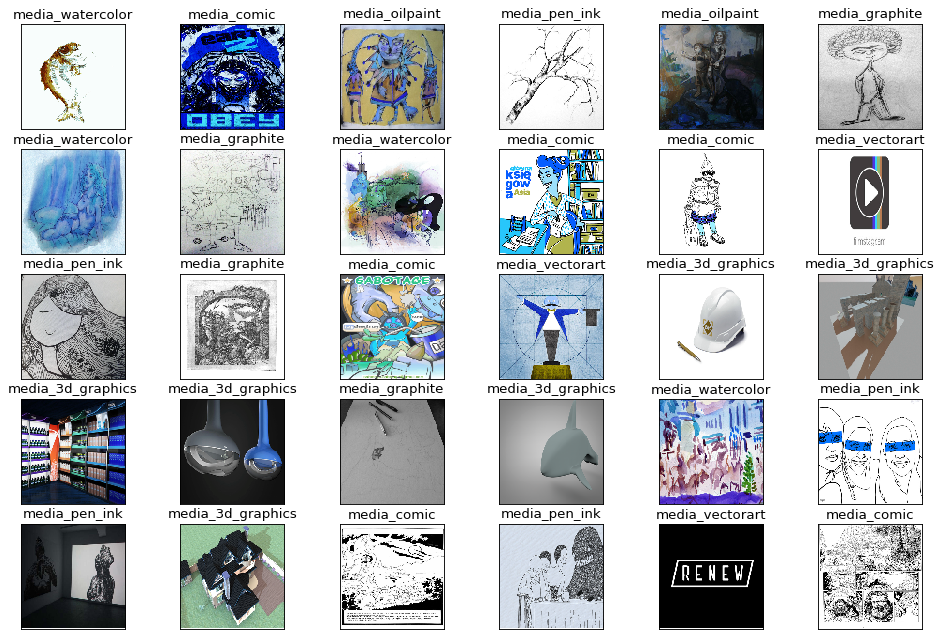

In [11]:
fig = plt.figure(figsize=(15, 10), dpi=80)
IMG_SIZE = 112
rows = 5
cols = 6
num = 1
for img in tqdm(os.listdir(out_folder)):
    name = img.split('.')[0]
    path = os.path.join(out_folder, img)
    image = cv2.imread(path, 1)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    
    if (num > rows * cols):
        break
    y = fig.add_subplot(rows,cols,num)
    y.imshow(image)
    plt.title(name)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    num+=1
plt.show()